In [1]:
# data management
import numpy as np                   # for linear algebra
import pandas as pd                  # for tabular data manipulation and processing
import category_encoders             # for categorical encoding

# machine learning
import sklearn                       # for data prep and classical ML

# data visualization and graphics
import matplotlib.pyplot as plt      # for visualization fundamentals
import seaborn as sns                # for pretty visualizations
sns.set_palette("magma")

# misc
import math                          # for calculation
import sys                           # for system manipulation
import os                            # for file manipulation

# stats
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint

In [2]:
# Load Dataset

file_path = "/Users/Sebastiano/data/Clinical_MRI.xlsx"
db = pd.read_excel(file_path)
pd.set_option('display.max_columns', None)

print("N° of patients: {}".format(len(db)))
print("N° of columns: {}".format(db.shape[1]))
db.head()

N° of patients: 27
N° of columns: 969


Patient  Date of Birth  Gender    Education  Disease duration (months)  \
0  Paziente 1          30084       0  High School                      109.5   
1  Paziente 2          26505       0   University                       96.0   
2  Paziente 3          31954       0   University                       76.5   
3  Paziente 4          32438       0   University                       79.1   
4  Paziente 5          28445       0  high school                       42.0   

     Age  SLEDAI-2k (at the time of NP event)  PGA (at the time of fMRI)  \
0  38.00                                    0                        0.0   
1  41.17                                   13                        2.1   
2  32.00                                    2                        0.5   
3  31.00                                    2                        0.0   
4  43.00                                    2                        0.4   

   SLICC-DI (at the time of NP event)  \
0                                   1   
1                                   0   
2                                   0   
3                                   1   
4                                   0   

   anti-dsDNA Titre  (0=absent; 1=present) )  \
0                                          1   
1                                          1   
2                                          1   
3                                          1   
4                                          1   

   anti-dsDNA Titre  (insert NV here <7 )  Anti-Ro-SSA  Anti-La-SSB  Anti-RNP  \
0                                     3.0            0            0         0   
1                                    84.4            1            0         0   
2                                     4.0            1            0         0   
3                                     5.0            0            0         0   
4                                    37.2            1            0         0   

   anti-Sm  C3 (mgdl)  C4 (mgdl)  aPL syndrome  LAC  aCL IgG  aCL IgM  \
0        0         89         20             0    0        0        0   
1        0         64         15             0    0        0        0   
2        0         97         17             0    0        1        1   
3        0         84         14             0    0        1        0   
4        0        101         11             0    1        0        0   

   aB2GPI IgG  aB2GPI IgM  aPL+  No Treatment Antiplatelet Anticoagulant  \
0           0           0     0             0         None          None   
1           0           0     0             0         None          None   
2           0           0     1             0         None          None   
3           0           0     1             0         None          None   
4           0           0     1             0          yes          None   

   Prednisone  (mg equivalent)        Antimalarial Immunosuppressant  \
0                          2.5                None      Methotrexate   
1                          7.5  Hydroxychloroquine      Methotrexate   
2                          5.4  Hydroxychloroquine      Azathioprine   
3                          3.6  Hydroxychloroquine      Methotrexate   
4                          4.0  hydroxychloroquine      Methotrexate   

      Biologic  AnAb   Anti-Rib-P  Anti-DWEYS  NP-SLE  \
0         None      1           1           1       1   
1    Rituximab      1           1           0       0   
2    Belimumab      1           0           0       0   
3  tocilizumab      0           0           0       1   
4    Rituximab      0           0           1       0   

                             Event  Livedo reticularis  Cutaneous vasculitis  \
0  Mood abnormalities (depressive)                   0                     0   
1                              NaN                   0                     0   
2                              NaN                   0                     1   
3                          Seizure                   

In [3]:
# Drop unwanted columns

df = db.drop(['Patient','Date of Birth', 'Education'], axis = 'columns')
# drop columns that include "%" in their name
#cols_to_drop = [col for col in df.columns if "%" in col]
#df = df.drop(columns=cols_to_drop)
print("Effective features to consider: {} ".format(len(df.columns)-1))

Effective features to consider: 965 


In [4]:
# One Hot Encoding for Scores, Antiplatelets and Coagulants, Therapy, NP Event

from sklearn.preprocessing import OneHotEncoder

categ = ['Antiplatelet', 'Anticoagulant', 'Antimalarial', 'Immunosuppressant', 'Biologic', 'Event']
ohe = OneHotEncoder(categories='auto',sparse=False)
df_enc = ohe.fit_transform(df[categ])
df_enc = pd.DataFrame(df_enc,columns=ohe.get_feature_names_out(categ))
df = pd.concat([df, df_enc], axis=1)
df = df.drop(categ, axis=1)
df.tail()

/opt/homebrew/Caskroom/miniforge/base/envs/lupus/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Gender  Disease duration (months)   Age  \
22       0                      30.20  62.0   
23       0                      21.80  52.0   
24       0                     243.30  48.0   
25       0                     159.13  37.0   
26       1                      45.10  48.0   

    SLEDAI-2k (at the time of NP event)  PGA (at the time of fMRI)  \
22                                   14                        1.6   
23                                    6                        1.0   
24                                   21                        2.6   
25                                    2                        1.7   
26                                    2                        0.0   

    SLICC-DI (at the time of NP event)  \
22                                   1   
23                                   0   
24                                   4   
25                                   0   
26                                   0   

    anti-dsDNA Titre  (0=absent; 1=present) )  \
22                                          0   
23                                          1   
24                                          1   
25                                          1   
26                                          1   

    anti-dsDNA Titre  (insert NV here <7 )  Anti-Ro-SSA  Anti-La-SSB  \
22                                     4.0            1            1   
23                                    41.2            0            0   
24                                     1.9            0            0   
25                                     2.0            0            0   
26                                     2.6            0            0   

    Anti-RNP  anti-Sm  C3 (mgdl)  C4 (mgdl)  aPL syndrome  LAC  aCL IgG  \
22         0        1         78         13             0    1        0   
23         0        0         96         17             0    0        0   
24         0        0         62         11             1    1        1   
25         1        0         97          8             0    1        1   
26         0        0         85         19             0    1        0   

    aCL IgM  aB2GPI IgG  aB2GPI IgM  aPL+  No Treatment  \
22        1           0           1     1             0   
23        0           0           0     0             0   
24        0           1           0     1             0   
25        0           1           0     1             0   
26        0           0           0     1             0   

    Prednisone  (mg equivalent)  AnAb   Anti-Rib-P  Anti-DWEYS  NP-SLE  \
22                         10.1      0           0           1       1   
23                         15.0      1           1           0       1   
24                         14.3      1           0           0       1   
25                          5.0      1           0           1       0   
26                          0.0      0           0           0       0   

    Livedo reticularis  Cutaneous vasculitis  Hypertension  Hyperlipidaemia  \
22                   0                     1             1                1   
23                   0                     0             0                0   
24                   0                     0             0                0   
25                   0                     0             0                0   
26                   0                     0             0                0   

    current Smoking  ever smoking  Scale factor       SNR  \
22                0             0       0.62973   43.8559   
23                1             1       0.73500   47.0085   
24                1             1       0.75214   45.3995   
25                0             0       0.57994  102.2972   
26                0             0       0.82252   38.7983   

    White Matter (WM) volume cm3  White Matter (WM) volume %  \
22                      393.3745                     34.4270   
23                      495.4935                     37.0849   
24                      457.9349  

# Partial Correlations

## NP-SLE

Event_CVA vs Abnormal Appearing White Matter volume cm3: r = 0.38, p = 0.05
Event_CVA vs Abnormal Appearing White Matter volume cm3 (partial corr): r = 0.59, p = 0.00
total_neurocog vs Abnormal Appearing White Matter volume cm3: r = 0.16, p = 0.43
NP-SLE vs Abnormal Appearing White Matter volume cm3 (partial corr): r = 0.33, p = 0.12


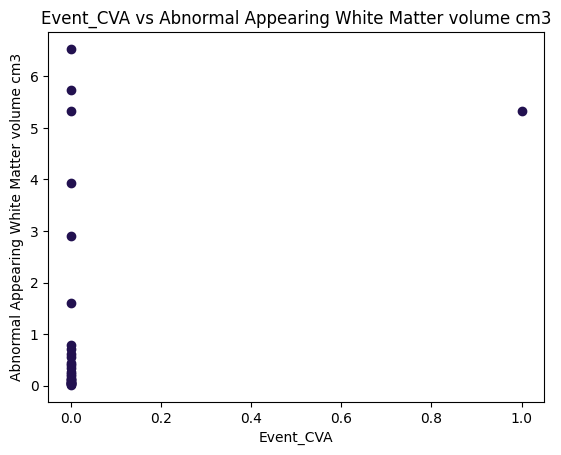

<Figure size 640x480 with 0 Axes>

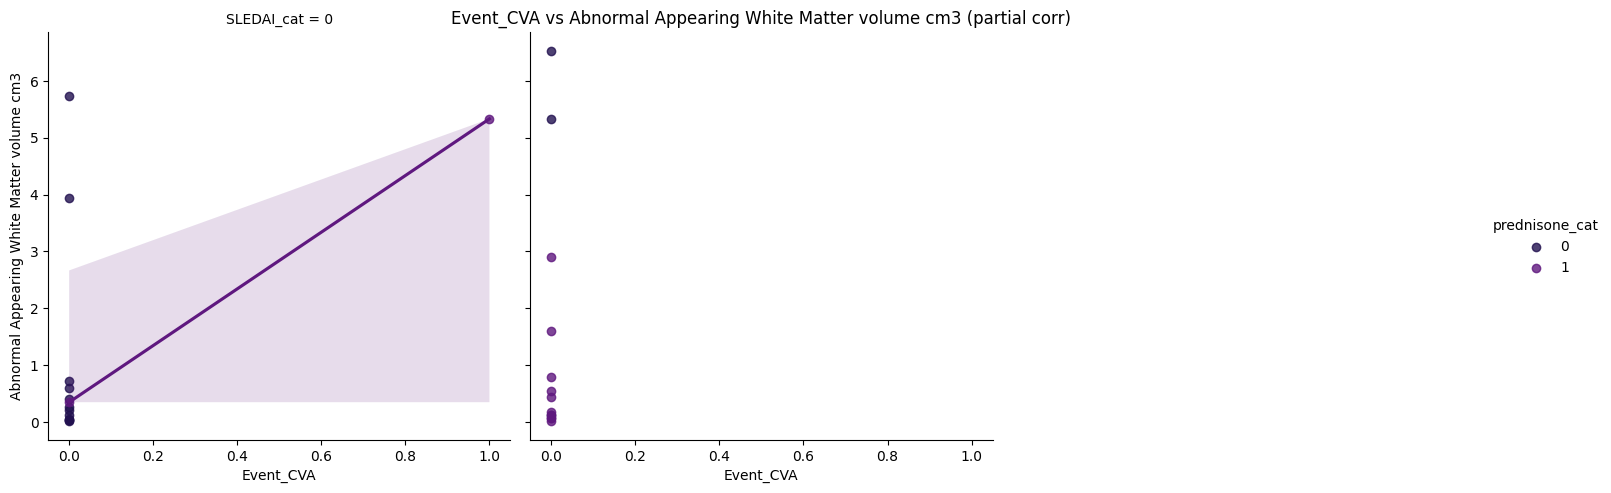

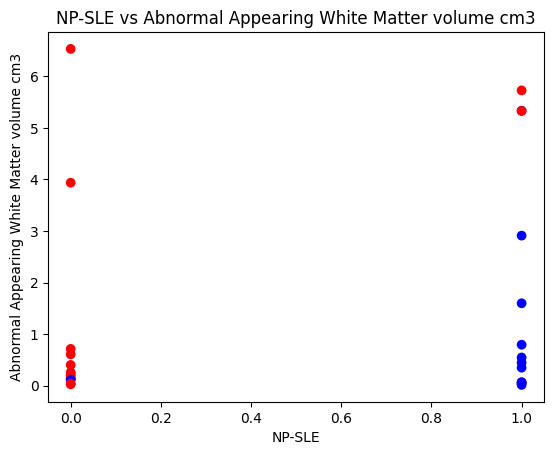

<Figure size 640x480 with 0 Axes>

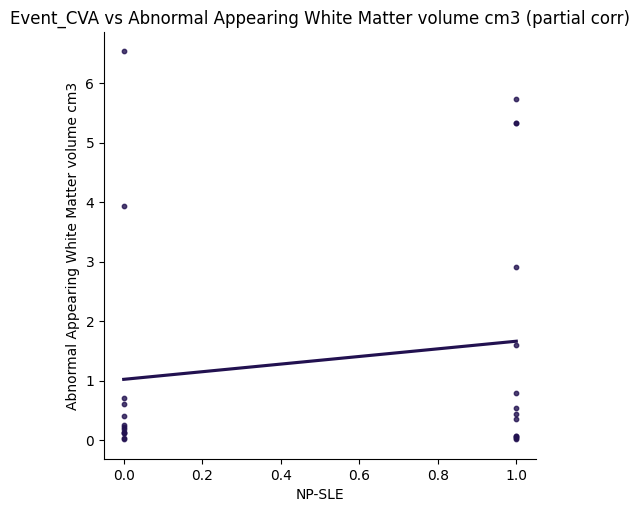

Event_Mood abnormalities (depressive) vs Abnormal Appearing White Matter volume cm3: r = -0.25, p = 0.21
Event_Mood abnormalities (depressive) vs Abnormal Appearing White Matter volume cm3 (partial corr): r = -0.30, p = 0.17
total_neurocog vs Abnormal Appearing White Matter volume cm3: r = 0.16, p = 0.43
NP-SLE vs Abnormal Appearing White Matter volume cm3 (partial corr): r = 0.33, p = 0.12


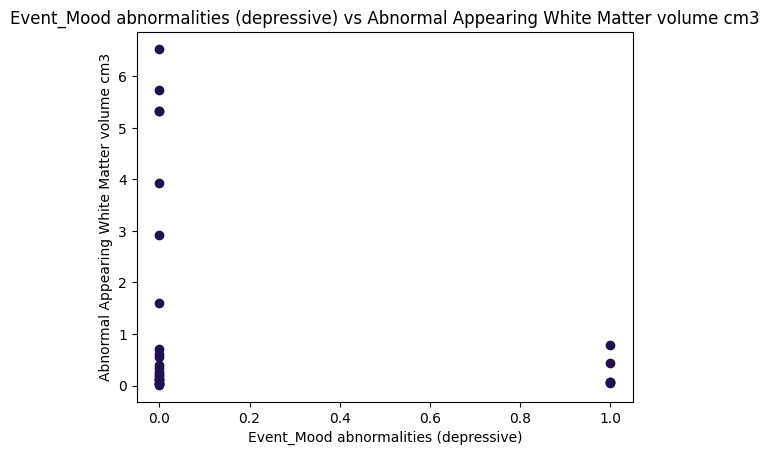

<Figure size 640x480 with 0 Axes>

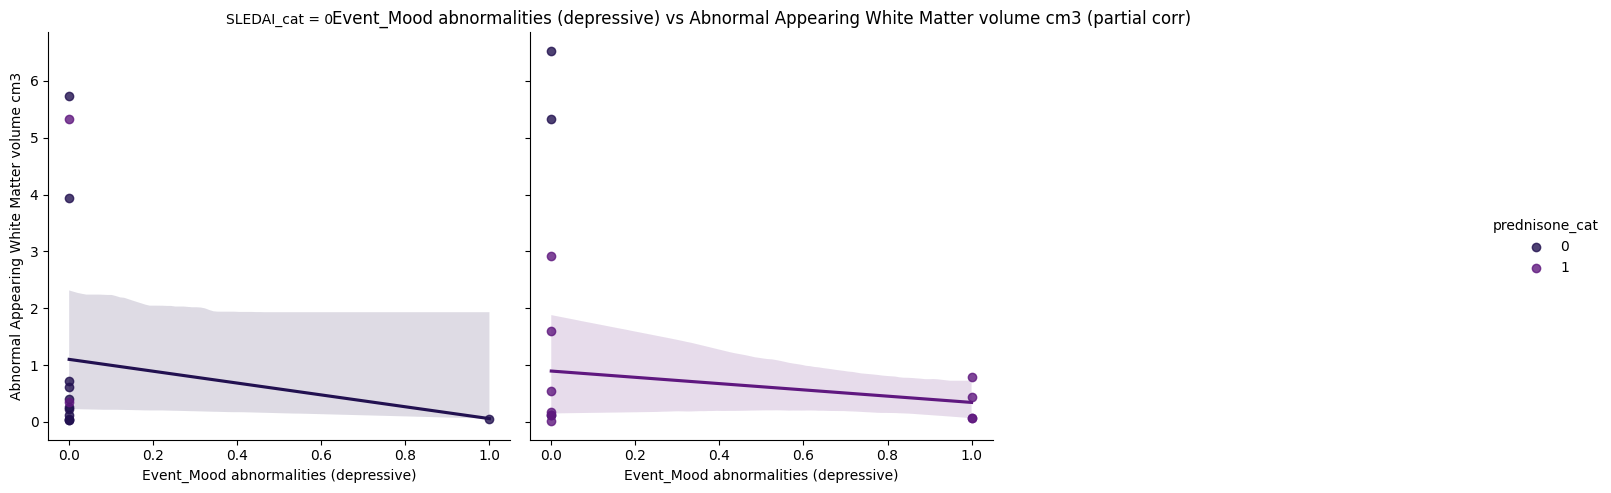

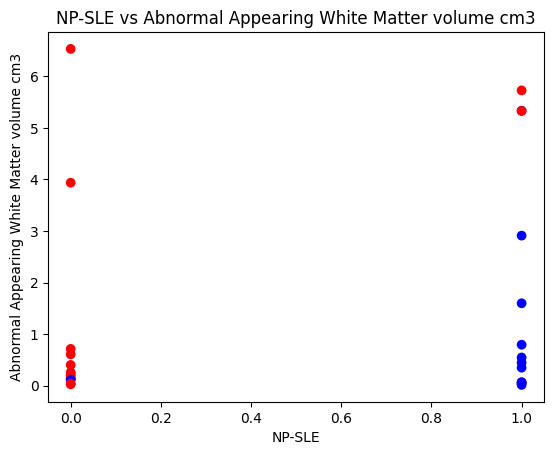

<Figure size 640x480 with 0 Axes>

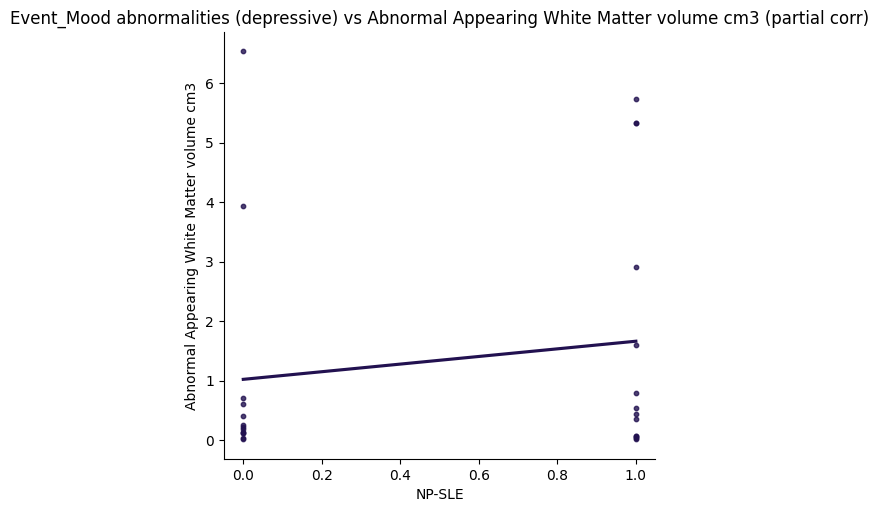

Event_Mood abnormalities (mixed) vs Abnormal Appearing White Matter volume cm3: r = -0.13, p = 0.52
Event_Mood abnormalities (mixed) vs Abnormal Appearing White Matter volume cm3 (partial corr): r = -0.05, p = 0.81
total_neurocog vs Abnormal Appearing White Matter volume cm3: r = 0.16, p = 0.43
NP-SLE vs Abnormal Appearing White Matter volume cm3 (partial corr): r = 0.33, p = 0.12


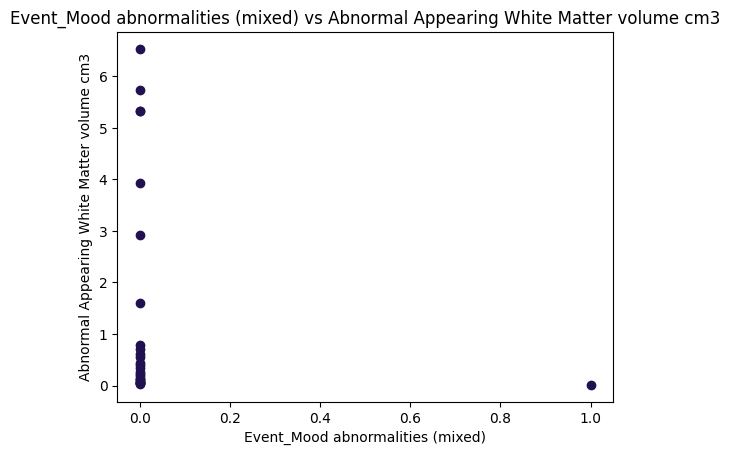

<Figure size 640x480 with 0 Axes>

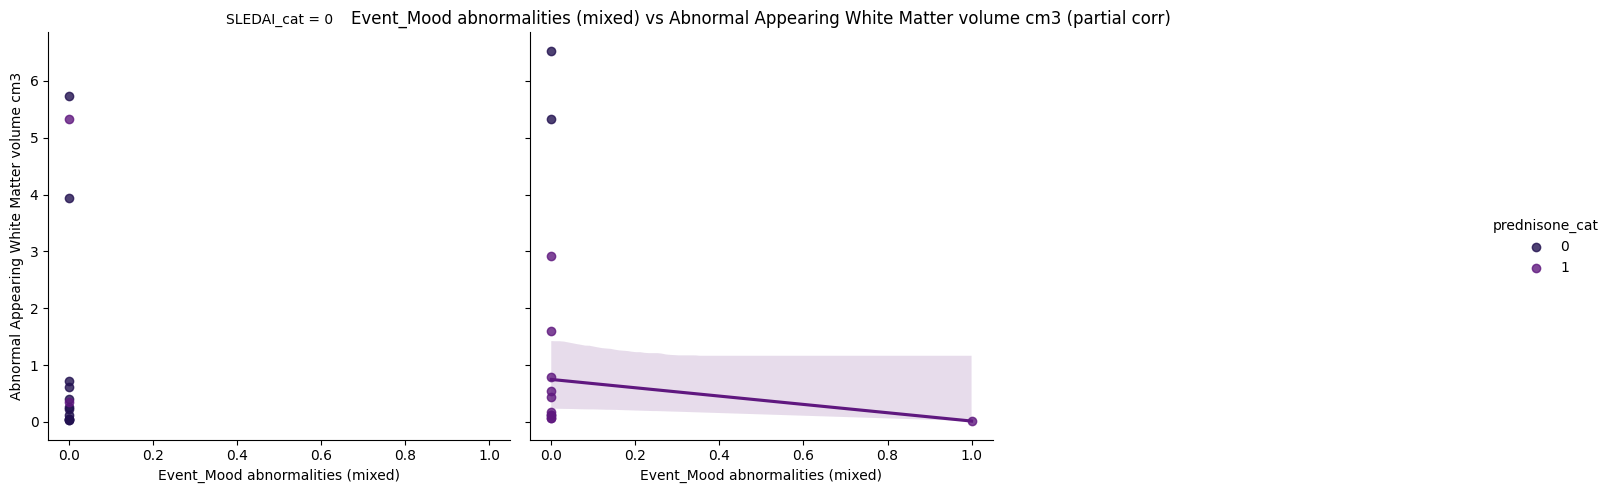

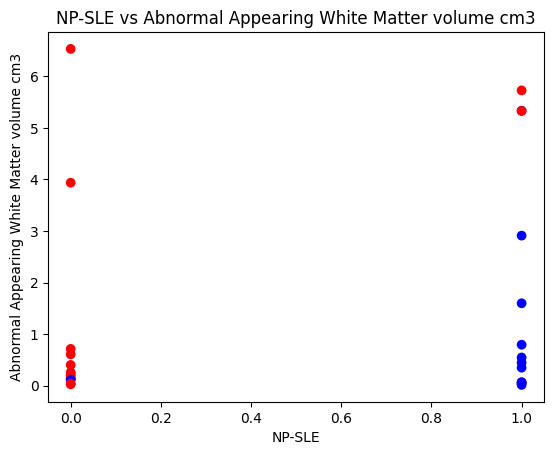

<Figure size 640x480 with 0 Axes>

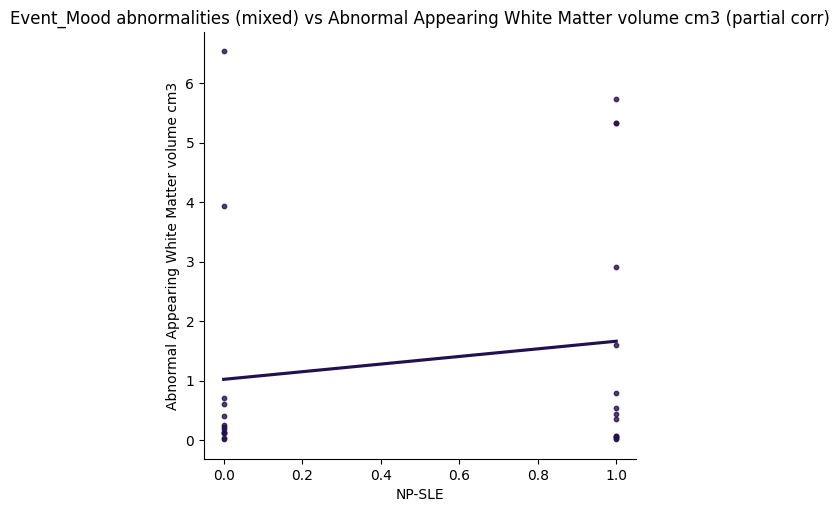

Event_Movement Disorder vs Abnormal Appearing White Matter volume cm3: r = -0.08, p = 0.70
Event_Movement Disorder vs Abnormal Appearing White Matter volume cm3 (partial corr): r = 0.03, p = 0.89
total_neurocog vs Abnormal Appearing White Matter volume cm3: r = 0.16, p = 0.43
NP-SLE vs Abnormal Appearing White Matter volume cm3 (partial corr): r = 0.33, p = 0.12


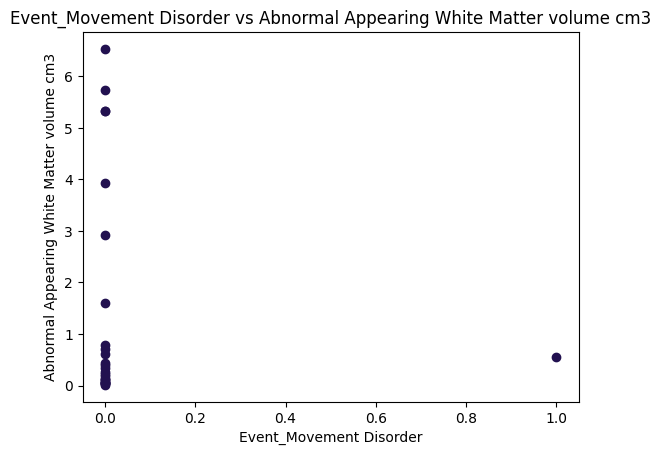

<Figure size 640x480 with 0 Axes>

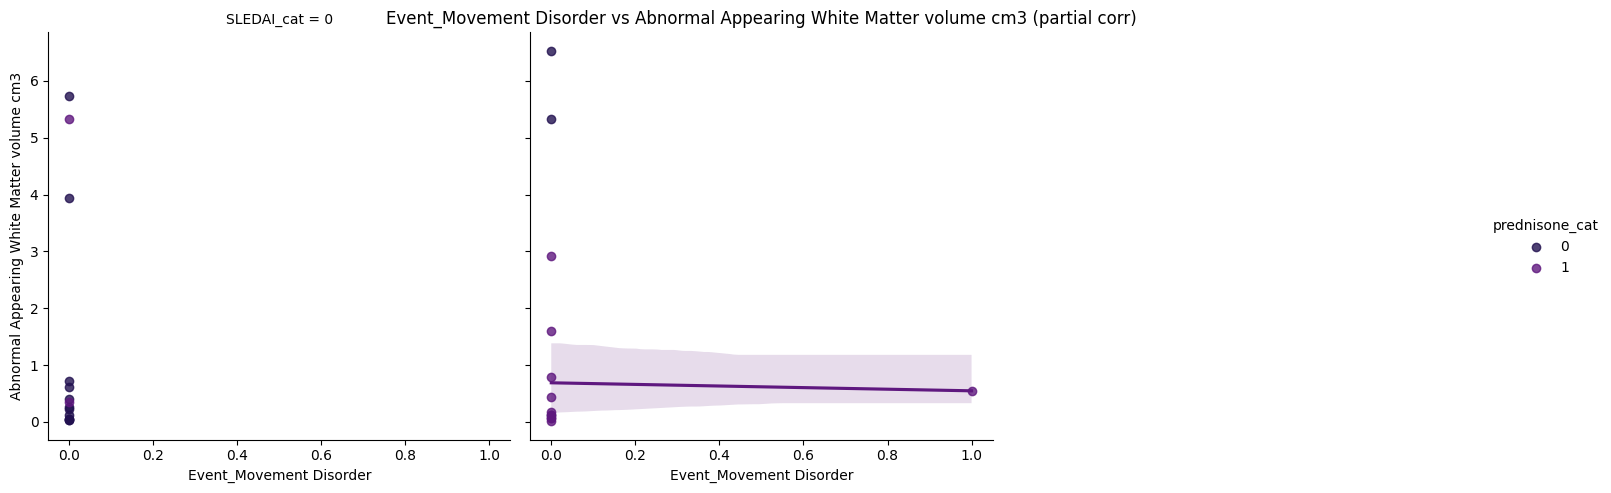

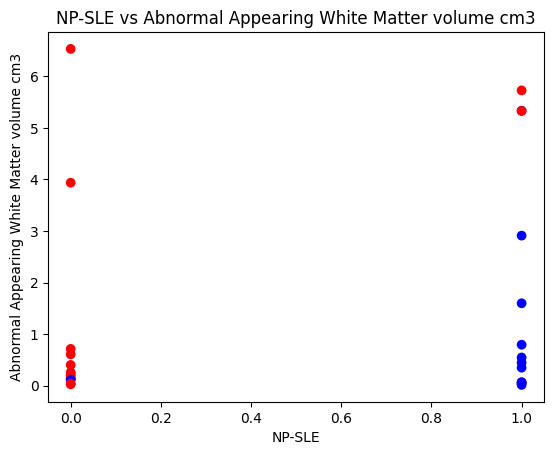

<Figure size 640x480 with 0 Axes>

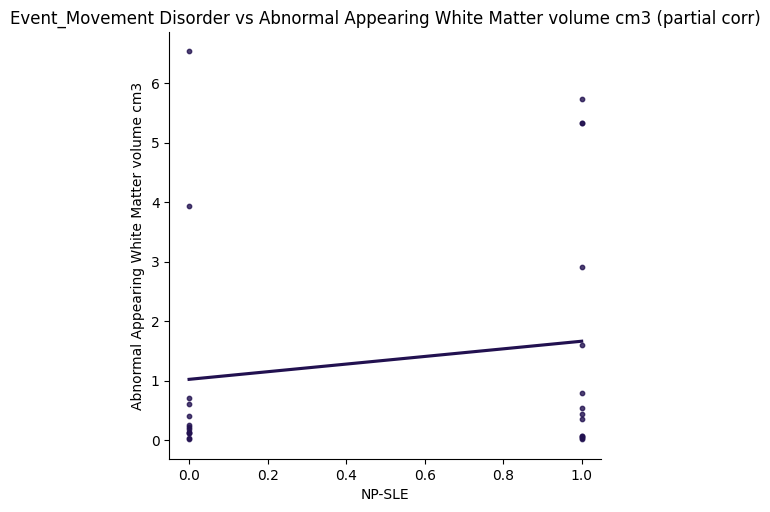

Event_Psychosis vs Abnormal Appearing White Matter volume cm3: r = -0.05, p = 0.79
Event_Psychosis vs Abnormal Appearing White Matter volume cm3 (partial corr): r = -0.01, p = 0.95
total_neurocog vs Abnormal Appearing White Matter volume cm3: r = 0.16, p = 0.43
NP-SLE vs Abnormal Appearing White Matter volume cm3 (partial corr): r = 0.33, p = 0.12


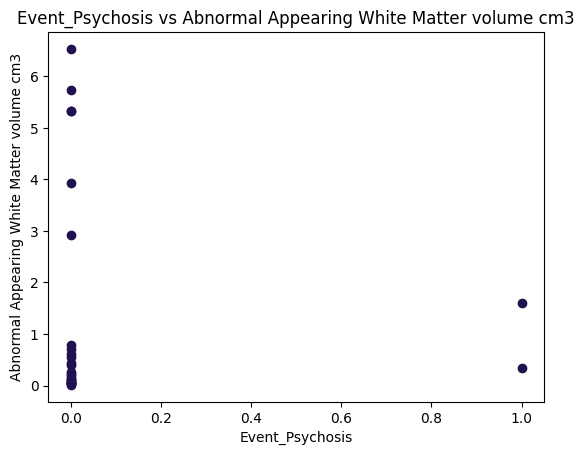

<Figure size 640x480 with 0 Axes>

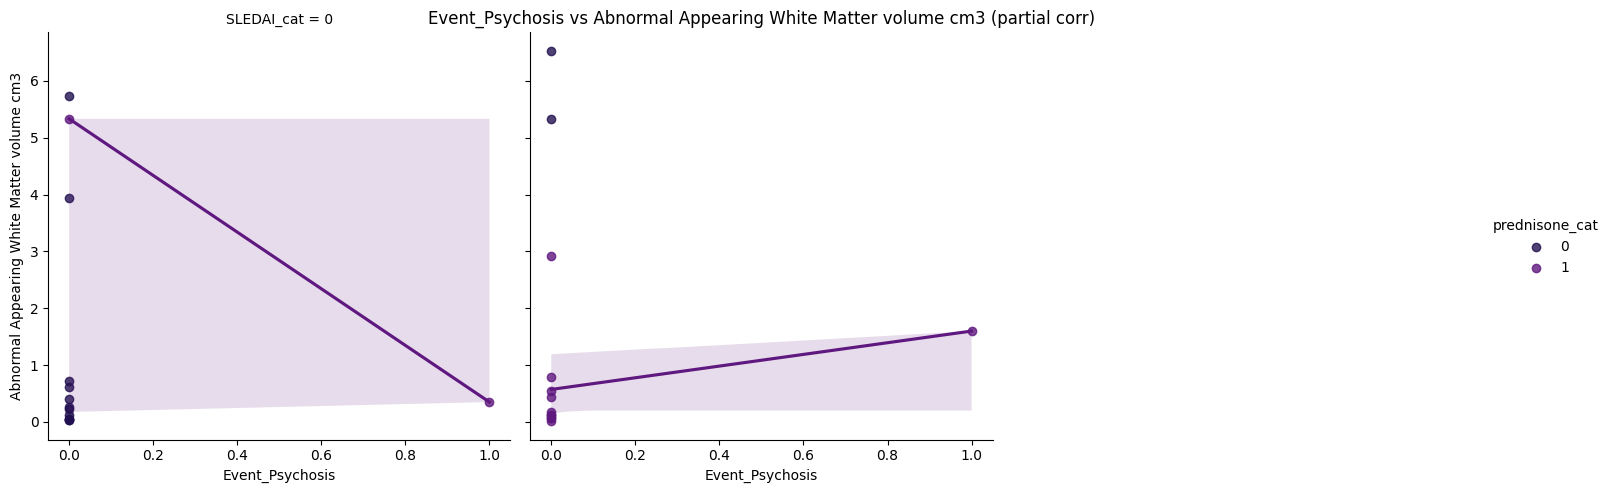

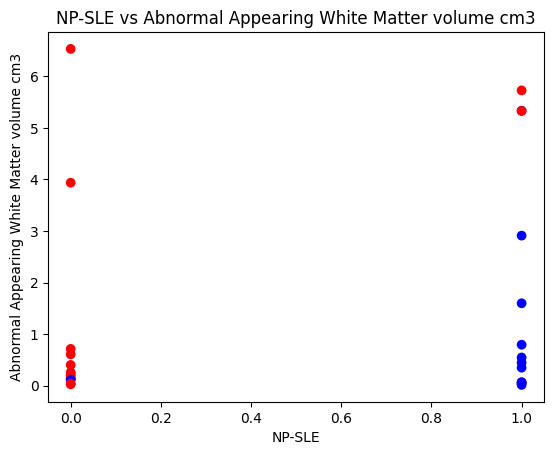

<Figure size 640x480 with 0 Axes>

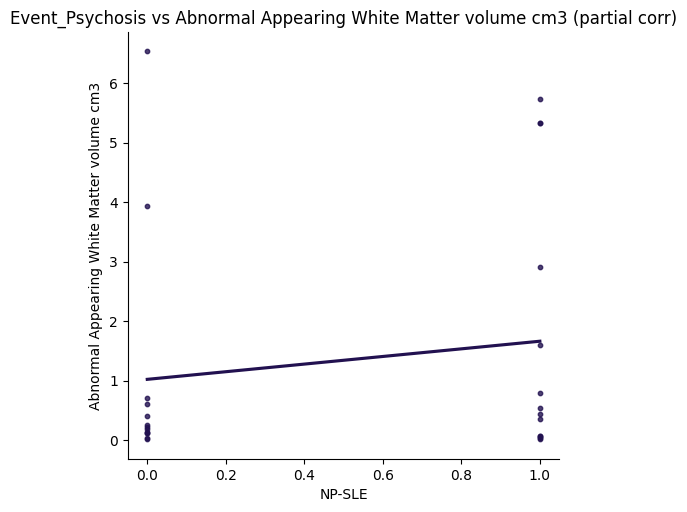

Event_Seizure vs Abnormal Appearing White Matter volume cm3: r = 0.27, p = 0.18
Event_Seizure vs Abnormal Appearing White Matter volume cm3 (partial corr): r = 0.32, p = 0.14
total_neurocog vs Abnormal Appearing White Matter volume cm3: r = 0.16, p = 0.43
NP-SLE vs Abnormal Appearing White Matter volume cm3 (partial corr): r = 0.33, p = 0.12


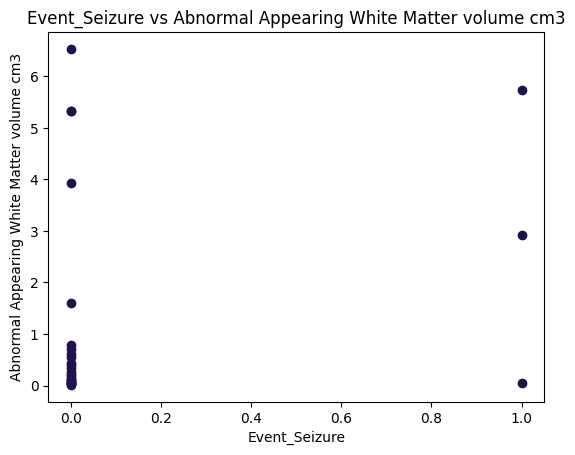

<Figure size 640x480 with 0 Axes>

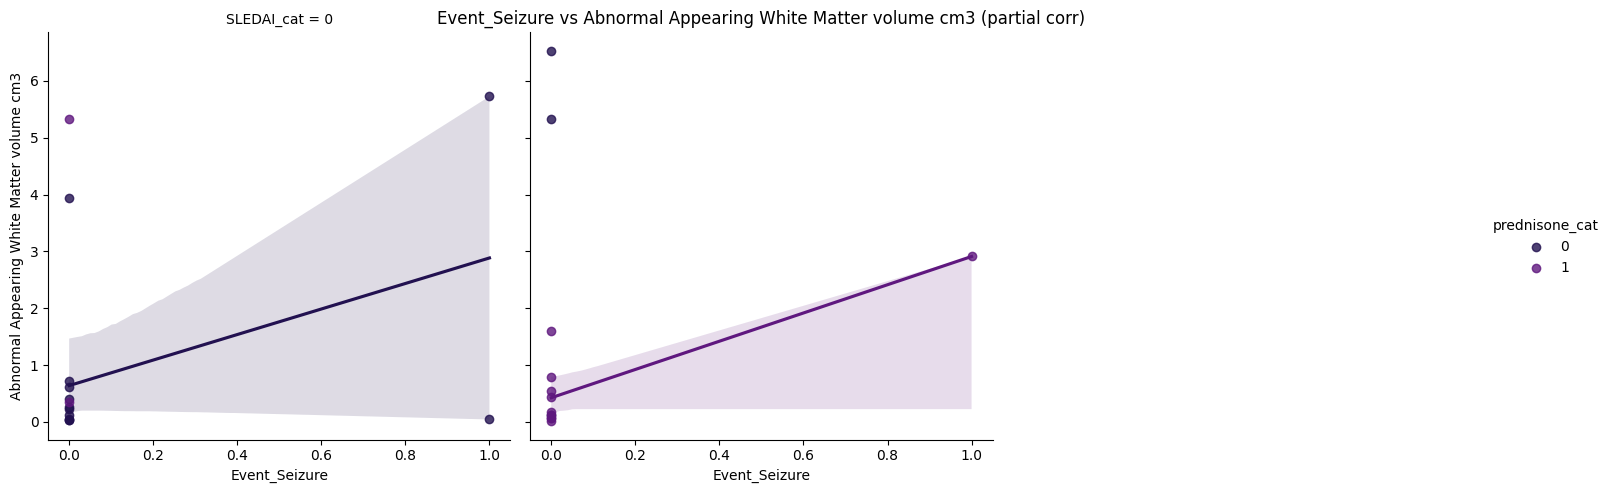

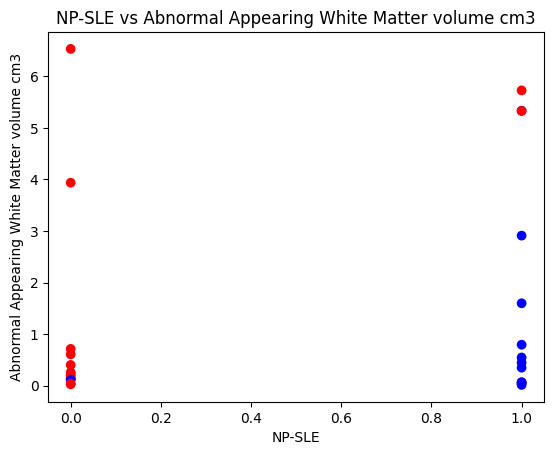

<Figure size 640x480 with 0 Axes>

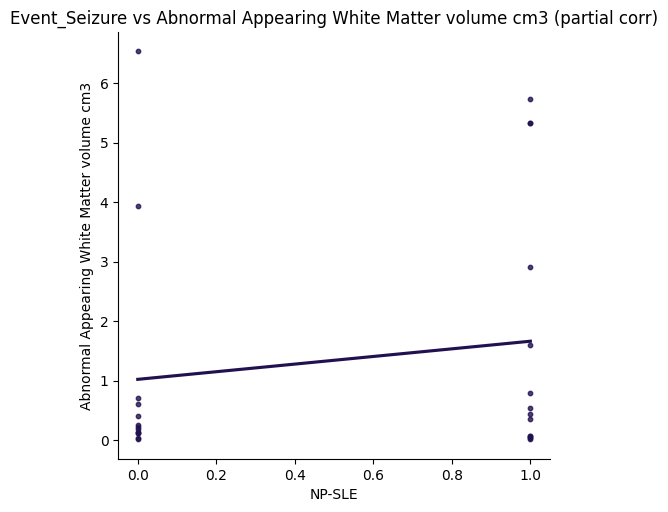

Event_Seizure, ACS, myelitis, CVA vs Abnormal Appearing White Matter volume cm3: r = 0.38, p = 0.05
Event_Seizure, ACS, myelitis, CVA vs Abnormal Appearing White Matter volume cm3 (partial corr): r = 0.34, p = 0.11
total_neurocog vs Abnormal Appearing White Matter volume cm3: r = 0.16, p = 0.43
NP-SLE vs Abnormal Appearing White Matter volume cm3 (partial corr): r = 0.33, p = 0.12


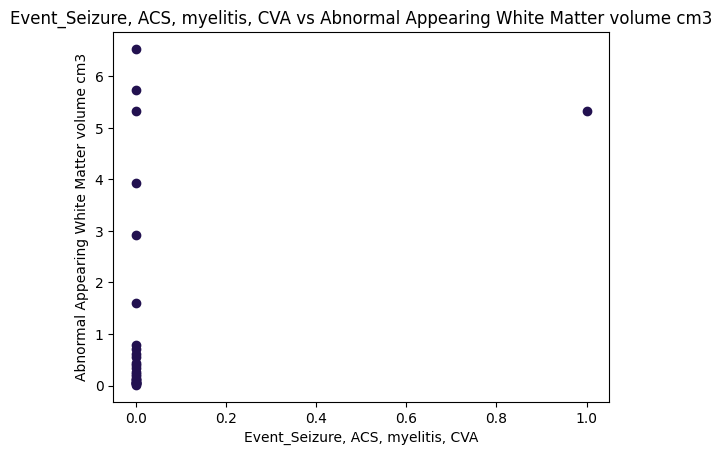

<Figure size 640x480 with 0 Axes>

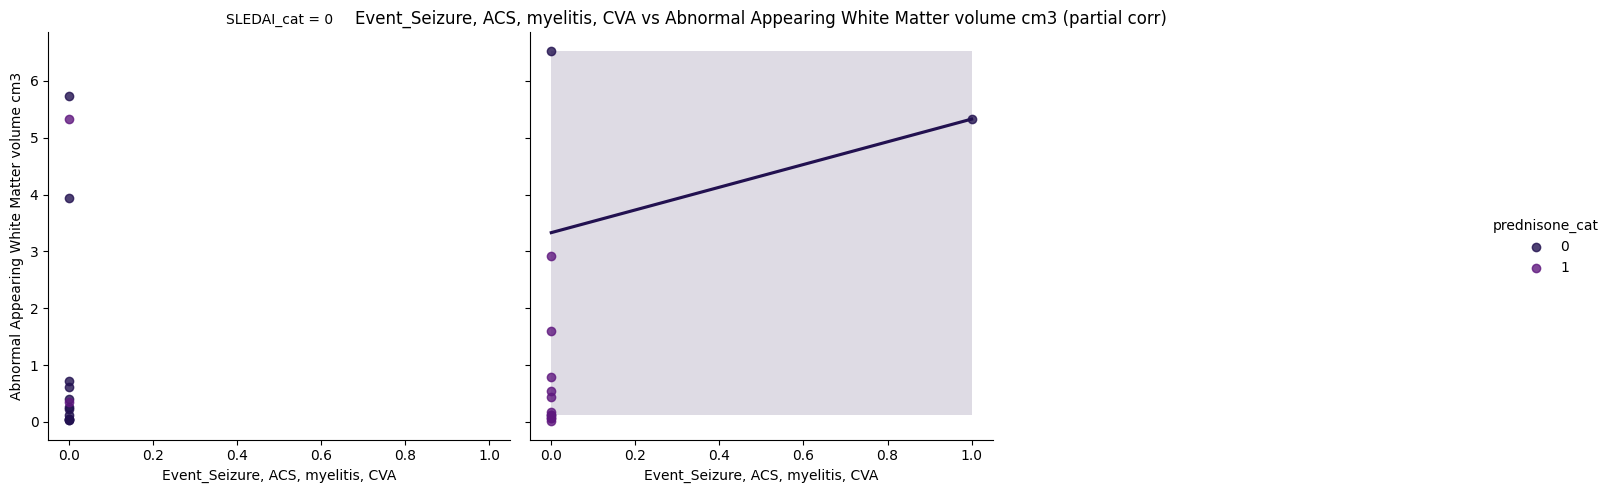

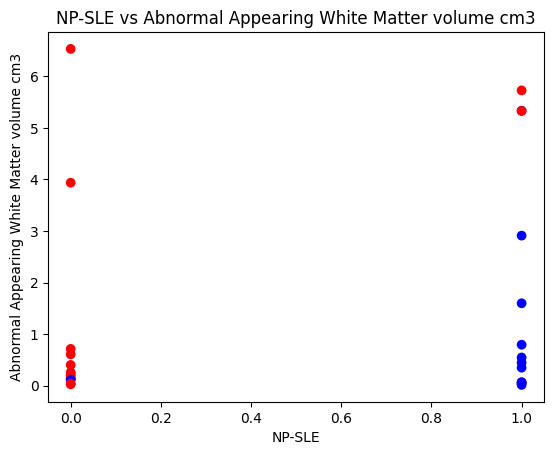

<Figure size 640x480 with 0 Axes>

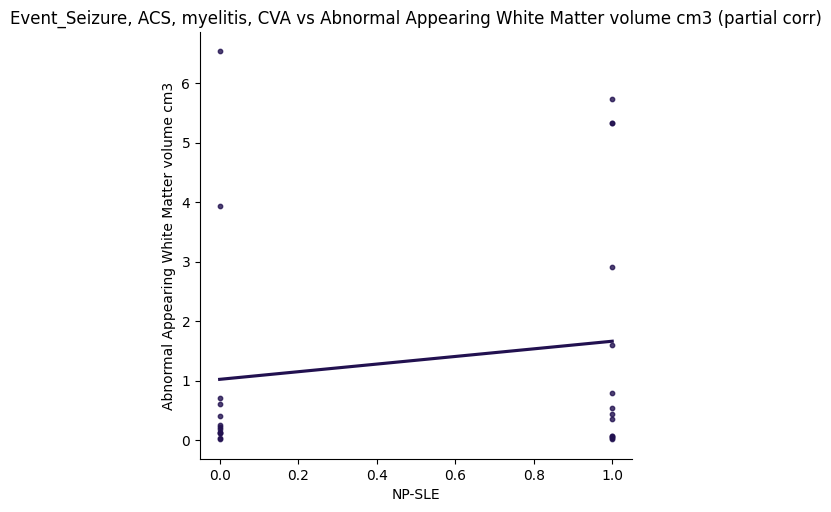

Abnormal Appearing White Matter volume cm3 vs Abnormal Appearing White Matter volume cm3: r = 1.00, p = 0.00
total_neurocog vs Abnormal Appearing White Matter volume cm3: r = 0.16, p = 0.43
NP-SLE vs Abnormal Appearing White Matter volume cm3 (partial corr): r = 0.33, p = 0.12


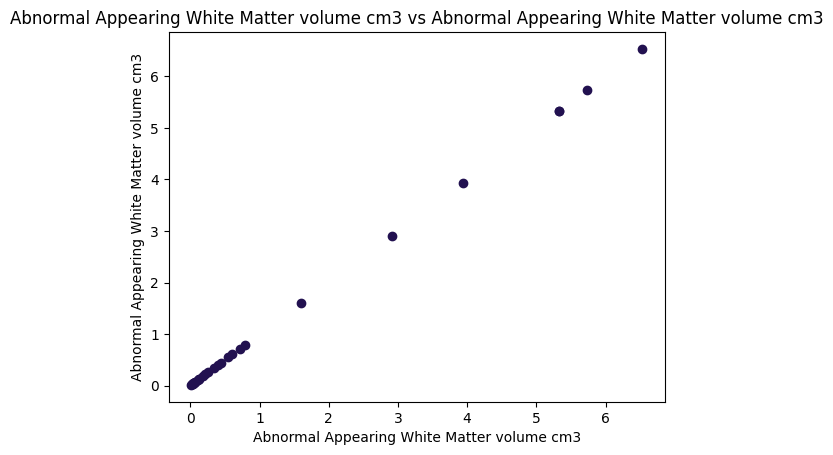

<Figure size 640x480 with 0 Axes>

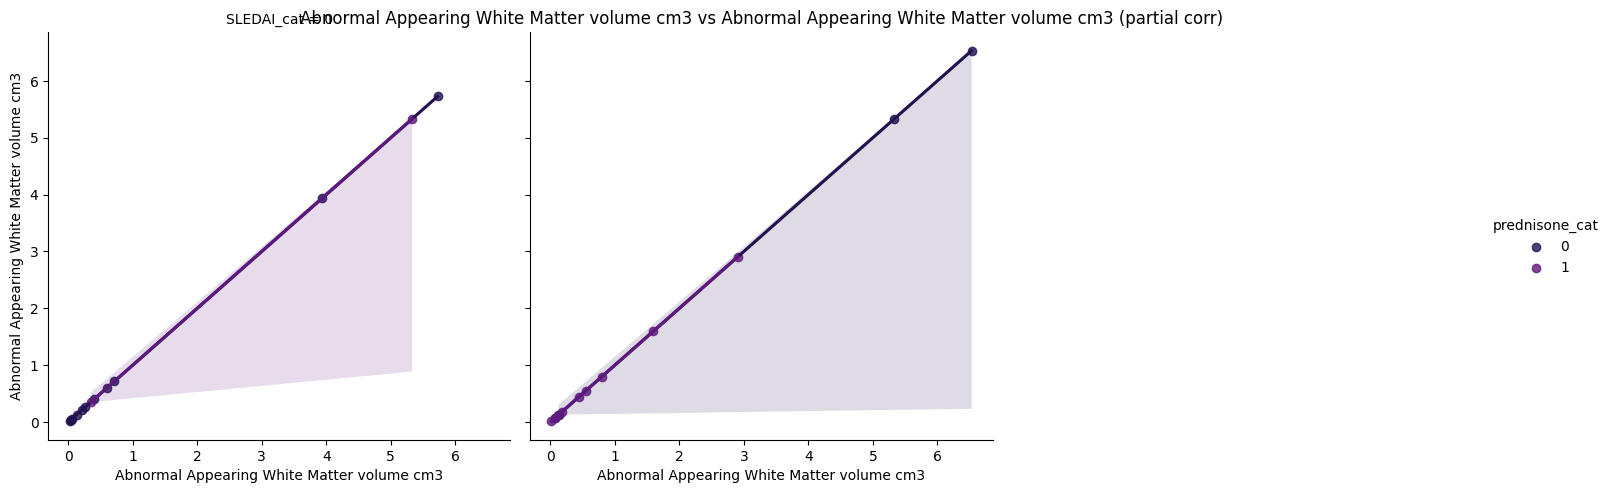

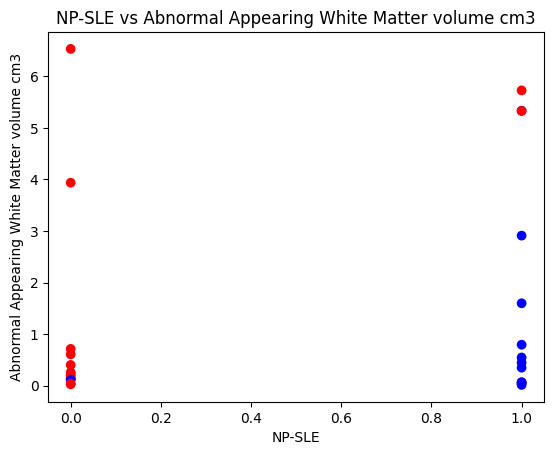

<Figure size 640x480 with 0 Axes>

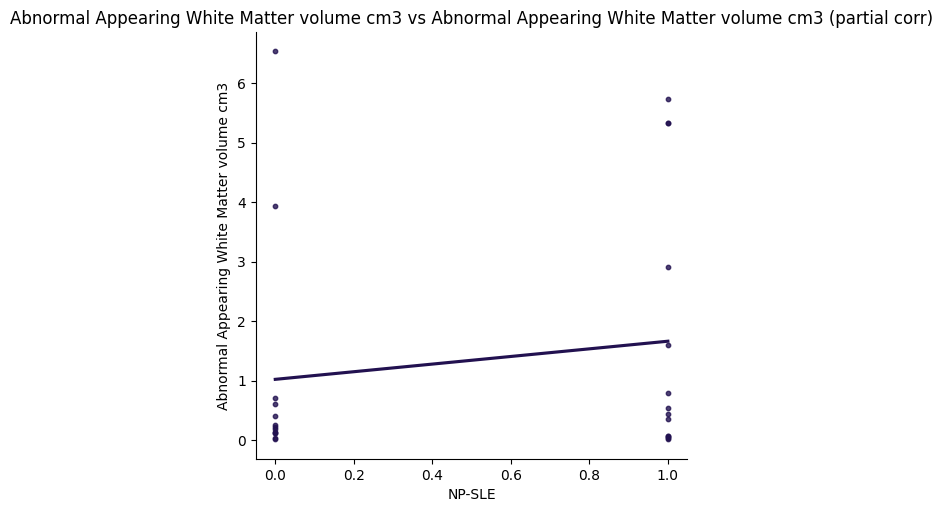

In [6]:
from scipy.stats import pearsonr
import pingouin as pg

df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)
# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Abnormal Appearing White Matter volume cm3'
prednisone = 'prednisone_cat'
sledai = 'SLEDAI_cat'
age = 'Age'
sex = 'Gender'


# Compute the correlations
for col in neurocog_cols + [lesion_load]:
    # Compute the Pearson correlation between each neurocognitive domain and lesion load
    r, p = pearsonr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and SLEDAI
    if col != lesion_load:
        partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, sledai, age, sex])
        r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
        print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
        assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

    # Compute the Pearson correlation between total neurocognitive score and lesion load
    r_total, p_total = pearsonr(df['NP-SLE'], df[lesion_load])
    print(f'total_neurocog vs {lesion_load}: r = {r_total:.2f}, p = {p_total:.2f}')

    # Compute the partial correlation adjusting for prednisone and SLEDAI
    total_partial_results = pg.partial_corr(data=df, x='NP-SLE', y=lesion_load, covar=[prednisone, sledai, age, sex])
    r_total_partial, p_total_partial = total_partial_results['r'][0], total_partial_results['p-val'][0]
    print(f'NP-SLE vs {lesion_load} (partial corr): r = {r_total_partial:.2f}, p = {p_total_partial:.2f}')


    # Plot the scatter plot
    plt.figure()
    plt.scatter(df[col], df[lesion_load])
    plt.xlabel(col)
    plt.ylabel(lesion_load)
    plt.title(f'{col} vs {lesion_load}')
    plt.show()

    # Plot the partial scatter plot
    plt.figure()
    sns.lmplot(data=df, x=col, y=lesion_load, hue=prednisone, col=sledai, col_wrap=3)
    plt.title(f'{col} vs {lesion_load} (partial corr)')
    plt.show()
    
    colors = ['red' if p == 0 else 'blue' for p in df[prednisone]]
    # Plot the scatter plot of total neurocognitive score vs lesion load
    plt.figure()
    plt.scatter(df['NP-SLE'], df[lesion_load], c=colors)
    plt.xlabel('NP-SLE')
    plt.ylabel(lesion_load)
    plt.title(f'NP-SLE vs {lesion_load}')
    plt.show()

    # Plot the partial scatter plot of total neurocognitive score vs lesion load
    plt.figure()
    sns.lmplot(data=df, x='NP-SLE', y=lesion_load, ci=None, scatter_kws={"s": 10})
    plt.title(f'{col} vs {lesion_load} (partial corr)')
    plt.show()

Event_CVA vs SCA thickness asymmetry: r = 0.62, p = 0.00
Event_CVA vs SCA thickness asymmetry (partial corr): r = 0.67, p = 0.00
total_neurocog vs SCA thickness asymmetry: r = 0.51, p = 0.01
NP-SLE vs SCA thickness asymmetry (partial corr): r = 0.32, p = 0.14


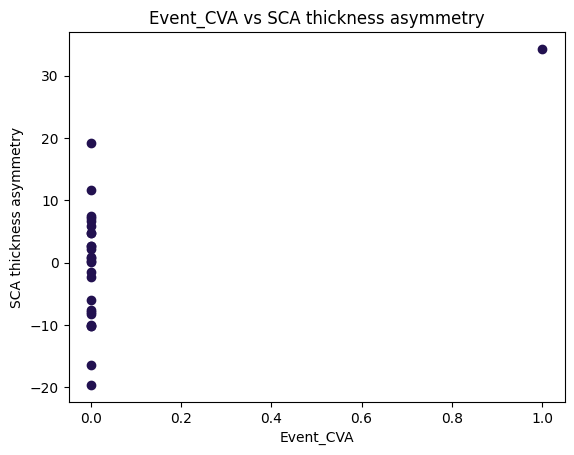

<Figure size 640x480 with 0 Axes>

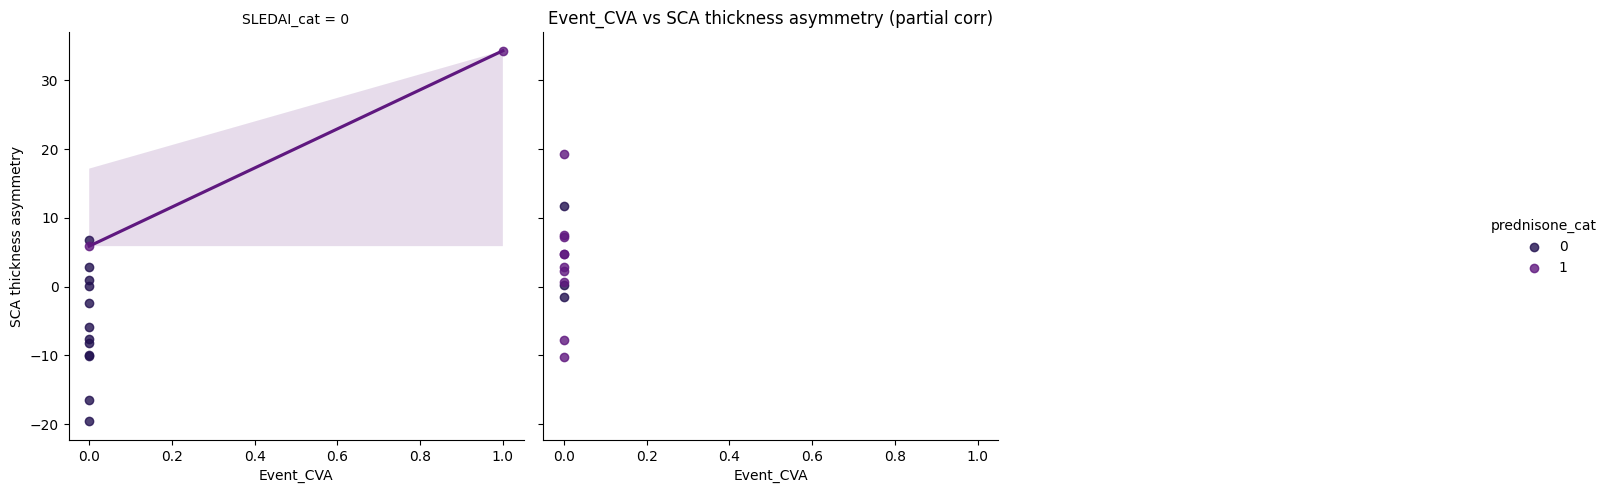

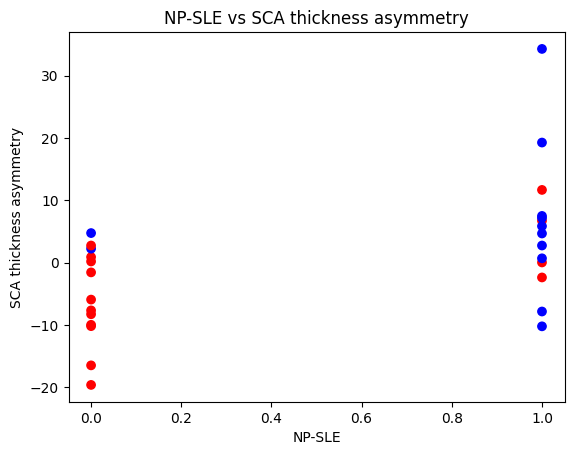

<Figure size 640x480 with 0 Axes>

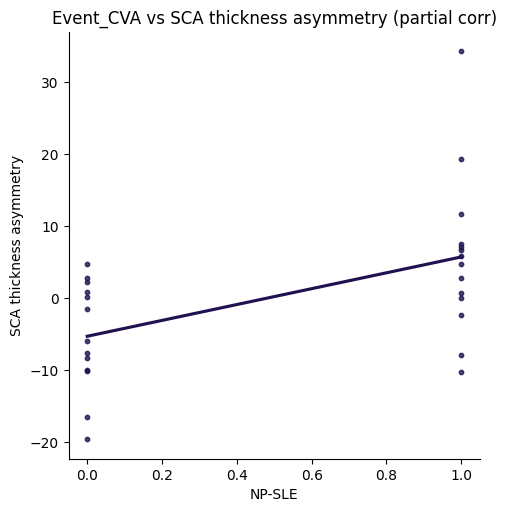

Event_Mood abnormalities (depressive) vs SCA thickness asymmetry: r = -0.01, p = 0.95
Event_Mood abnormalities (depressive) vs SCA thickness asymmetry (partial corr): r = -0.23, p = 0.29
total_neurocog vs SCA thickness asymmetry: r = 0.51, p = 0.01
NP-SLE vs SCA thickness asymmetry (partial corr): r = 0.32, p = 0.14


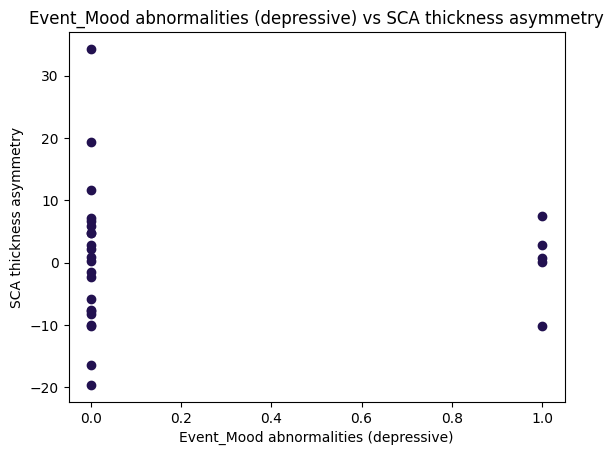

<Figure size 640x480 with 0 Axes>

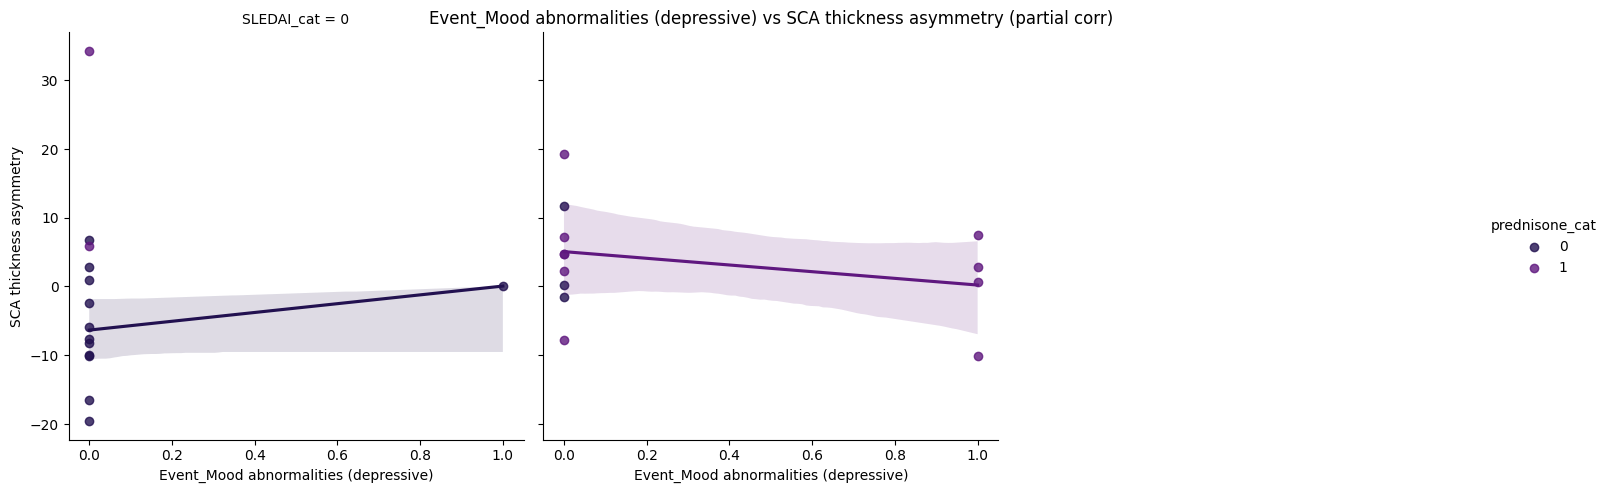

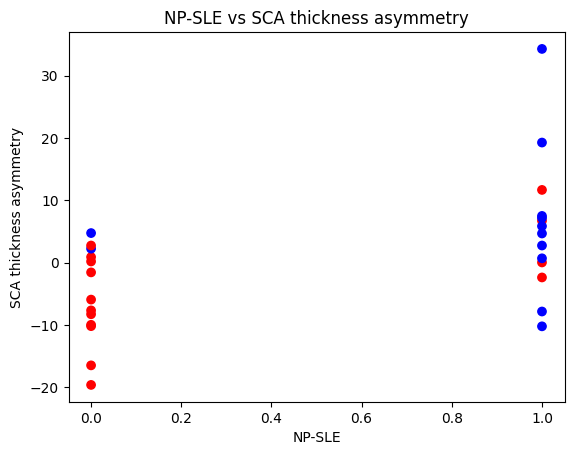

<Figure size 640x480 with 0 Axes>

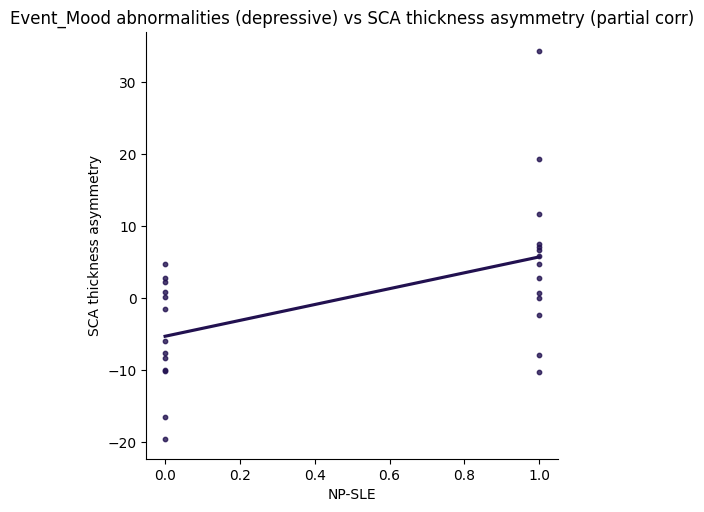

Event_Mood abnormalities (mixed) vs SCA thickness asymmetry: r = 0.08, p = 0.70
Event_Mood abnormalities (mixed) vs SCA thickness asymmetry (partial corr): r = -0.11, p = 0.61
total_neurocog vs SCA thickness asymmetry: r = 0.51, p = 0.01
NP-SLE vs SCA thickness asymmetry (partial corr): r = 0.32, p = 0.14


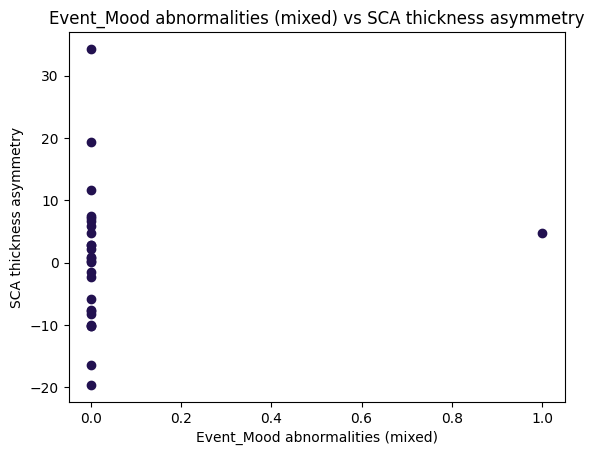

<Figure size 640x480 with 0 Axes>

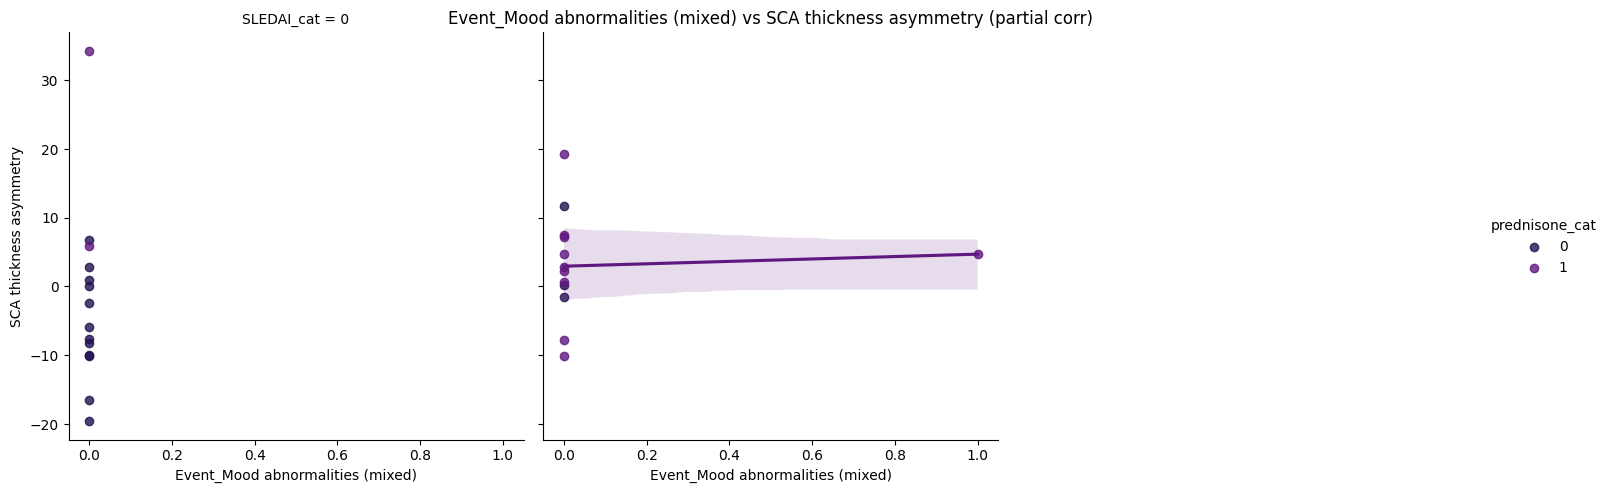

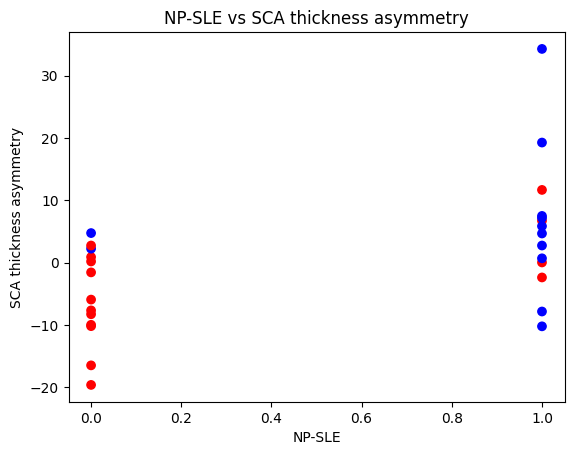

<Figure size 640x480 with 0 Axes>

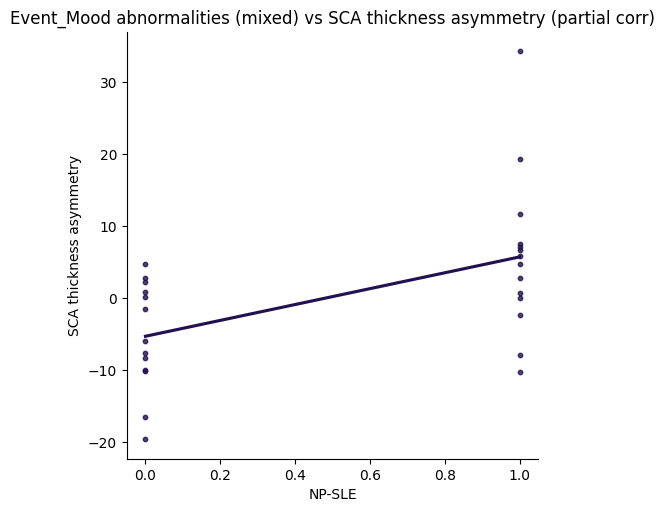

Event_Movement Disorder vs SCA thickness asymmetry: r = 0.12, p = 0.54
Event_Movement Disorder vs SCA thickness asymmetry (partial corr): r = -0.08, p = 0.73
total_neurocog vs SCA thickness asymmetry: r = 0.51, p = 0.01
NP-SLE vs SCA thickness asymmetry (partial corr): r = 0.32, p = 0.14


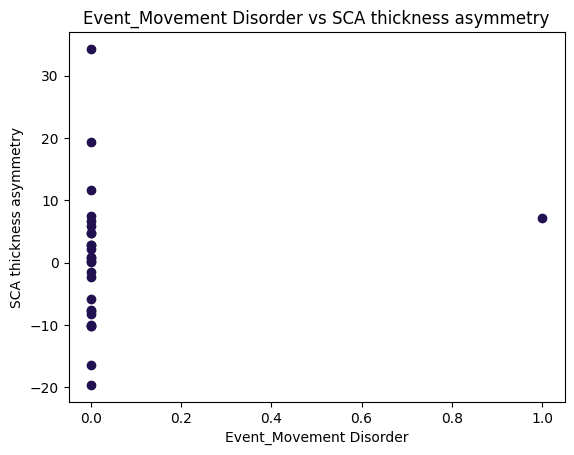

<Figure size 640x480 with 0 Axes>

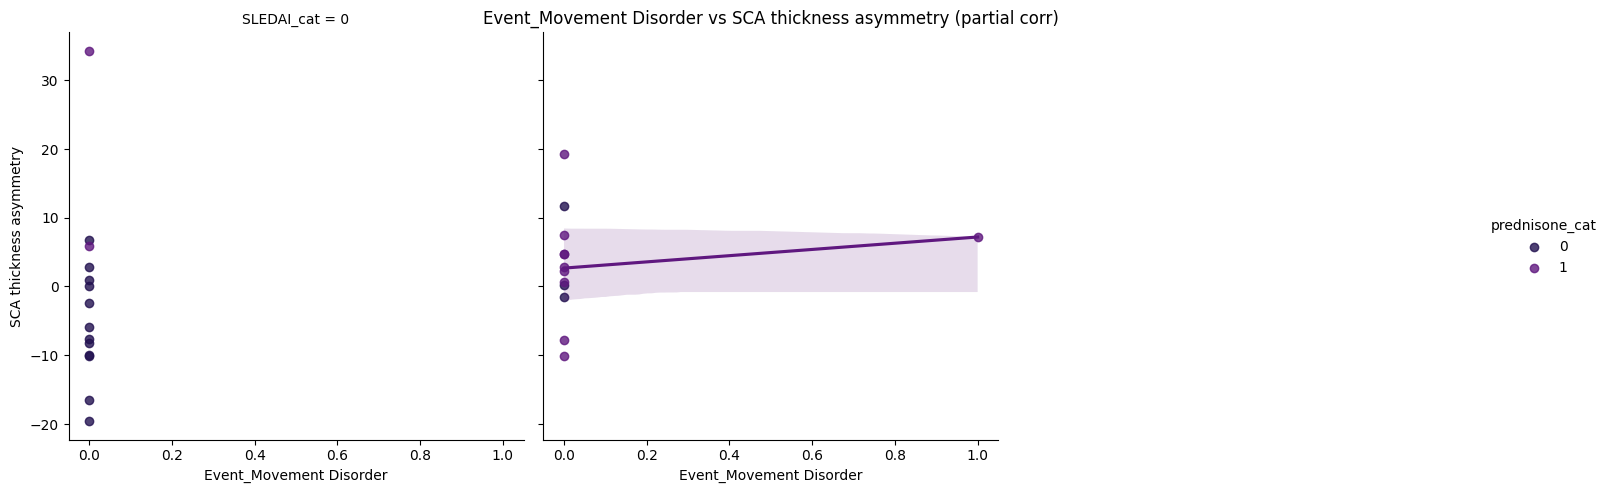

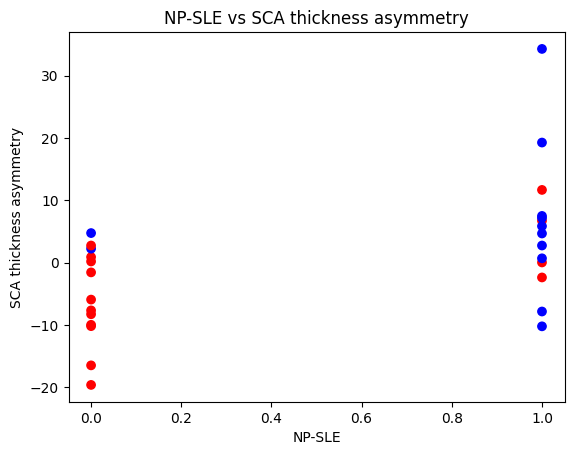

<Figure size 640x480 with 0 Axes>

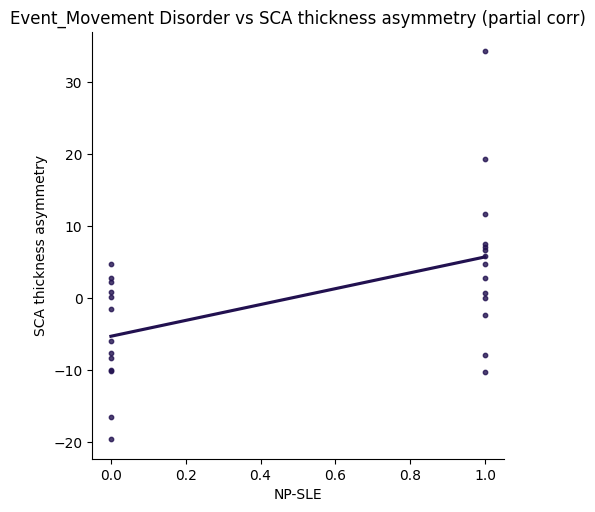

Event_Psychosis vs SCA thickness asymmetry: r = 0.32, p = 0.10
Event_Psychosis vs SCA thickness asymmetry (partial corr): r = 0.25, p = 0.25
total_neurocog vs SCA thickness asymmetry: r = 0.51, p = 0.01
NP-SLE vs SCA thickness asymmetry (partial corr): r = 0.32, p = 0.14


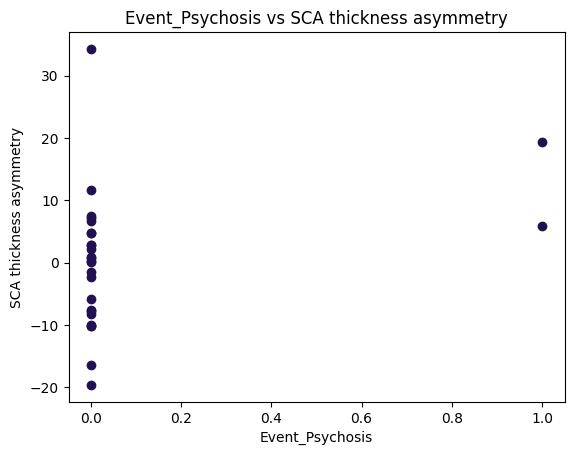

<Figure size 640x480 with 0 Axes>

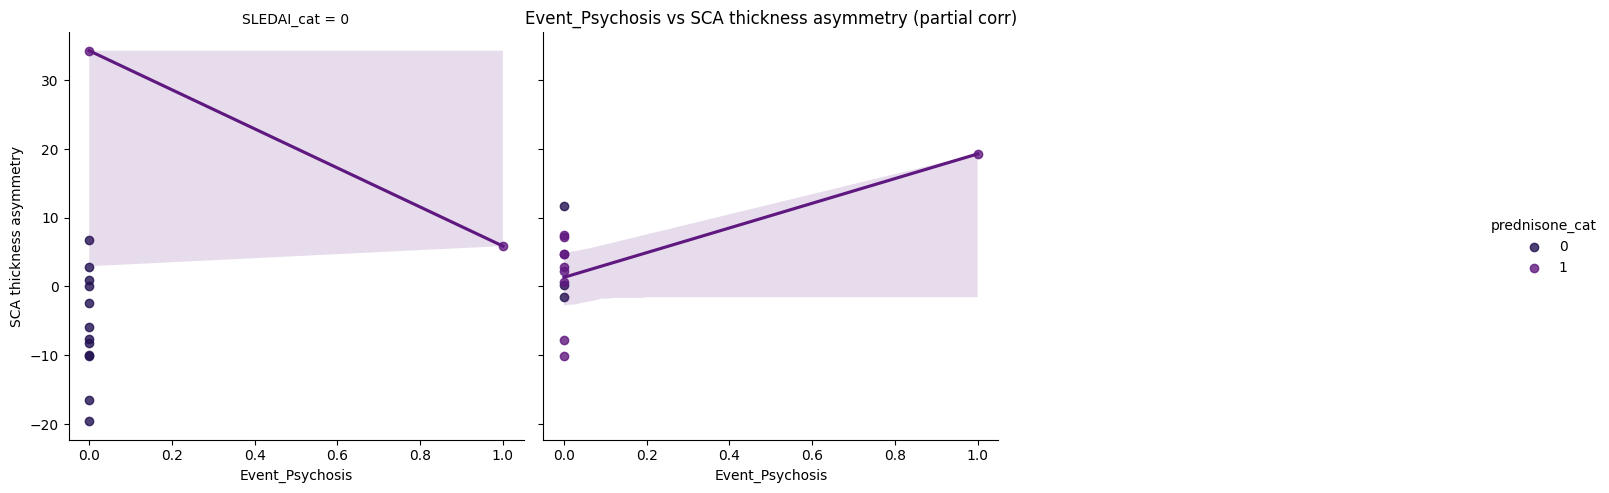

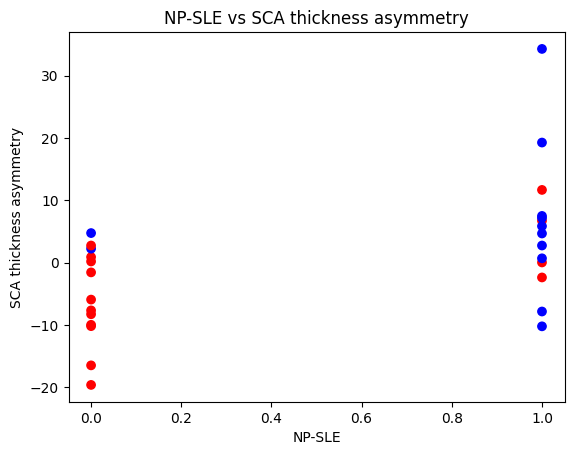

<Figure size 640x480 with 0 Axes>

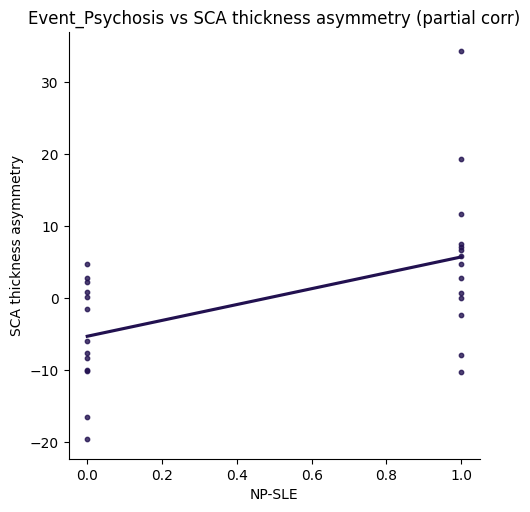

Event_Seizure vs SCA thickness asymmetry: r = -0.05, p = 0.80
Event_Seizure vs SCA thickness asymmetry (partial corr): r = 0.04, p = 0.84
total_neurocog vs SCA thickness asymmetry: r = 0.51, p = 0.01
NP-SLE vs SCA thickness asymmetry (partial corr): r = 0.32, p = 0.14


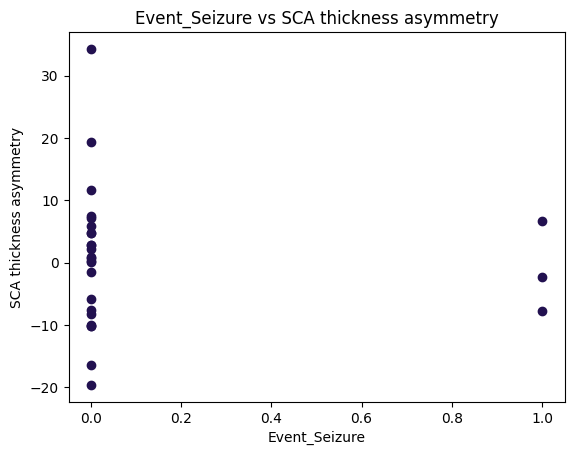

<Figure size 640x480 with 0 Axes>

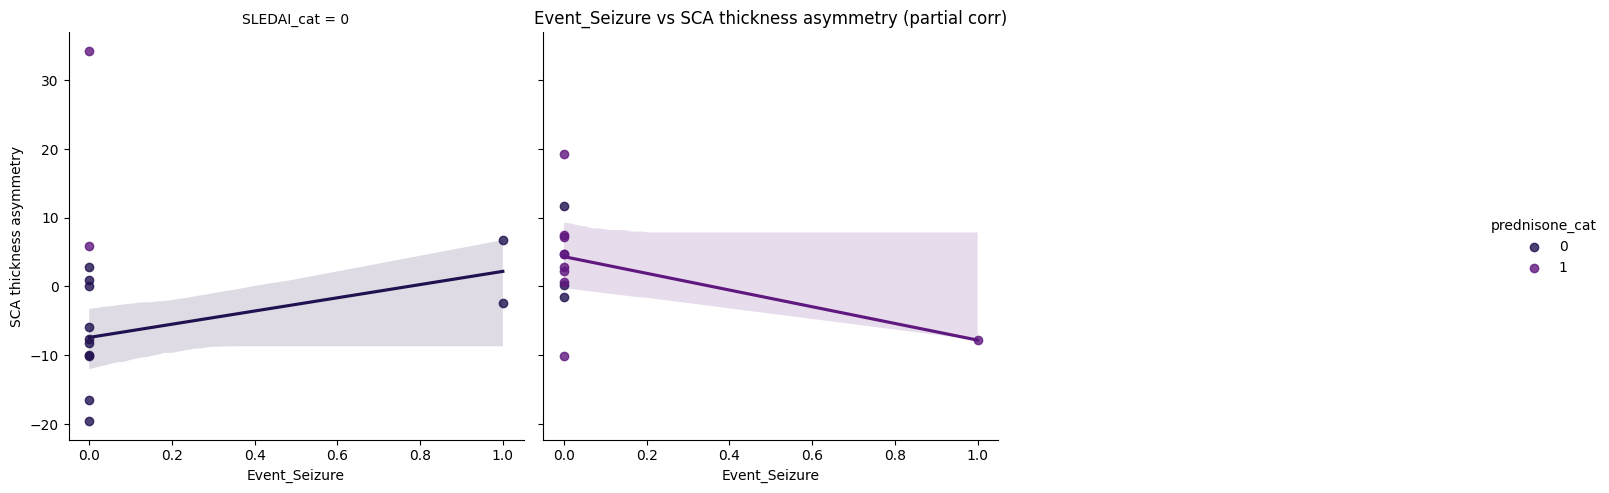

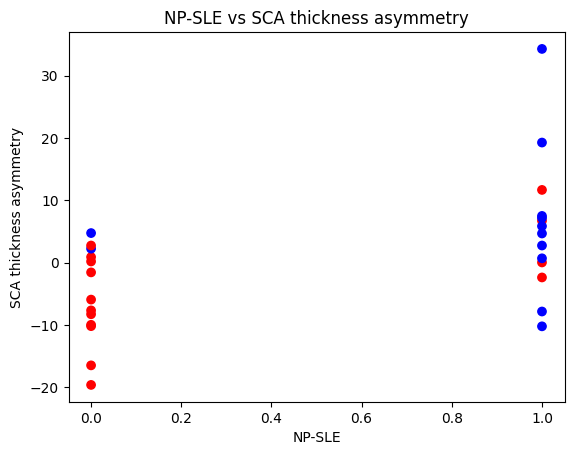

<Figure size 640x480 with 0 Axes>

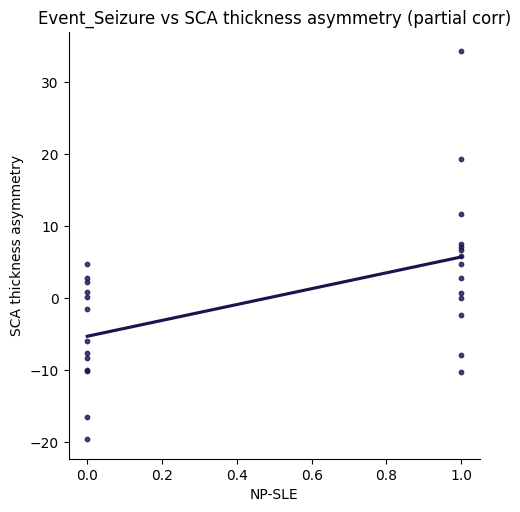

Event_Seizure, ACS, myelitis, CVA vs SCA thickness asymmetry: r = 0.20, p = 0.31
Event_Seizure, ACS, myelitis, CVA vs SCA thickness asymmetry (partial corr): r = 0.36, p = 0.09
total_neurocog vs SCA thickness asymmetry: r = 0.51, p = 0.01
NP-SLE vs SCA thickness asymmetry (partial corr): r = 0.32, p = 0.14


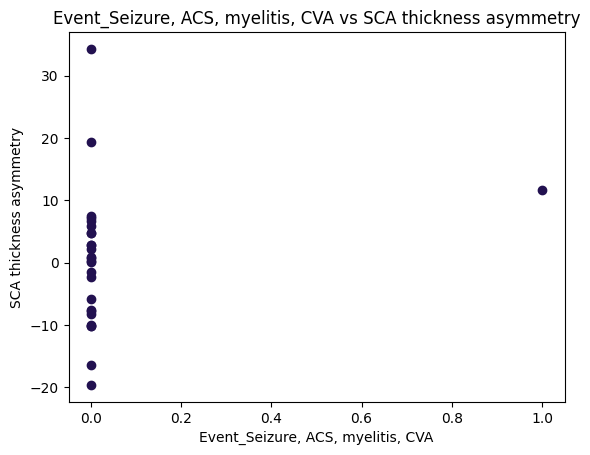

<Figure size 640x480 with 0 Axes>

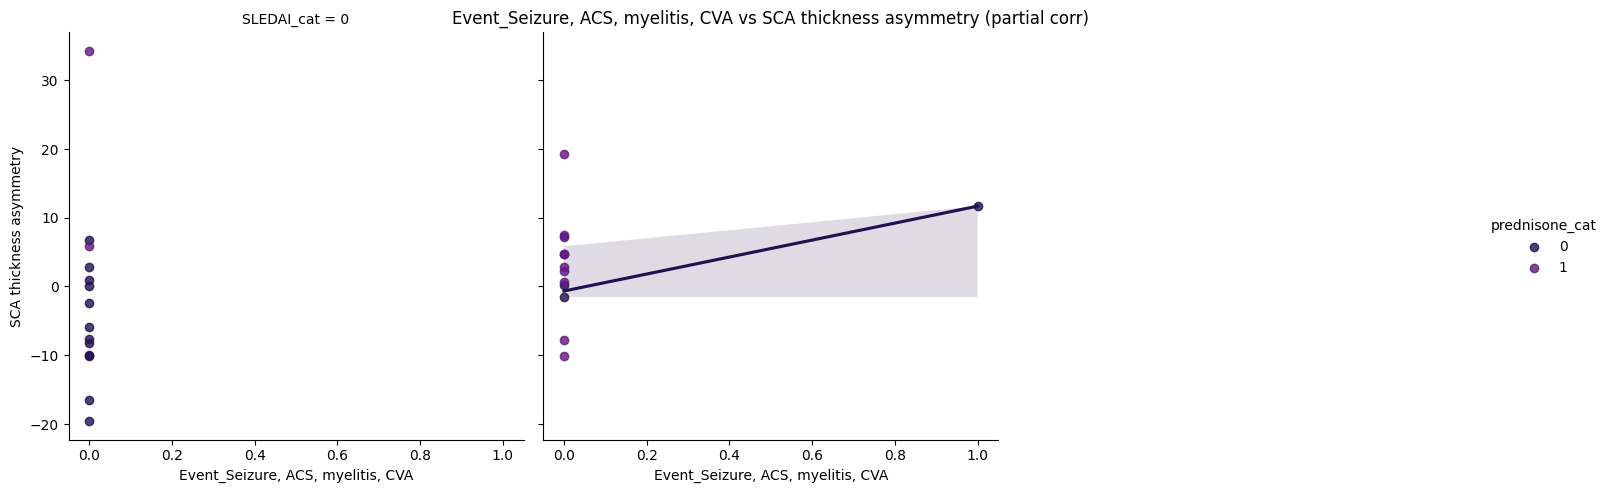

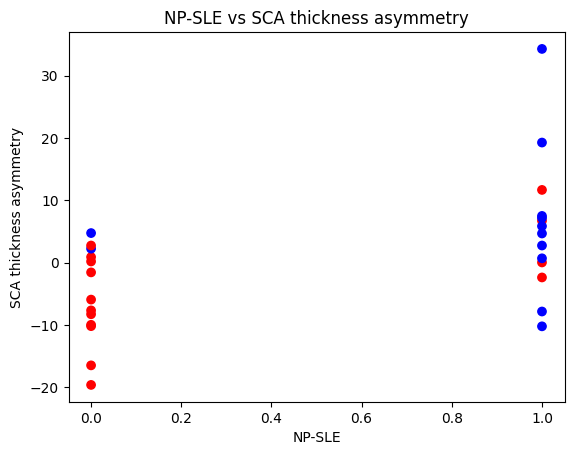

<Figure size 640x480 with 0 Axes>

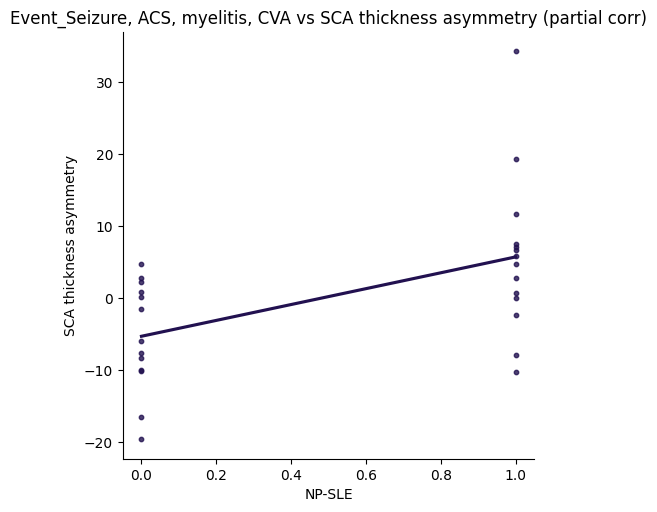

SCA thickness asymmetry vs SCA thickness asymmetry: r = 1.00, p = 0.00
total_neurocog vs SCA thickness asymmetry: r = 0.51, p = 0.01
NP-SLE vs SCA thickness asymmetry (partial corr): r = 0.32, p = 0.14


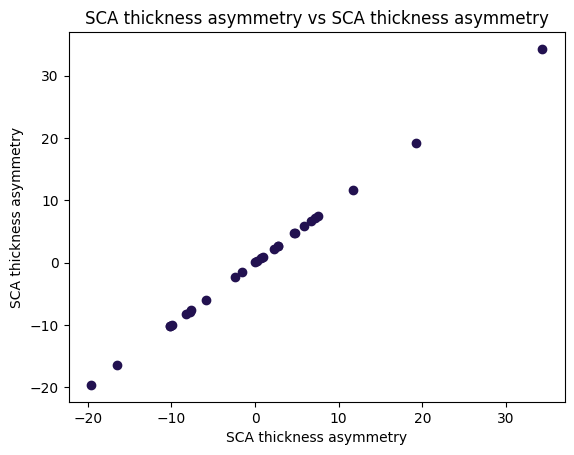

<Figure size 640x480 with 0 Axes>

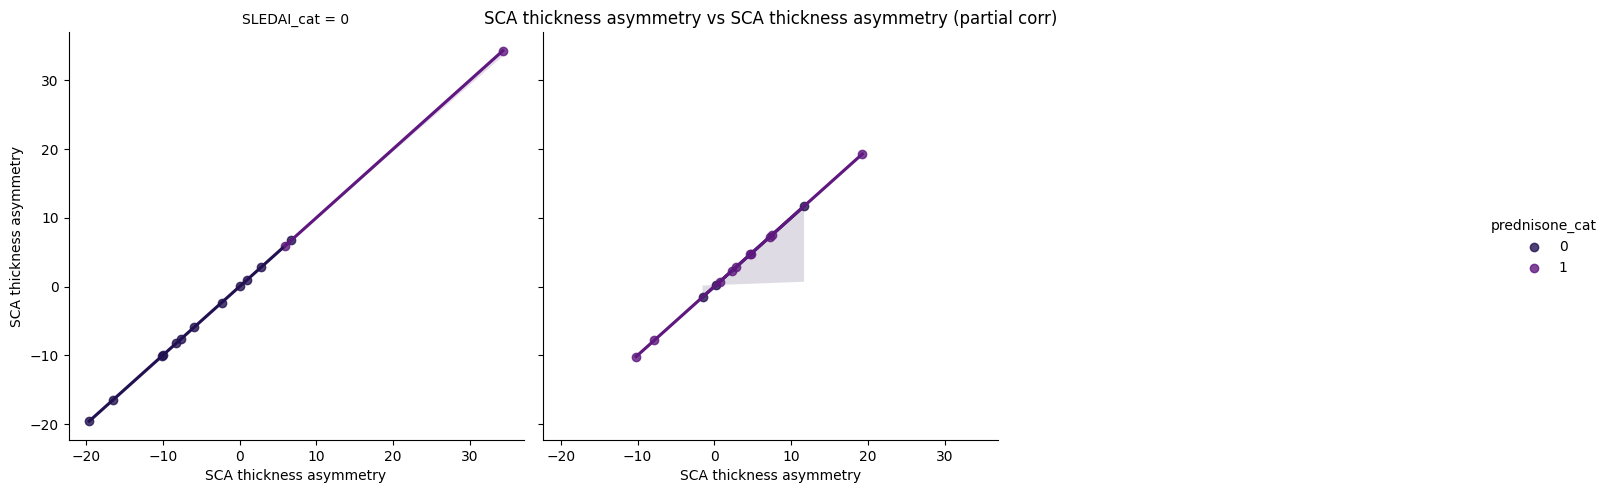

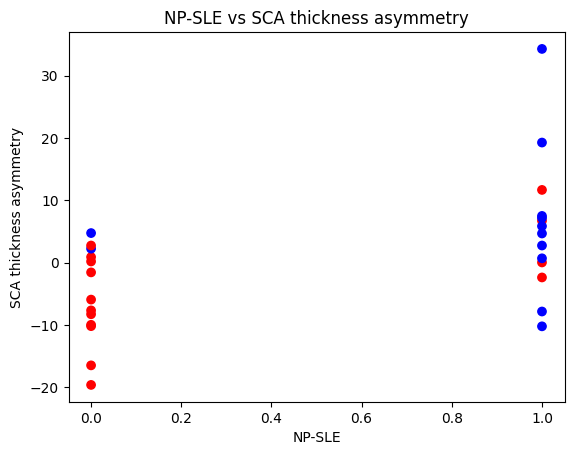

<Figure size 640x480 with 0 Axes>

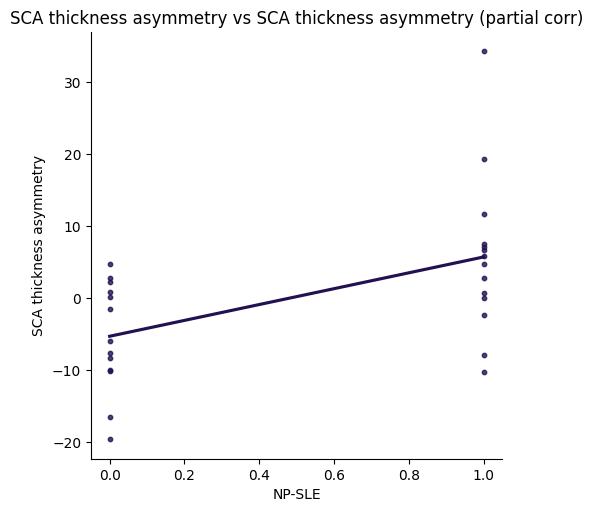

In [31]:
from scipy.stats import pearsonr
import pingouin as pg

df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)
# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'SCA thickness asymmetry'
prednisone = 'prednisone_cat'
sledai = 'SLEDAI_cat'

# Compute the correlations
for col in neurocog_cols + [lesion_load]:
    # Compute the Pearson correlation between each neurocognitive domain and lesion load
    r, p = pearsonr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and SLEDAI
    if col != lesion_load:
        partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, sledai, age, sex])
        r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
        print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
        assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

    # Compute the Pearson correlation between total neurocognitive score and lesion load
    r_total, p_total = pearsonr(df['NP-SLE'], df[lesion_load])
    print(f'total_neurocog vs {lesion_load}: r = {r_total:.2f}, p = {p_total:.2f}')

    # Compute the partial correlation adjusting for prednisone and SLEDAI
    total_partial_results = pg.partial_corr(data=df, x='NP-SLE', y=lesion_load, covar=[prednisone, sledai, age, sex])
    r_total_partial, p_total_partial = total_partial_results['r'][0], total_partial_results['p-val'][0]
    print(f'NP-SLE vs {lesion_load} (partial corr): r = {r_total_partial:.2f}, p = {p_total_partial:.2f}')


    # Plot the scatter plot
    plt.figure()
    plt.scatter(df[col], df[lesion_load])
    plt.xlabel(col)
    plt.ylabel(lesion_load)
    plt.title(f'{col} vs {lesion_load}')
    plt.show()

    # Plot the partial scatter plot
    plt.figure()
    sns.lmplot(data=df, x=col, y=lesion_load, hue=prednisone, col=sledai, col_wrap=3)
    plt.title(f'{col} vs {lesion_load} (partial corr)')
    plt.show()
    
    colors = ['red' if p == 0 else 'blue' for p in df[prednisone]]
    # Plot the scatter plot of total neurocognitive score vs lesion load
    plt.figure()
    plt.scatter(df['NP-SLE'], df[lesion_load], c=colors)
    plt.xlabel('NP-SLE')
    plt.ylabel(lesion_load)
    plt.title(f'NP-SLE vs {lesion_load}')
    plt.show()

    # Plot the partial scatter plot of total neurocognitive score vs lesion load
    plt.figure()
    sns.lmplot(data=df, x='NP-SLE', y=lesion_load, ci=None, scatter_kws={"s": 10})
    plt.title(f'{col} vs {lesion_load} (partial corr)')
    plt.show()

Event_CVA vs Amygdala right volume %: r = 0.04, p = 0.86
Event_CVA vs Amygdala right volume % (partial corr): r = 0.06, p = 0.78
total_neurocog vs Amygdala right volume %: r = 0.46, p = 0.02
NP-SLE vs Amygdala right volume % (partial corr): r = 0.36, p = 0.09


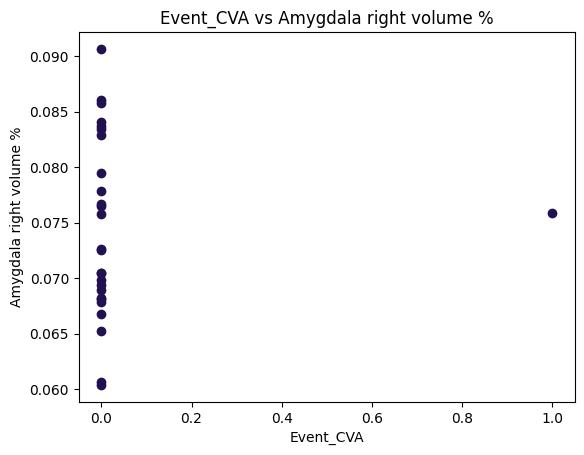

<Figure size 640x480 with 0 Axes>

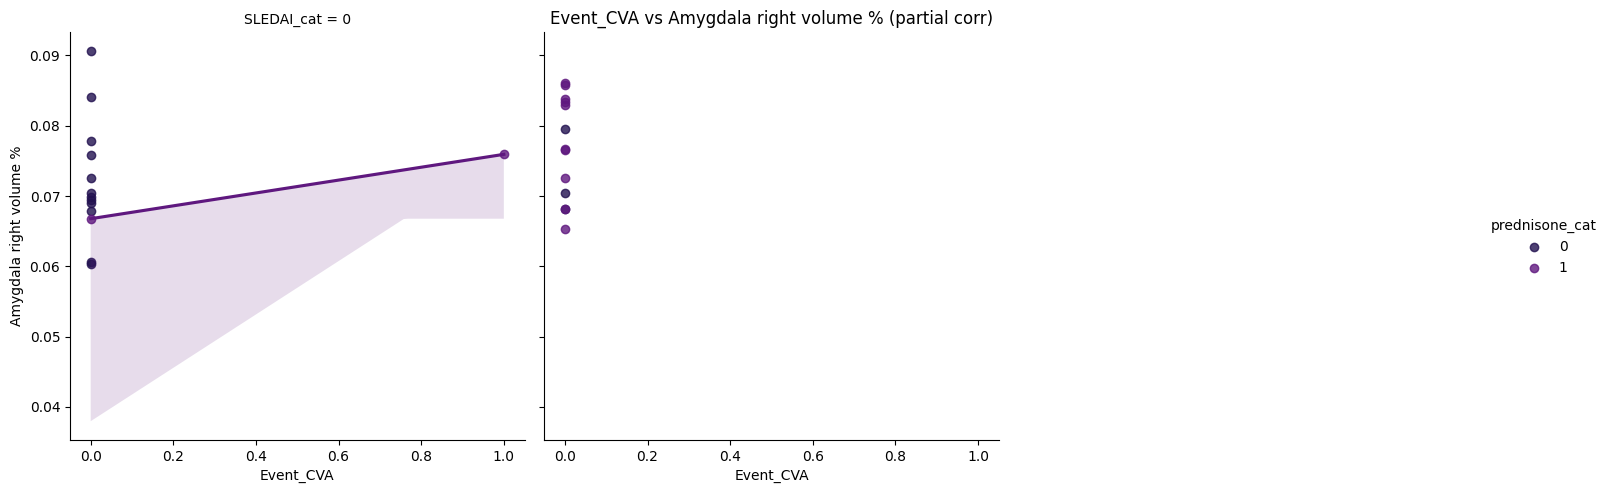

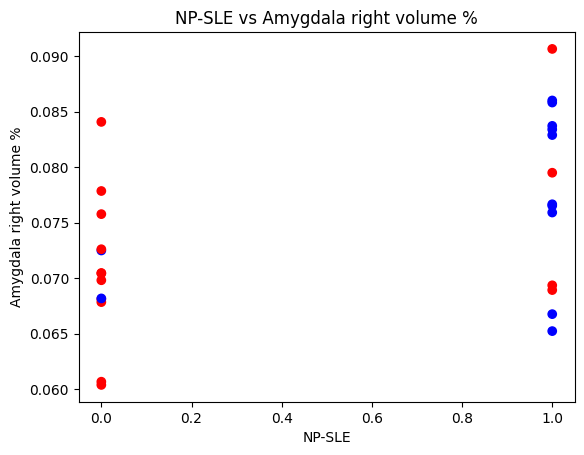

<Figure size 640x480 with 0 Axes>

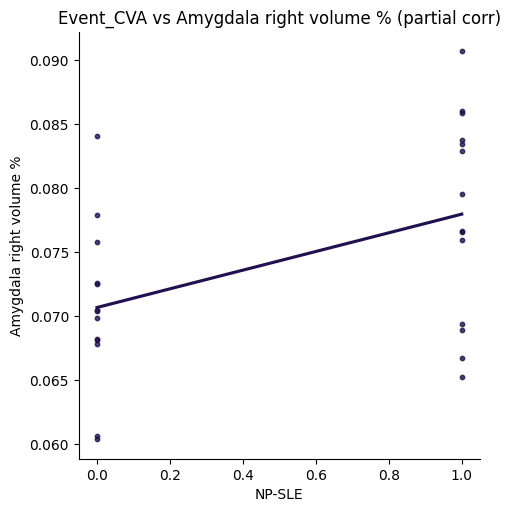

Event_Mood abnormalities (depressive) vs Amygdala right volume %: r = 0.28, p = 0.15
Event_Mood abnormalities (depressive) vs Amygdala right volume % (partial corr): r = 0.16, p = 0.46
total_neurocog vs Amygdala right volume %: r = 0.46, p = 0.02
NP-SLE vs Amygdala right volume % (partial corr): r = 0.36, p = 0.09


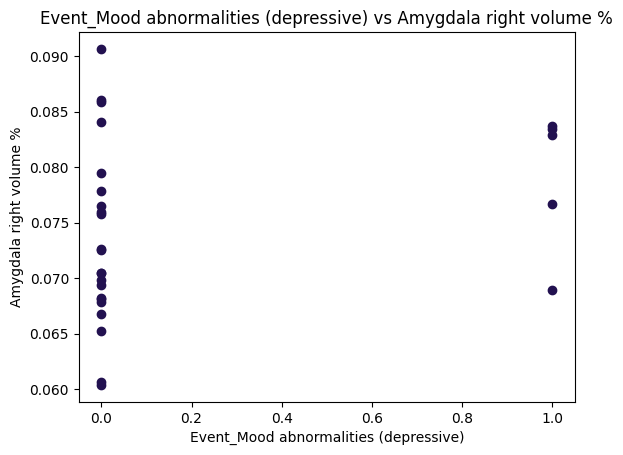

<Figure size 640x480 with 0 Axes>

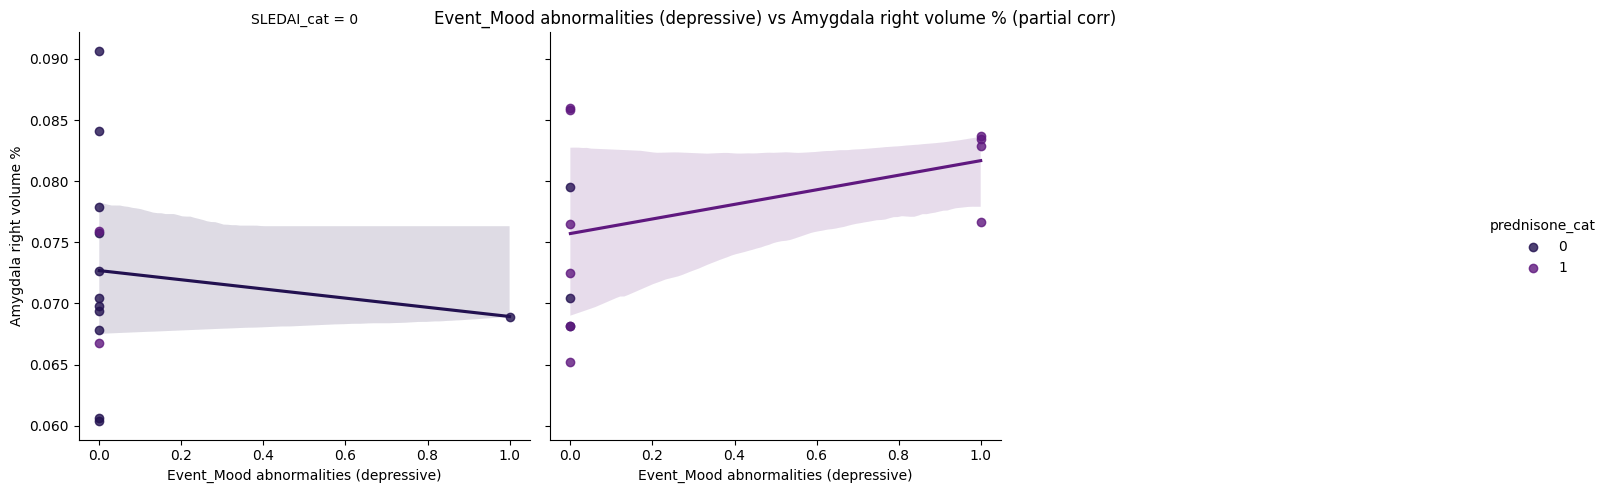

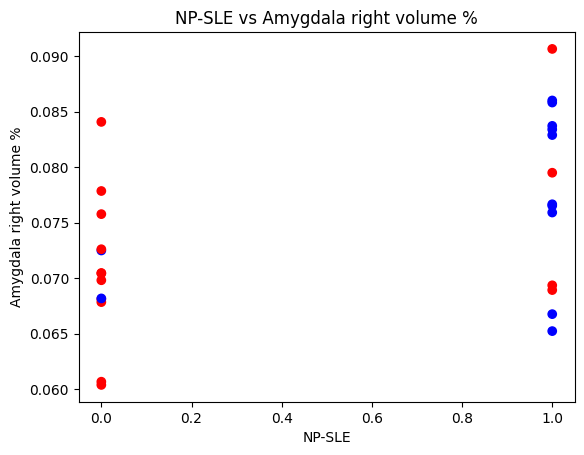

<Figure size 640x480 with 0 Axes>

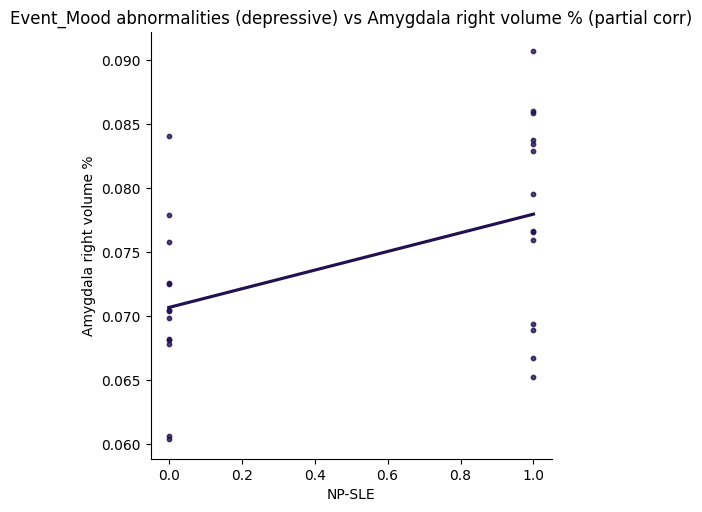

Event_Mood abnormalities (mixed) vs Amygdala right volume %: r = 0.28, p = 0.15
Event_Mood abnormalities (mixed) vs Amygdala right volume % (partial corr): r = 0.16, p = 0.46
total_neurocog vs Amygdala right volume %: r = 0.46, p = 0.02
NP-SLE vs Amygdala right volume % (partial corr): r = 0.36, p = 0.09


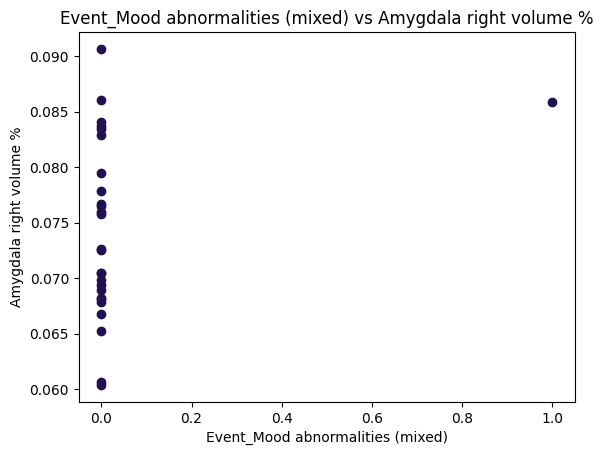

<Figure size 640x480 with 0 Axes>

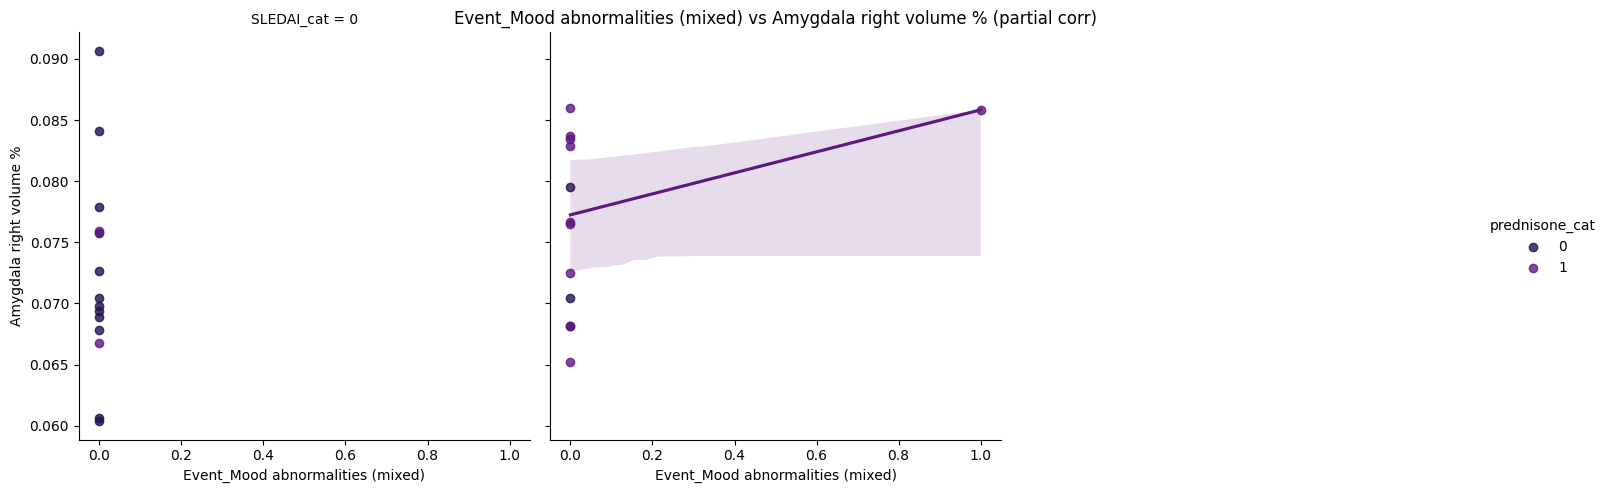

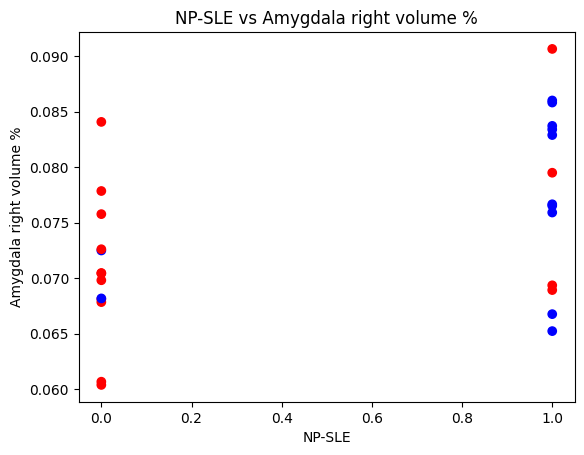

<Figure size 640x480 with 0 Axes>

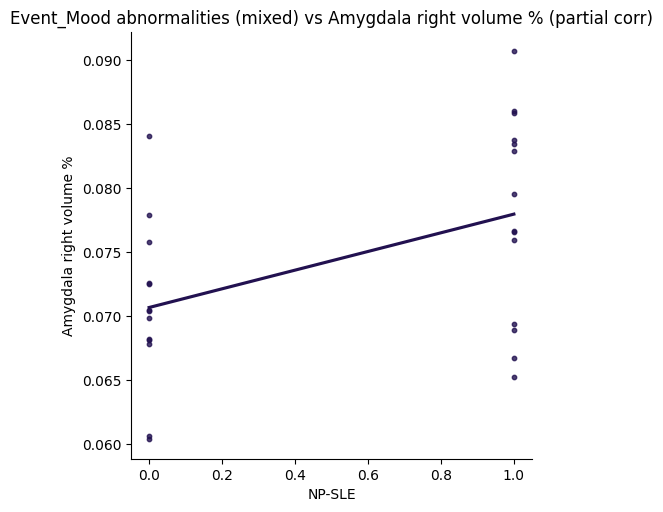

Event_Movement Disorder vs Amygdala right volume %: r = 0.29, p = 0.15
Event_Movement Disorder vs Amygdala right volume % (partial corr): r = 0.16, p = 0.47
total_neurocog vs Amygdala right volume %: r = 0.46, p = 0.02
NP-SLE vs Amygdala right volume % (partial corr): r = 0.36, p = 0.09


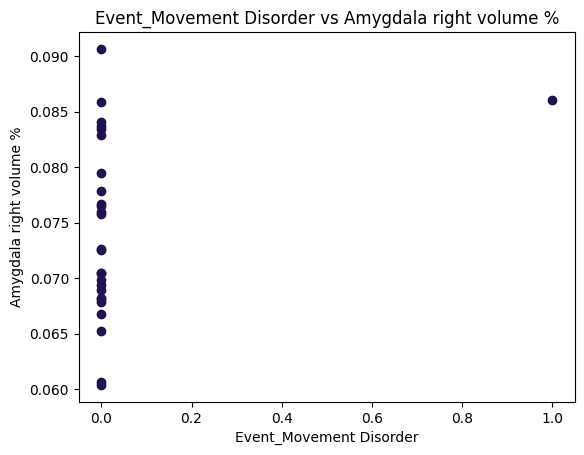

<Figure size 640x480 with 0 Axes>

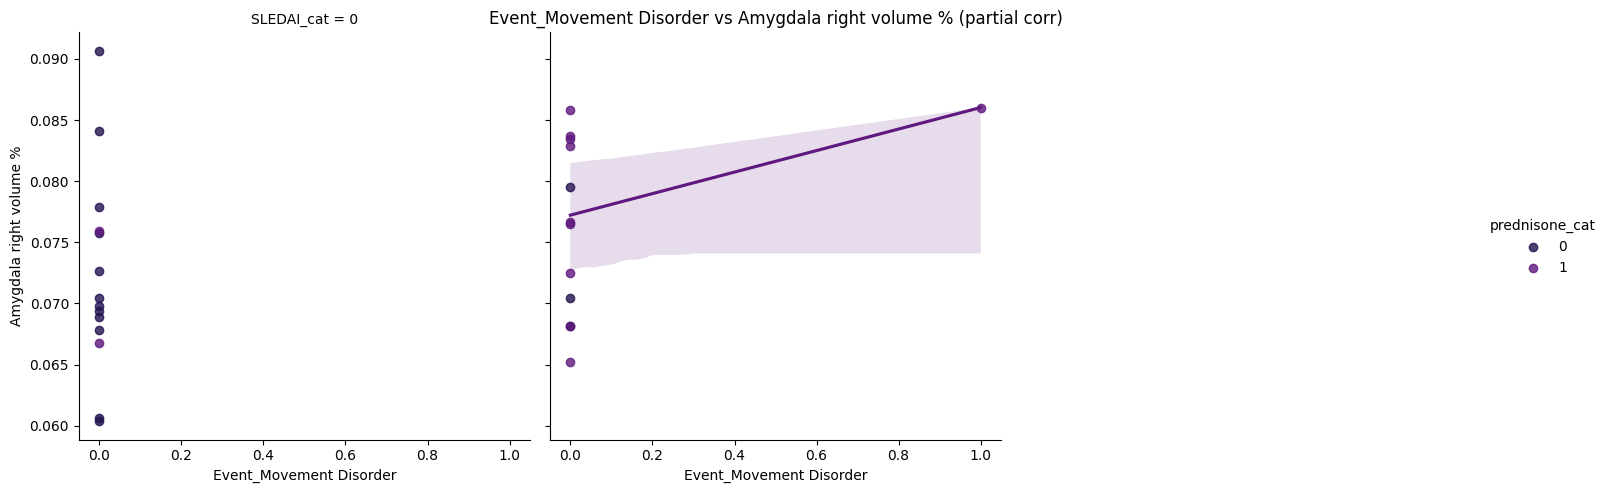

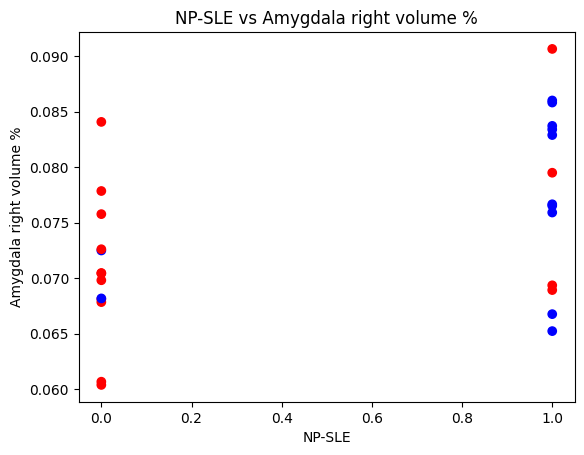

<Figure size 640x480 with 0 Axes>

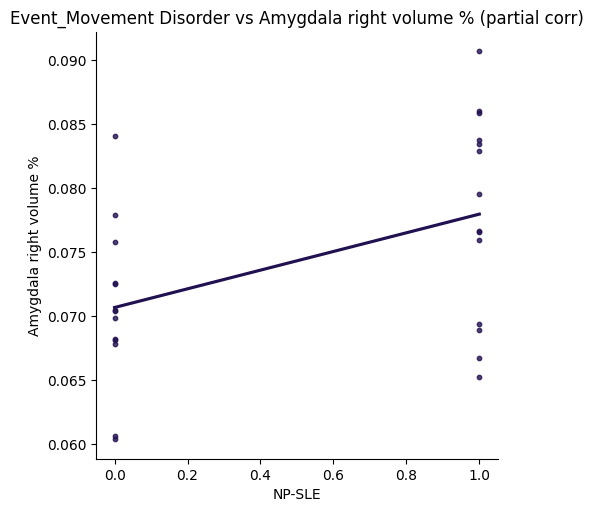

Event_Psychosis vs Amygdala right volume %: r = -0.10, p = 0.62
Event_Psychosis vs Amygdala right volume % (partial corr): r = -0.16, p = 0.45
total_neurocog vs Amygdala right volume %: r = 0.46, p = 0.02
NP-SLE vs Amygdala right volume % (partial corr): r = 0.36, p = 0.09


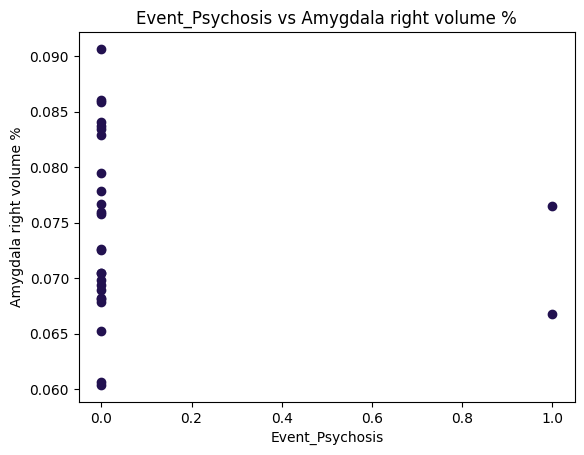

<Figure size 640x480 with 0 Axes>

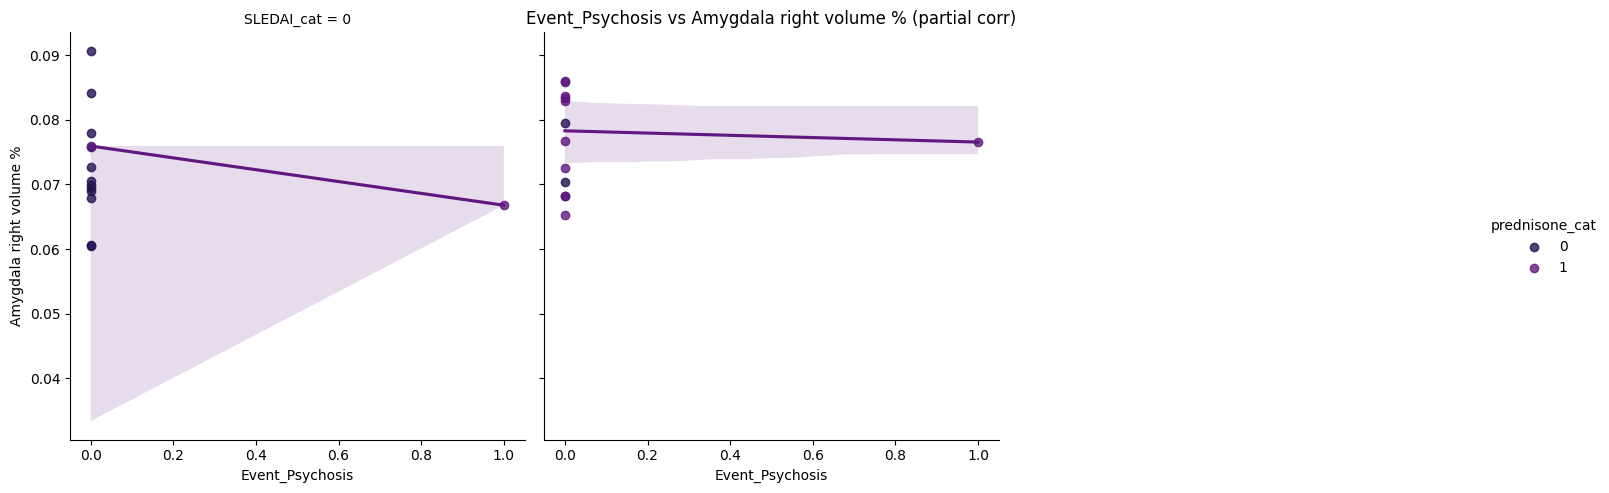

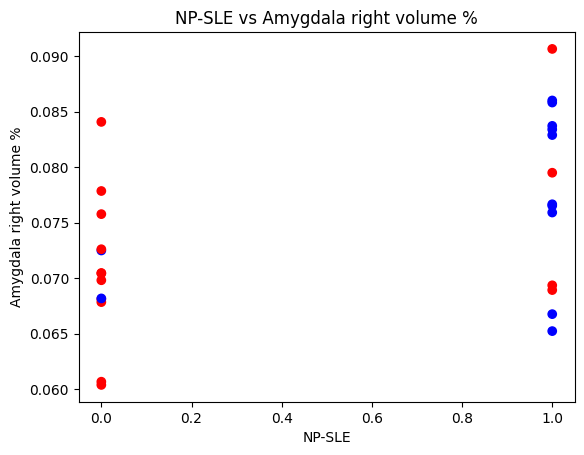

<Figure size 640x480 with 0 Axes>

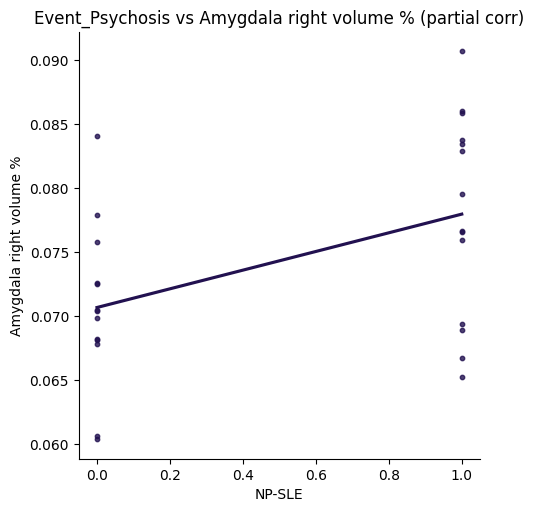

Event_Seizure vs Amygdala right volume %: r = 0.03, p = 0.89
Event_Seizure vs Amygdala right volume % (partial corr): r = 0.17, p = 0.43
total_neurocog vs Amygdala right volume %: r = 0.46, p = 0.02
NP-SLE vs Amygdala right volume % (partial corr): r = 0.36, p = 0.09


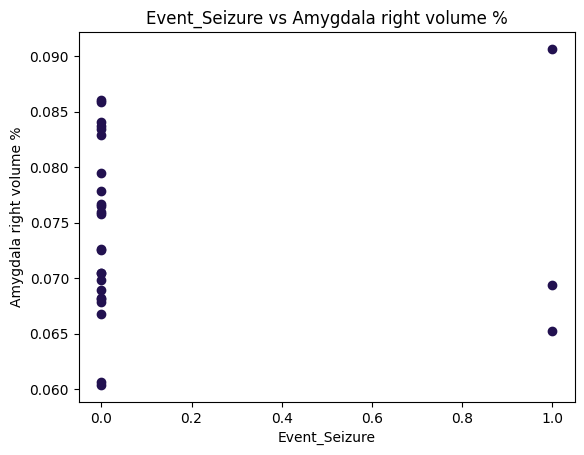

<Figure size 640x480 with 0 Axes>

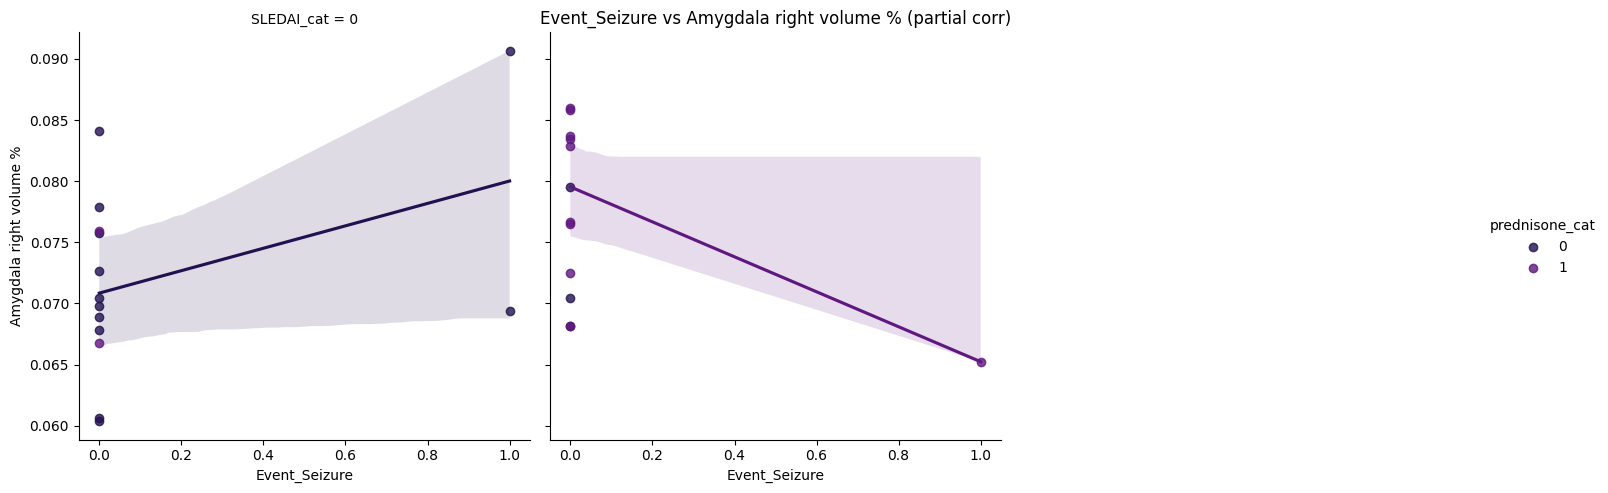

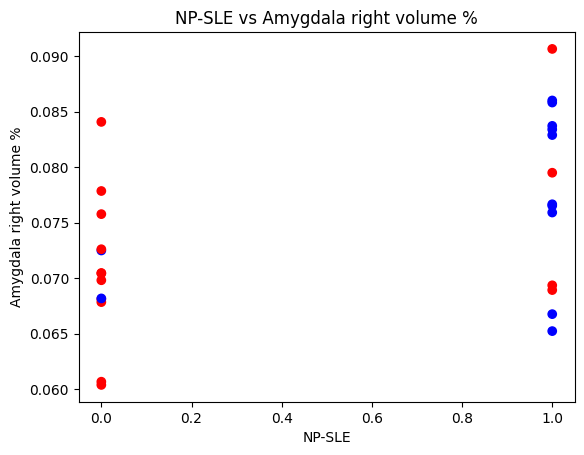

<Figure size 640x480 with 0 Axes>

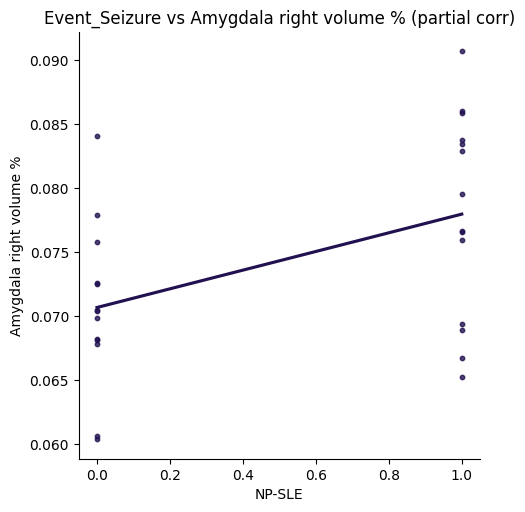

Event_Seizure, ACS, myelitis, CVA vs Amygdala right volume %: r = 0.13, p = 0.53
Event_Seizure, ACS, myelitis, CVA vs Amygdala right volume % (partial corr): r = 0.08, p = 0.73
total_neurocog vs Amygdala right volume %: r = 0.46, p = 0.02
NP-SLE vs Amygdala right volume % (partial corr): r = 0.36, p = 0.09


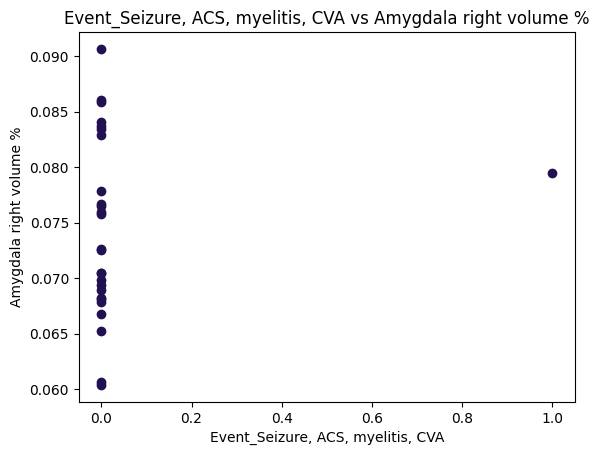

<Figure size 640x480 with 0 Axes>

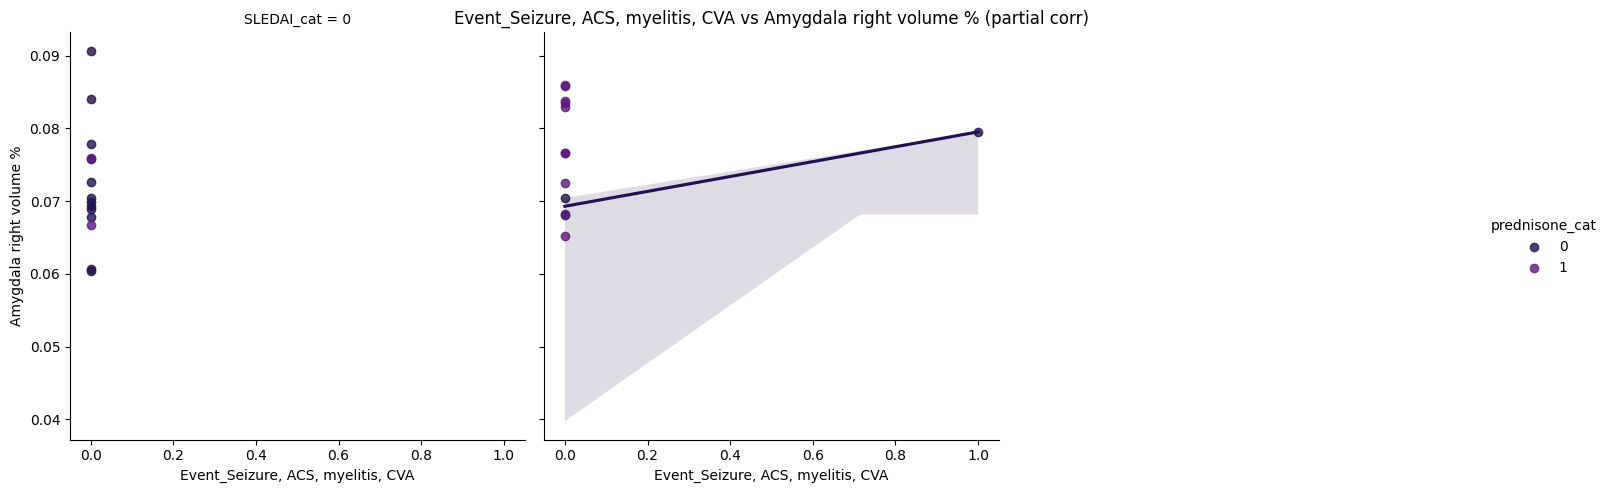

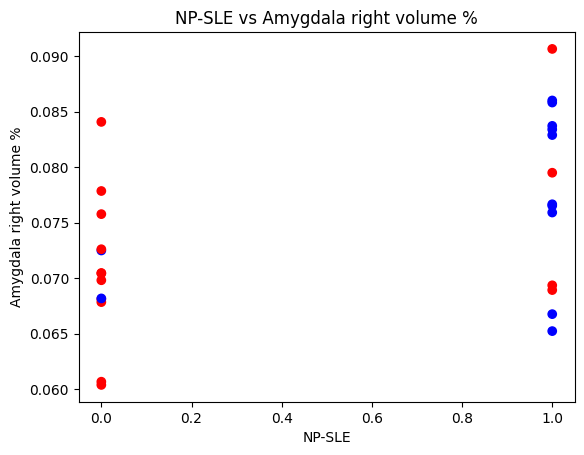

<Figure size 640x480 with 0 Axes>

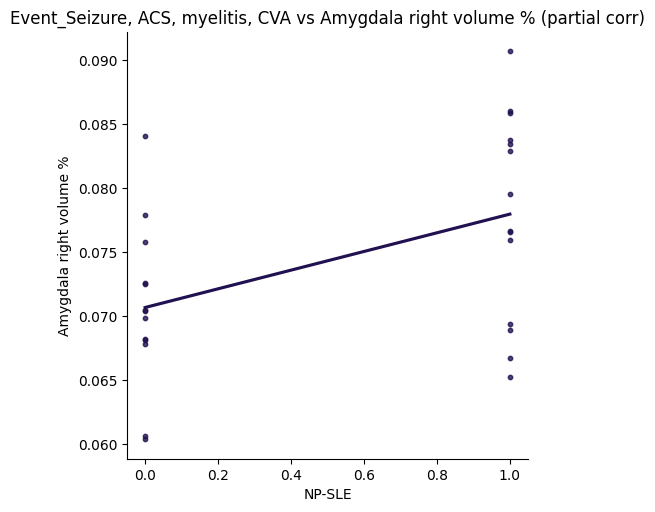

Amygdala right volume % vs Amygdala right volume %: r = 1.00, p = 0.00
total_neurocog vs Amygdala right volume %: r = 0.46, p = 0.02
NP-SLE vs Amygdala right volume % (partial corr): r = 0.36, p = 0.09


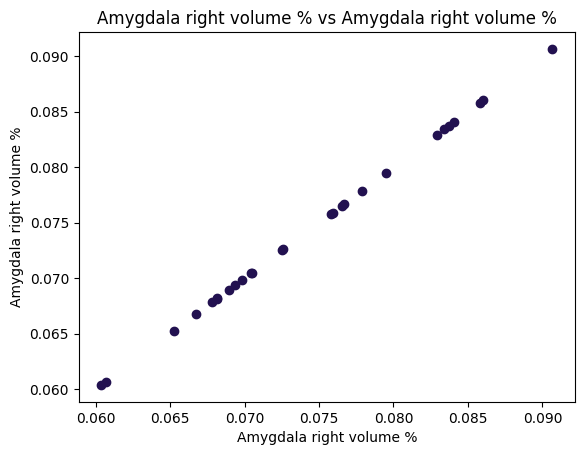

<Figure size 640x480 with 0 Axes>

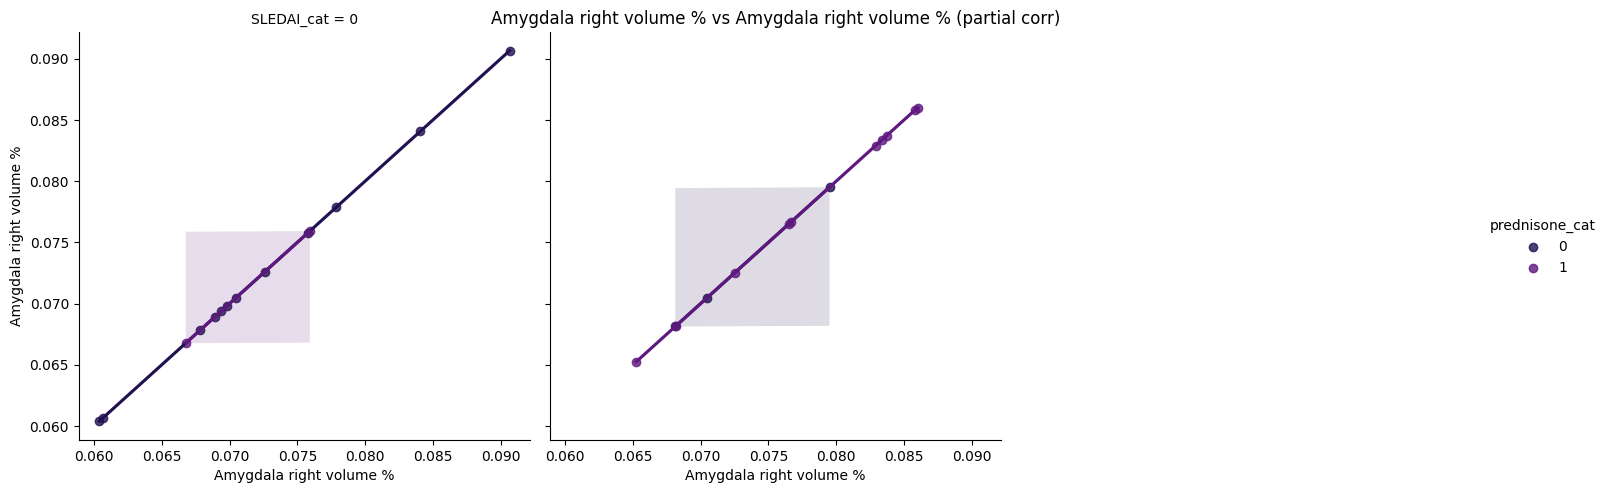

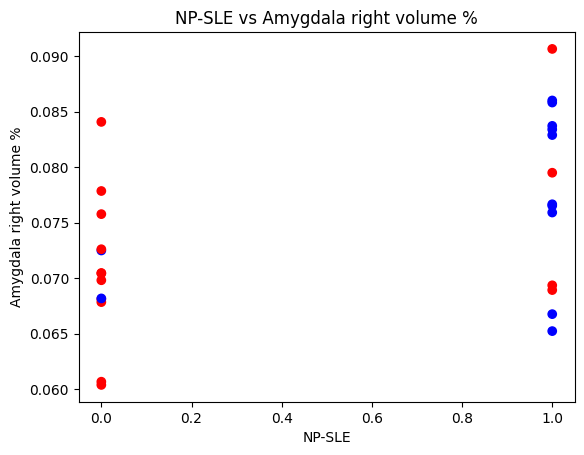

<Figure size 640x480 with 0 Axes>

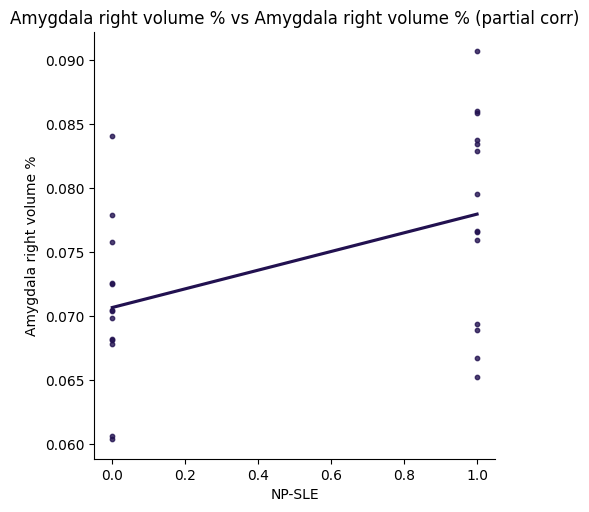

In [32]:
from scipy.stats import pearsonr
import pingouin as pg

df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)
# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Amygdala right volume %'
prednisone = 'prednisone_cat'
sledai = 'SLEDAI_cat'

# Compute the correlations
for col in neurocog_cols + [lesion_load]:
    # Compute the Pearson correlation between each neurocognitive domain and lesion load
    r, p = pearsonr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and SLEDAI
    if col != lesion_load:
        partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, sledai, age, sex])
        r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
        print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
        assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

    # Compute the Pearson correlation between total neurocognitive score and lesion load
    r_total, p_total = pearsonr(df['NP-SLE'], df[lesion_load])
    print(f'total_neurocog vs {lesion_load}: r = {r_total:.2f}, p = {p_total:.2f}')

    # Compute the partial correlation adjusting for prednisone and SLEDAI
    total_partial_results = pg.partial_corr(data=df, x='NP-SLE', y=lesion_load, covar=[prednisone, sledai, age, sex])
    r_total_partial, p_total_partial = total_partial_results['r'][0], total_partial_results['p-val'][0]
    print(f'NP-SLE vs {lesion_load} (partial corr): r = {r_total_partial:.2f}, p = {p_total_partial:.2f}')


    # Plot the scatter plot
    plt.figure()
    plt.scatter(df[col], df[lesion_load])
    plt.xlabel(col)
    plt.ylabel(lesion_load)
    plt.title(f'{col} vs {lesion_load}')
    plt.show()

    # Plot the partial scatter plot
    plt.figure()
    sns.lmplot(data=df, x=col, y=lesion_load, hue=prednisone, col=sledai, col_wrap=3)
    plt.title(f'{col} vs {lesion_load} (partial corr)')
    plt.show()
    
    colors = ['red' if p == 0 else 'blue' for p in df[prednisone]]
    # Plot the scatter plot of total neurocognitive score vs lesion load
    plt.figure()
    plt.scatter(df['NP-SLE'], df[lesion_load], c=colors)
    plt.xlabel('NP-SLE')
    plt.ylabel(lesion_load)
    plt.title(f'NP-SLE vs {lesion_load}')
    plt.show()

    # Plot the partial scatter plot of total neurocognitive score vs lesion load
    plt.figure()
    sns.lmplot(data=df, x='NP-SLE', y=lesion_load, ci=None, scatter_kws={"s": 10})
    plt.title(f'{col} vs {lesion_load} (partial corr)')
    plt.show()

Event_CVA vs Temporal thickness asymmetry: r = 0.36, p = 0.07
Event_CVA vs Temporal thickness asymmetry (partial corr): r = 0.34, p = 0.11
total_neurocog vs Temporal thickness asymmetry: r = 0.44, p = 0.02
NP-SLE vs Temporal thickness asymmetry (partial corr): r = 0.50, p = 0.02


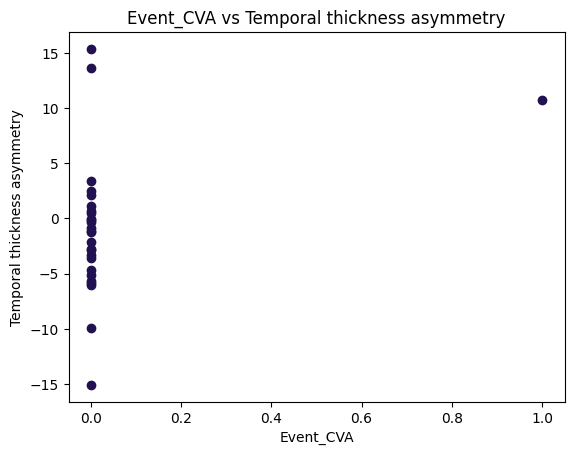

<Figure size 640x480 with 0 Axes>

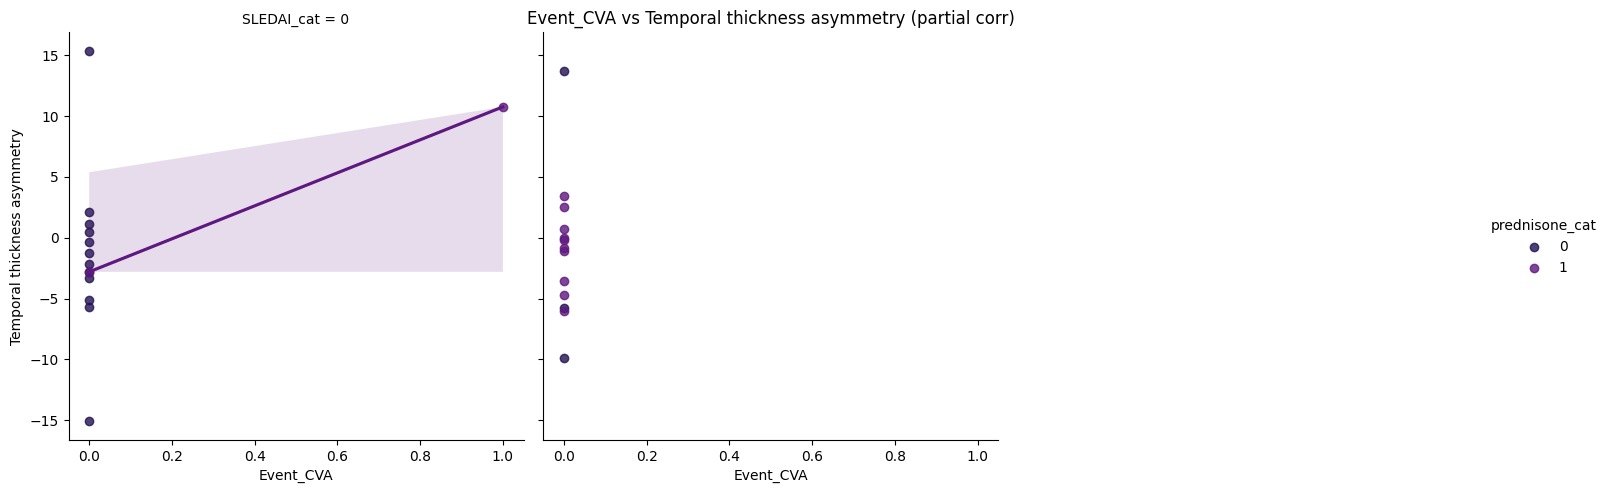

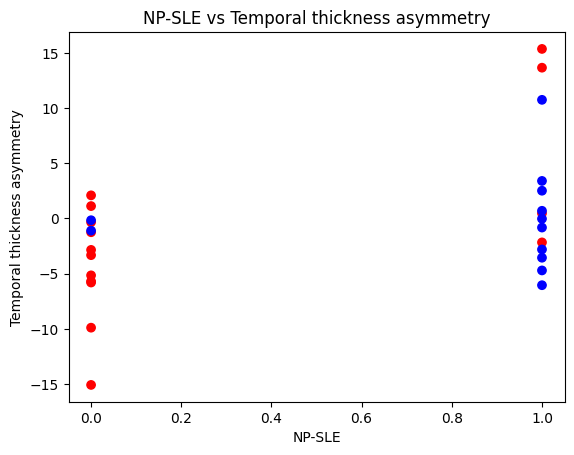

<Figure size 640x480 with 0 Axes>

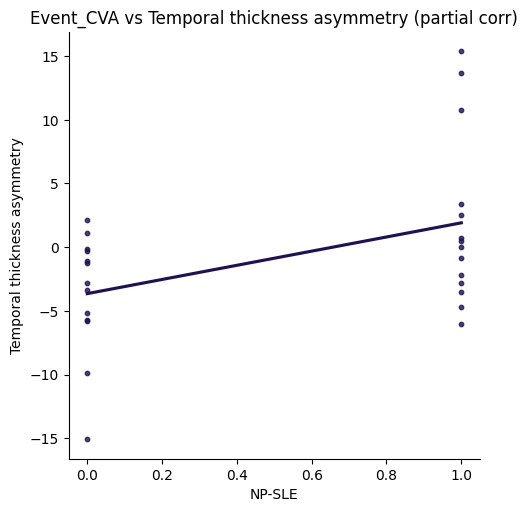

Event_Mood abnormalities (depressive) vs Temporal thickness asymmetry: r = 0.02, p = 0.91
Event_Mood abnormalities (depressive) vs Temporal thickness asymmetry (partial corr): r = -0.01, p = 0.98
total_neurocog vs Temporal thickness asymmetry: r = 0.44, p = 0.02
NP-SLE vs Temporal thickness asymmetry (partial corr): r = 0.50, p = 0.02


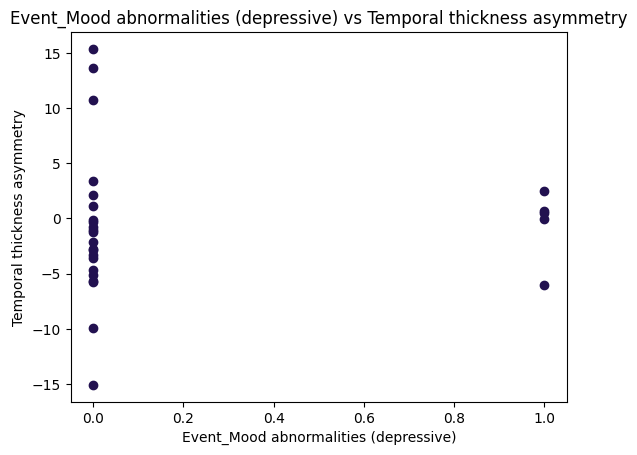

<Figure size 640x480 with 0 Axes>

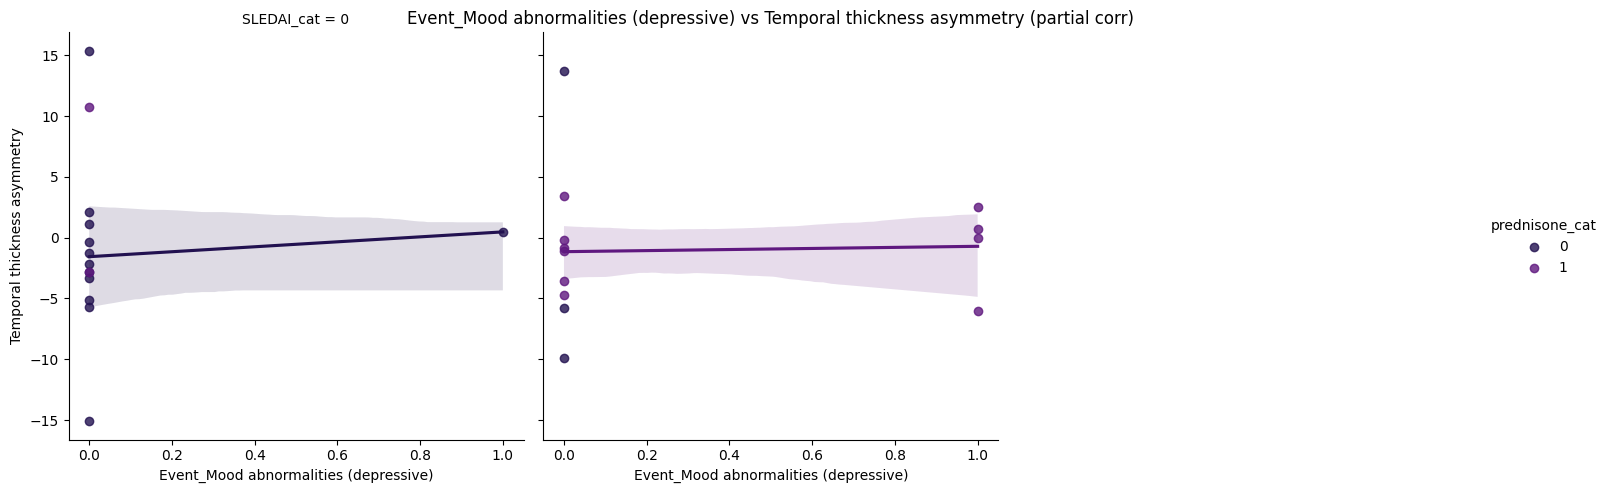

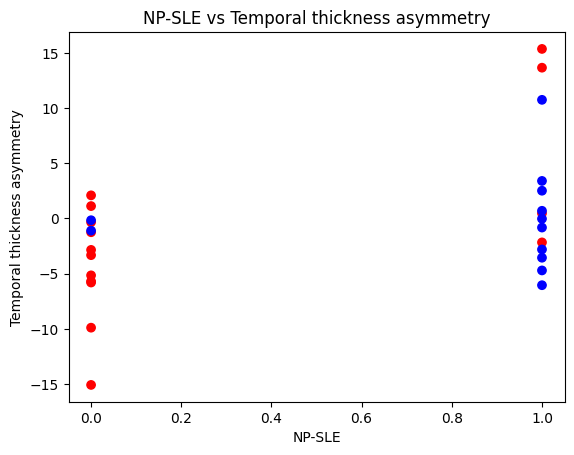

<Figure size 640x480 with 0 Axes>

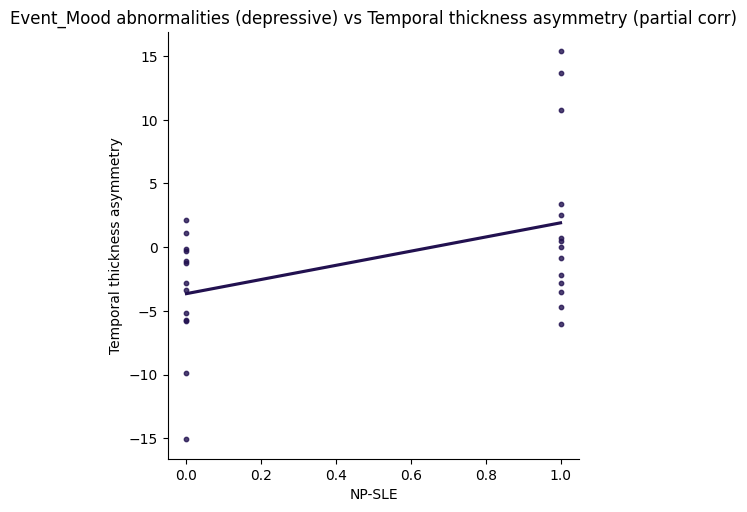

Event_Mood abnormalities (mixed) vs Temporal thickness asymmetry: r = -0.12, p = 0.54
Event_Mood abnormalities (mixed) vs Temporal thickness asymmetry (partial corr): r = -0.11, p = 0.62
total_neurocog vs Temporal thickness asymmetry: r = 0.44, p = 0.02
NP-SLE vs Temporal thickness asymmetry (partial corr): r = 0.50, p = 0.02


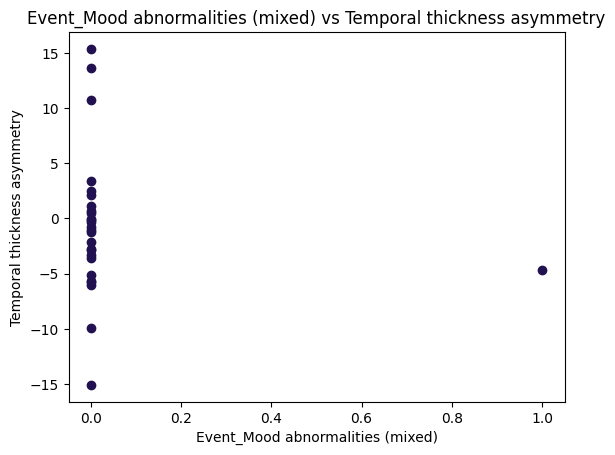

<Figure size 640x480 with 0 Axes>

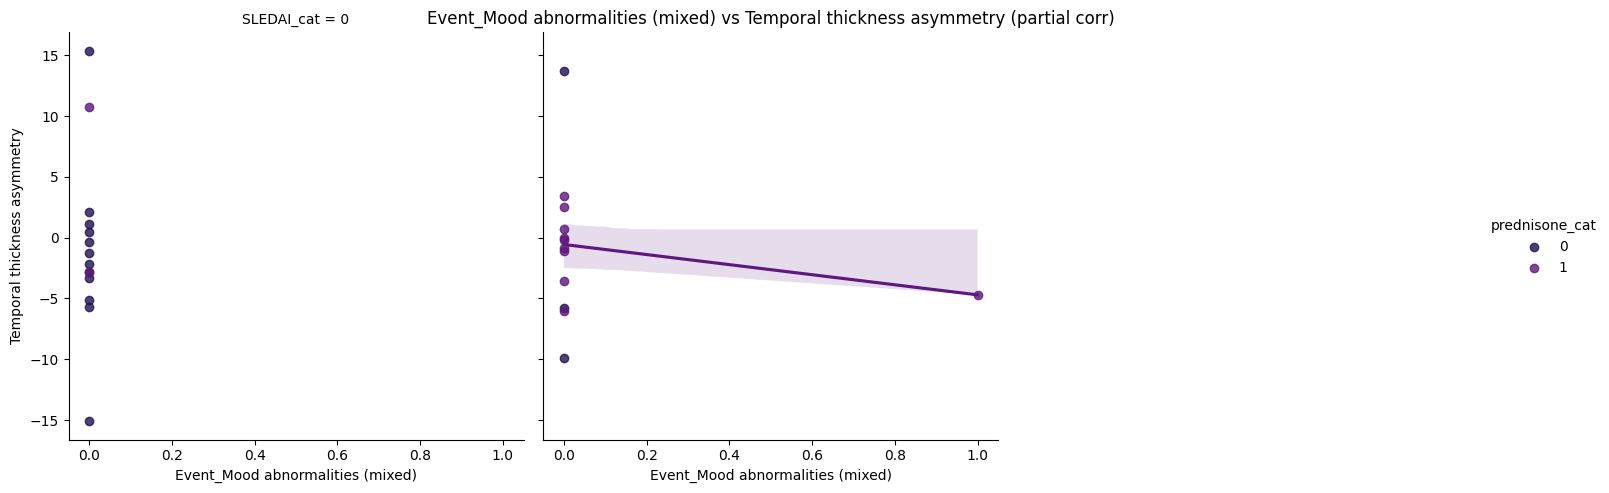

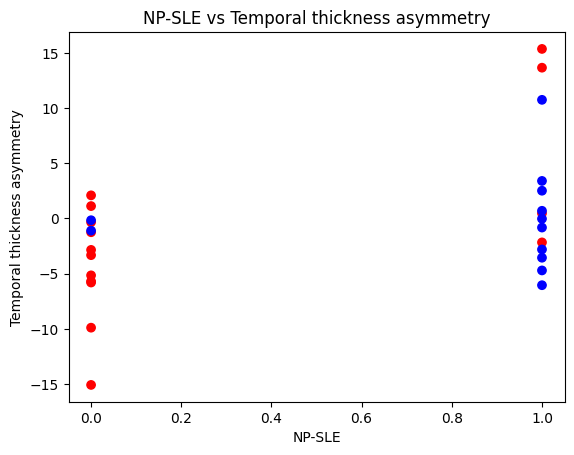

<Figure size 640x480 with 0 Axes>

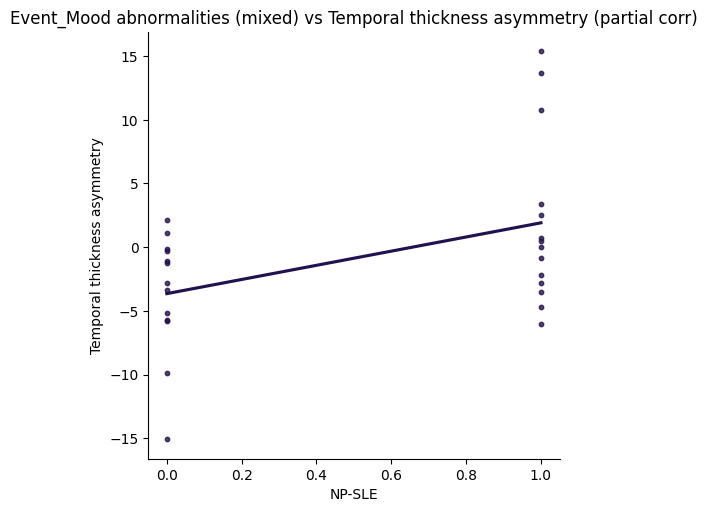

Event_Movement Disorder vs Temporal thickness asymmetry: r = 0.13, p = 0.52
Event_Movement Disorder vs Temporal thickness asymmetry (partial corr): r = 0.19, p = 0.40
total_neurocog vs Temporal thickness asymmetry: r = 0.44, p = 0.02
NP-SLE vs Temporal thickness asymmetry (partial corr): r = 0.50, p = 0.02


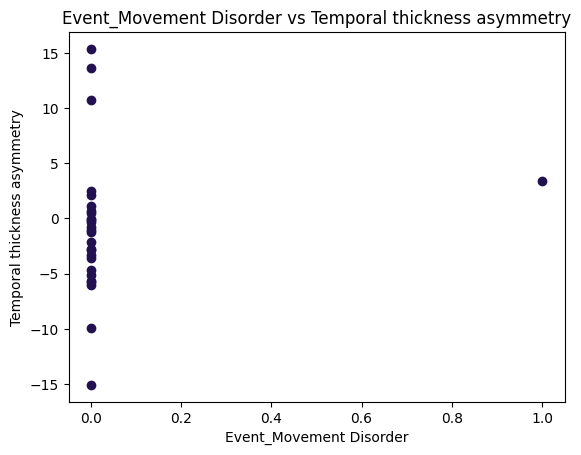

<Figure size 640x480 with 0 Axes>

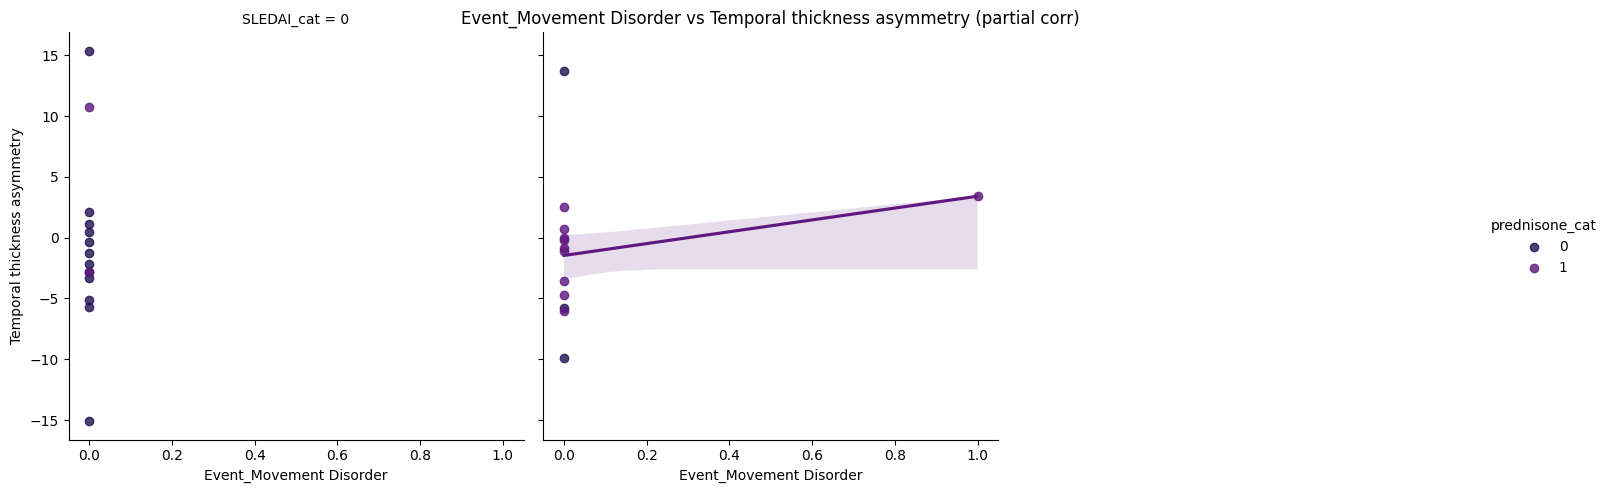

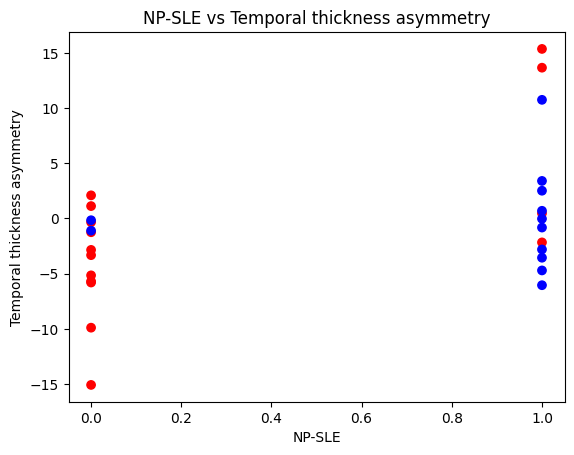

<Figure size 640x480 with 0 Axes>

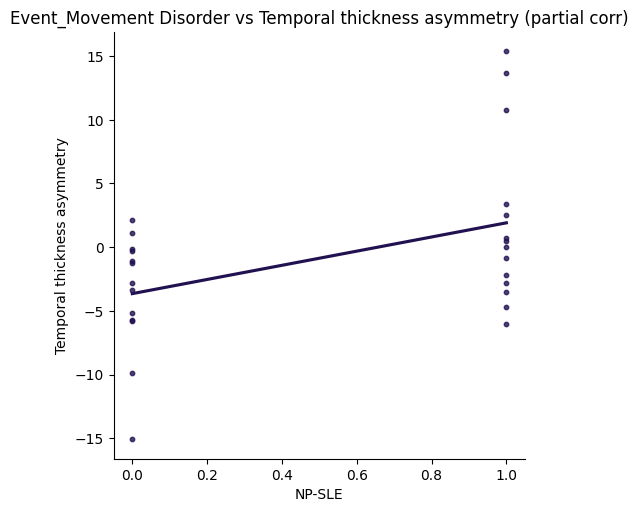

Event_Psychosis vs Temporal thickness asymmetry: r = -0.11, p = 0.59
Event_Psychosis vs Temporal thickness asymmetry (partial corr): r = -0.20, p = 0.35
total_neurocog vs Temporal thickness asymmetry: r = 0.44, p = 0.02
NP-SLE vs Temporal thickness asymmetry (partial corr): r = 0.50, p = 0.02


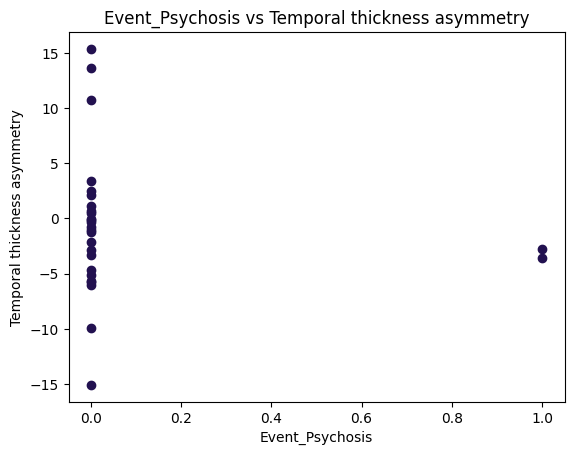

<Figure size 640x480 with 0 Axes>

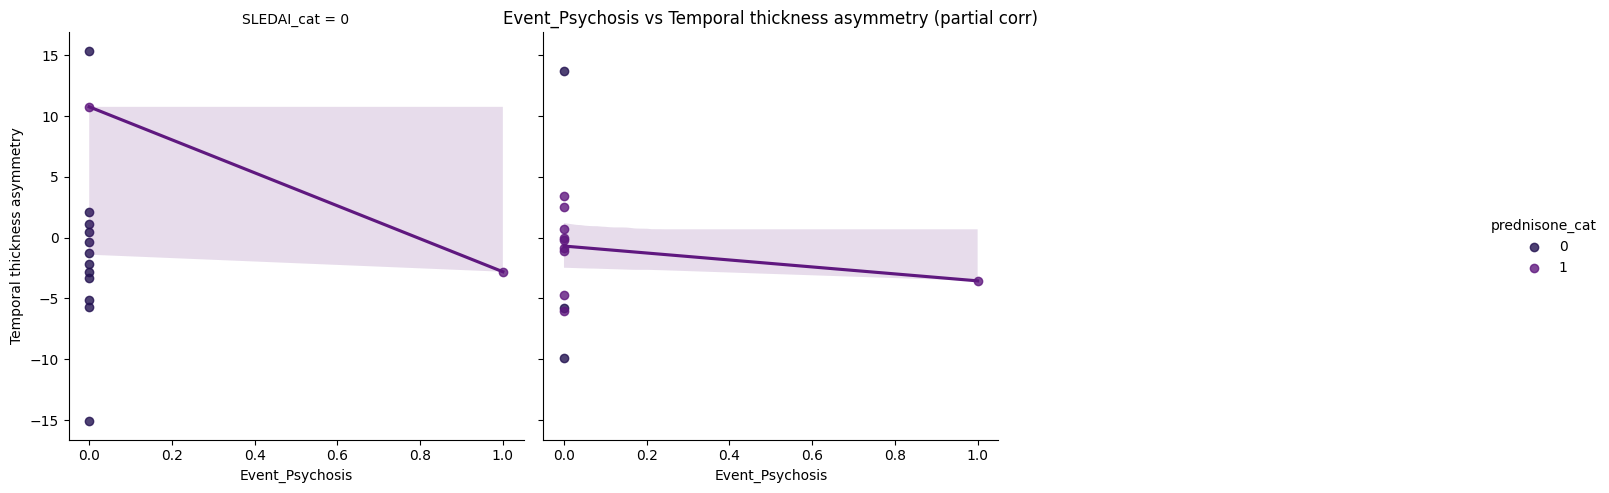

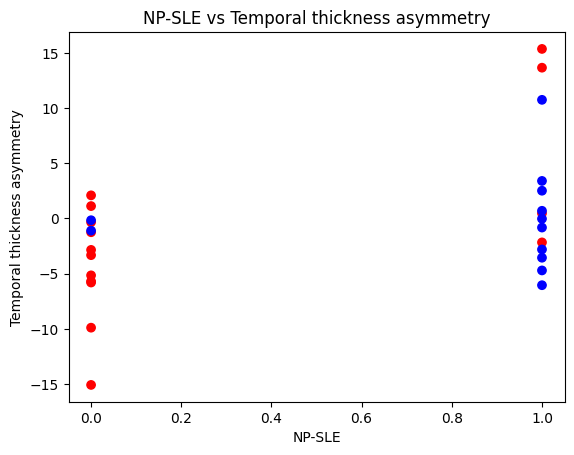

<Figure size 640x480 with 0 Axes>

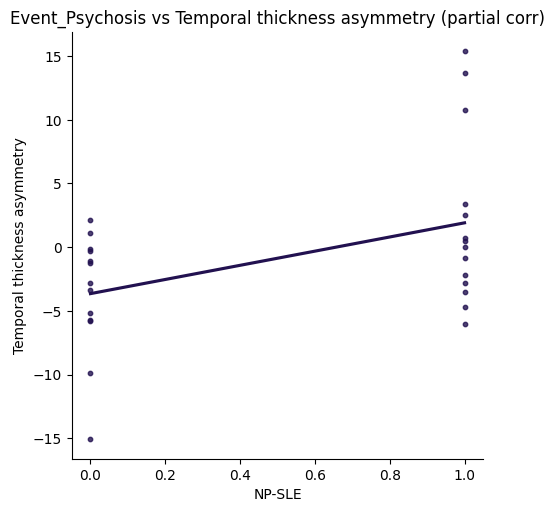

Event_Seizure vs Temporal thickness asymmetry: r = 0.27, p = 0.17
Event_Seizure vs Temporal thickness asymmetry (partial corr): r = 0.29, p = 0.18
total_neurocog vs Temporal thickness asymmetry: r = 0.44, p = 0.02
NP-SLE vs Temporal thickness asymmetry (partial corr): r = 0.50, p = 0.02


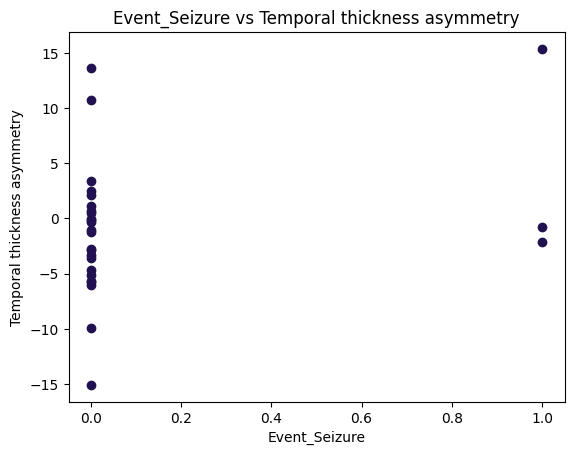

<Figure size 640x480 with 0 Axes>

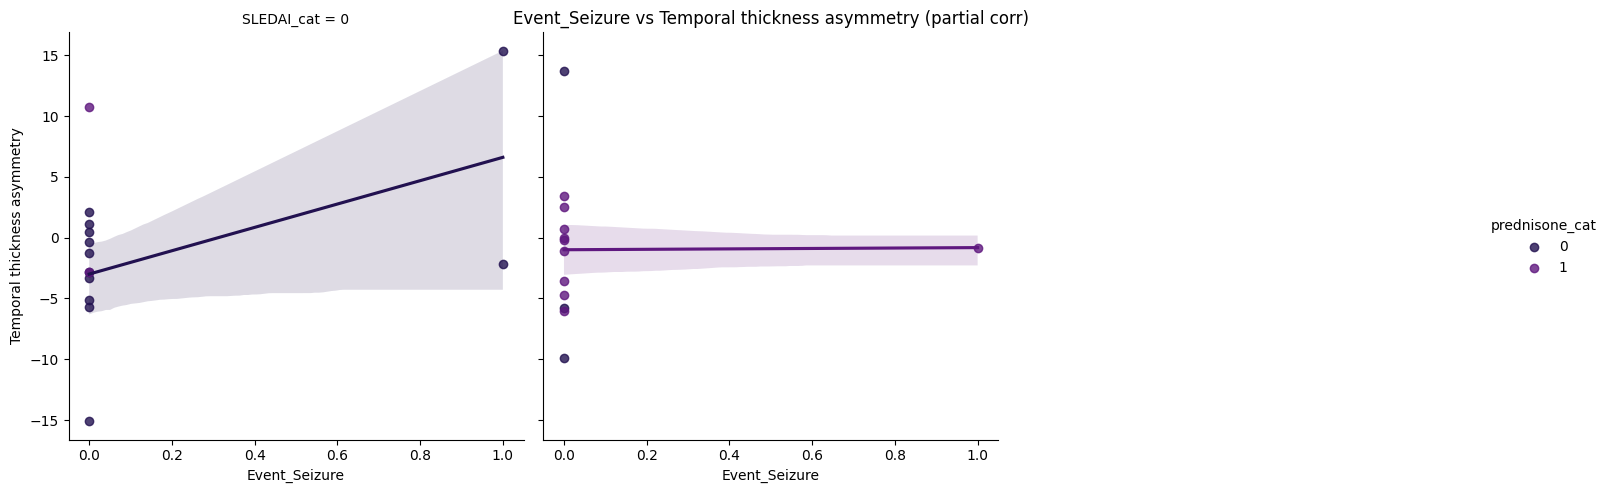

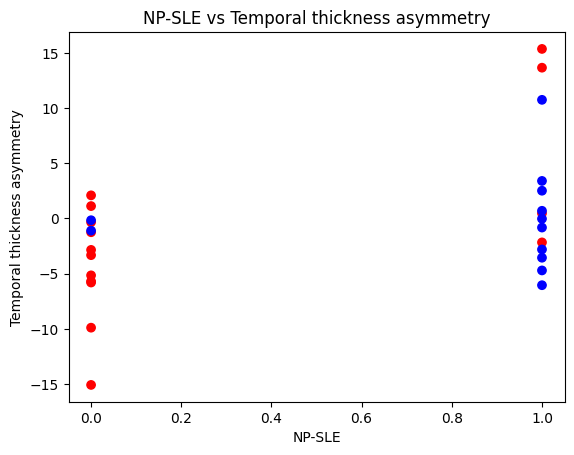

<Figure size 640x480 with 0 Axes>

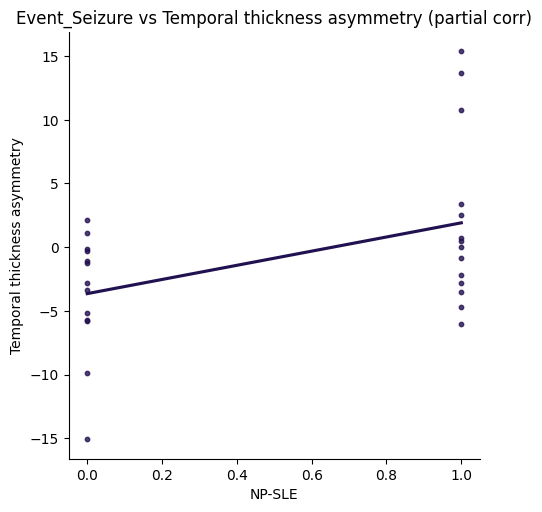

Event_Seizure, ACS, myelitis, CVA vs Temporal thickness asymmetry: r = 0.45, p = 0.02
Event_Seizure, ACS, myelitis, CVA vs Temporal thickness asymmetry (partial corr): r = 0.59, p = 0.00
total_neurocog vs Temporal thickness asymmetry: r = 0.44, p = 0.02
NP-SLE vs Temporal thickness asymmetry (partial corr): r = 0.50, p = 0.02


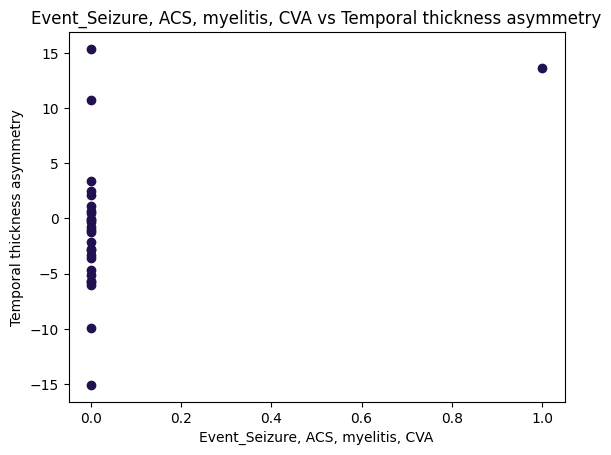

<Figure size 640x480 with 0 Axes>

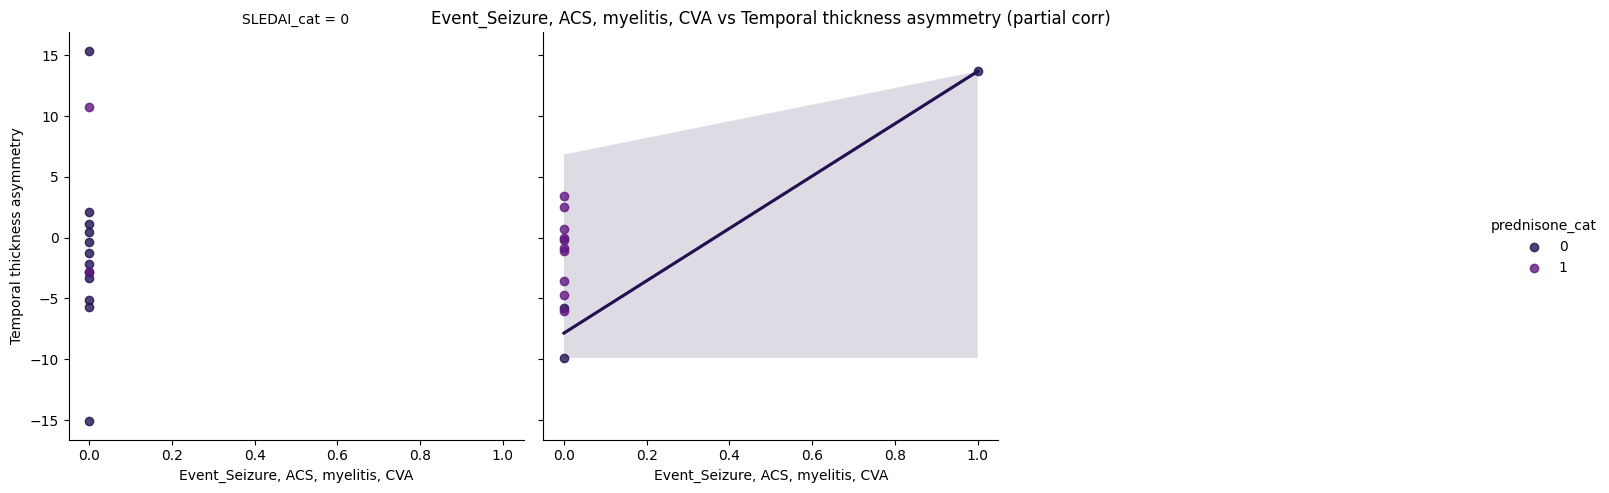

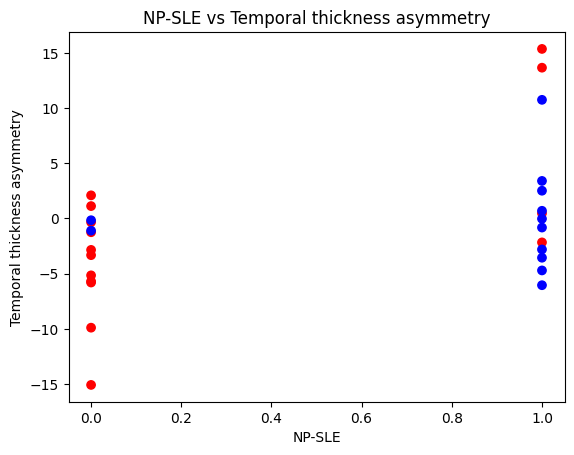

<Figure size 640x480 with 0 Axes>

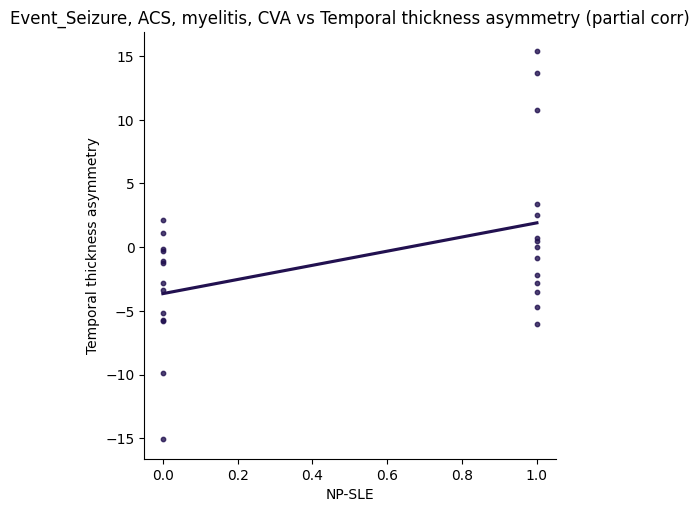

Temporal thickness asymmetry vs Temporal thickness asymmetry: r = 1.00, p = 0.00
total_neurocog vs Temporal thickness asymmetry: r = 0.44, p = 0.02
NP-SLE vs Temporal thickness asymmetry (partial corr): r = 0.50, p = 0.02


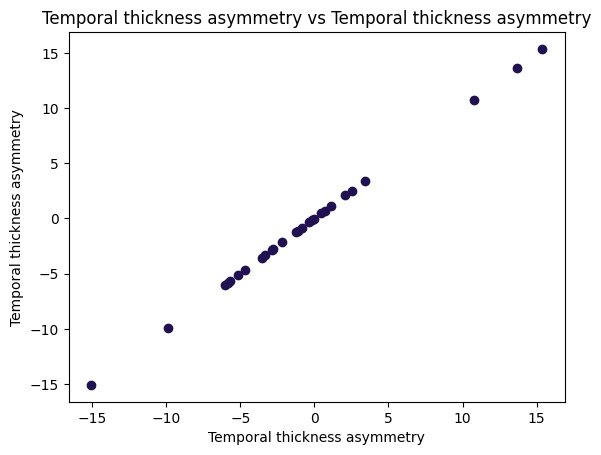

<Figure size 640x480 with 0 Axes>

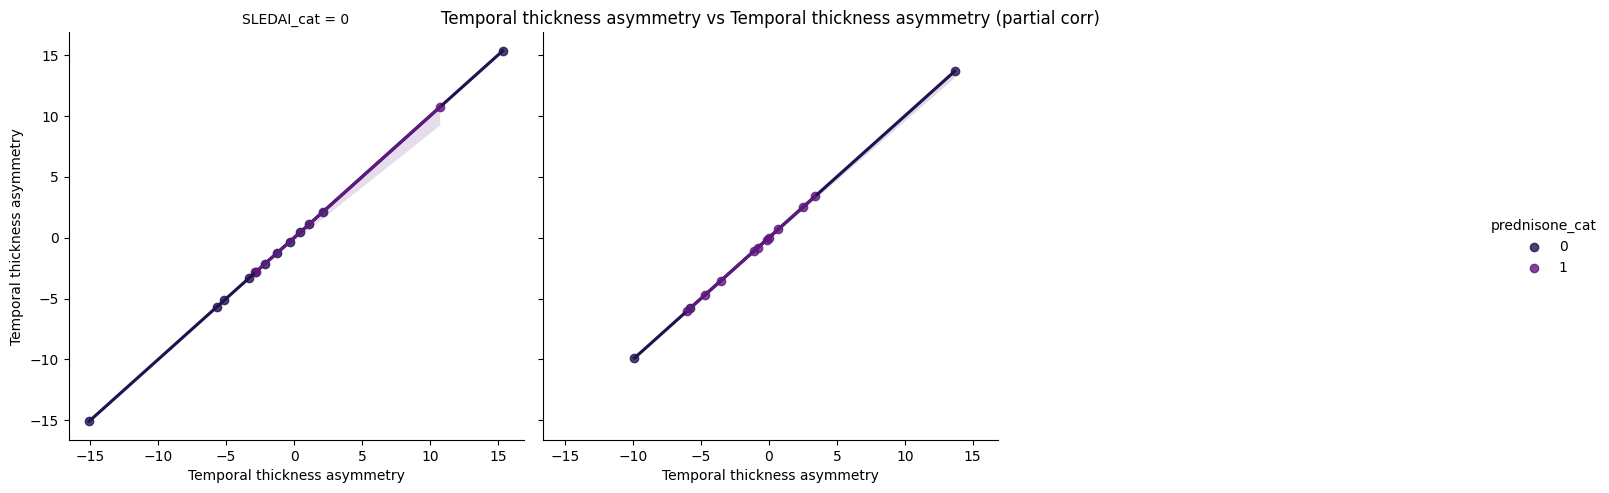

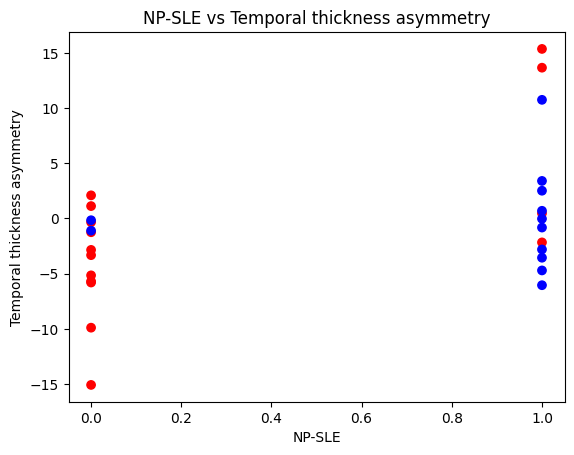

<Figure size 640x480 with 0 Axes>

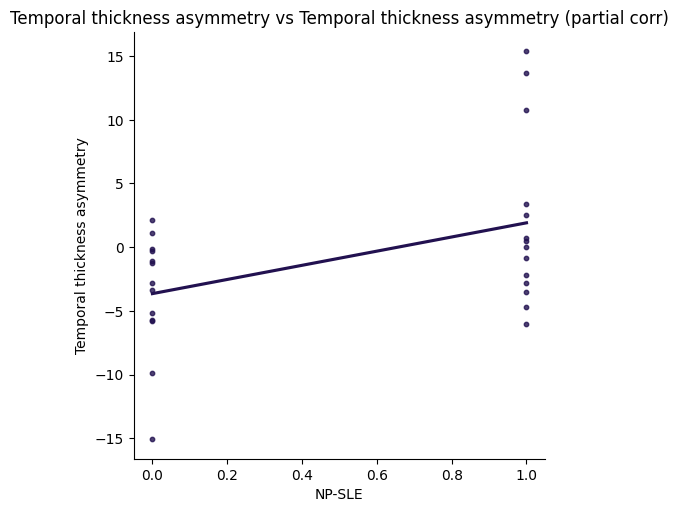

In [33]:
from scipy.stats import pearsonr
import pingouin as pg

df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)
# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Temporal thickness asymmetry'
prednisone = 'prednisone_cat'
sledai = 'SLEDAI_cat'

# Compute the correlations
for col in neurocog_cols + [lesion_load]:
    # Compute the Pearson correlation between each neurocognitive domain and lesion load
    r, p = pearsonr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and SLEDAI
    if col != lesion_load:
        partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, sledai, age, sex])
        r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
        print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
        assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

    # Compute the Pearson correlation between total neurocognitive score and lesion load
    r_total, p_total = pearsonr(df['NP-SLE'], df[lesion_load])
    print(f'total_neurocog vs {lesion_load}: r = {r_total:.2f}, p = {p_total:.2f}')

    # Compute the partial correlation adjusting for prednisone and SLEDAI
    total_partial_results = pg.partial_corr(data=df, x='NP-SLE', y=lesion_load, covar=[prednisone, sledai, age, sex])
    r_total_partial, p_total_partial = total_partial_results['r'][0], total_partial_results['p-val'][0]
    print(f'NP-SLE vs {lesion_load} (partial corr): r = {r_total_partial:.2f}, p = {p_total_partial:.2f}')


    # Plot the scatter plot
    plt.figure()
    plt.scatter(df[col], df[lesion_load])
    plt.xlabel(col)
    plt.ylabel(lesion_load)
    plt.title(f'{col} vs {lesion_load}')
    plt.show()

    # Plot the partial scatter plot
    plt.figure()
    sns.lmplot(data=df, x=col, y=lesion_load, hue=prednisone, col=sledai, col_wrap=3)
    plt.title(f'{col} vs {lesion_load} (partial corr)')
    plt.show()
    
    colors = ['red' if p == 0 else 'blue' for p in df[prednisone]]
    # Plot the scatter plot of total neurocognitive score vs lesion load
    plt.figure()
    plt.scatter(df['NP-SLE'], df[lesion_load], c=colors)
    plt.xlabel('NP-SLE')
    plt.ylabel(lesion_load)
    plt.title(f'NP-SLE vs {lesion_load}')
    plt.show()

    # Plot the partial scatter plot of total neurocognitive score vs lesion load
    plt.figure()
    sns.lmplot(data=df, x='NP-SLE', y=lesion_load, ci=None, scatter_kws={"s": 10})
    plt.title(f'{col} vs {lesion_load} (partial corr)')
    plt.show()

Event_CVA vs TMP thickness asymmetry: r = 0.51, p = 0.01
Event_CVA vs TMP thickness asymmetry (partial corr): r = 0.58, p = 0.00
total_neurocog vs TMP thickness asymmetry: r = 0.43, p = 0.03
NP-SLE vs TMP thickness asymmetry (partial corr): r = 0.44, p = 0.03


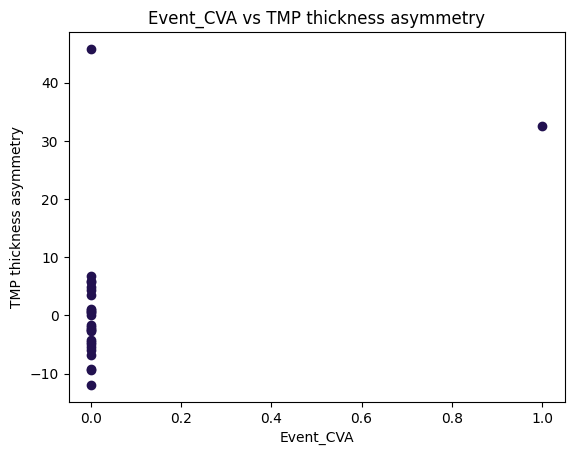

<Figure size 640x480 with 0 Axes>

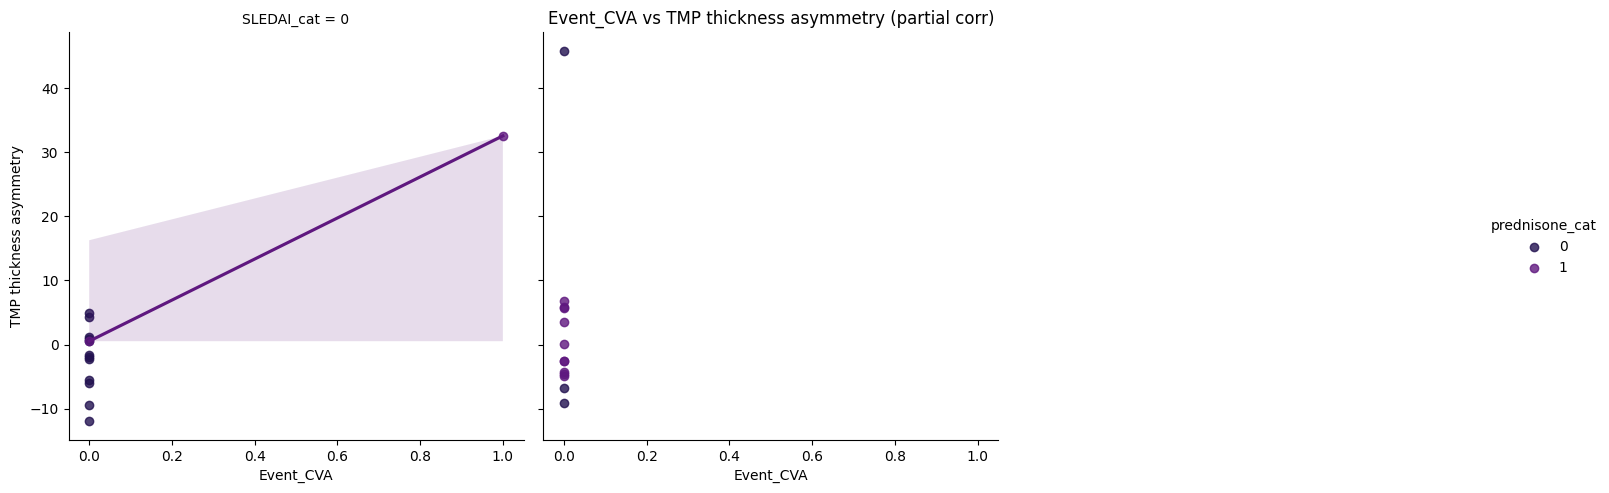

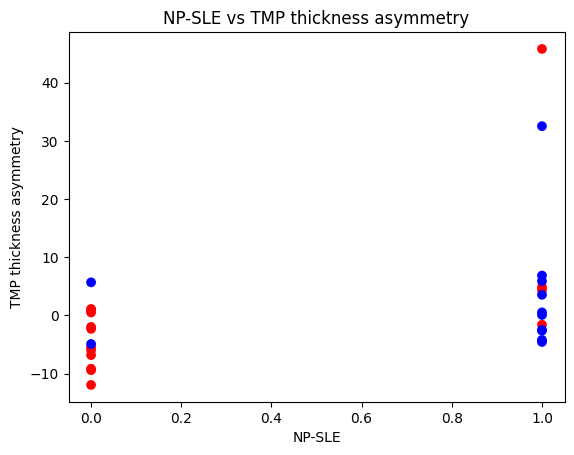

<Figure size 640x480 with 0 Axes>

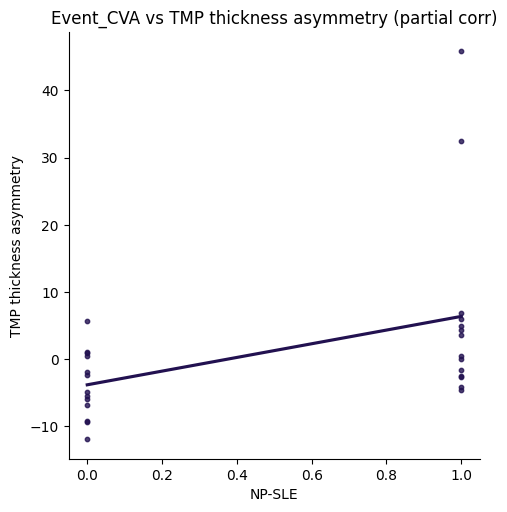

Event_Mood abnormalities (depressive) vs TMP thickness asymmetry: r = 0.05, p = 0.82
Event_Mood abnormalities (depressive) vs TMP thickness asymmetry (partial corr): r = -0.02, p = 0.92
total_neurocog vs TMP thickness asymmetry: r = 0.43, p = 0.03
NP-SLE vs TMP thickness asymmetry (partial corr): r = 0.44, p = 0.03


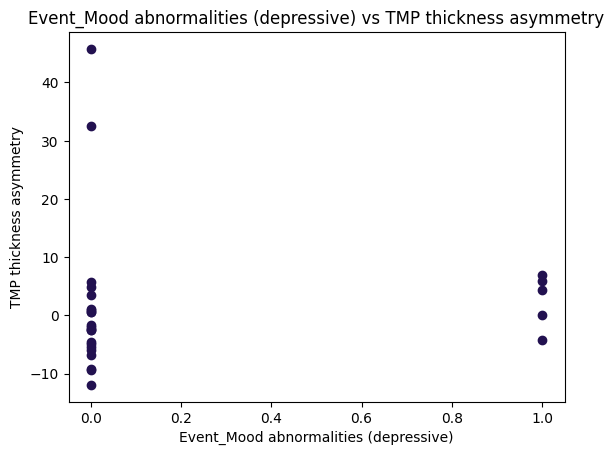

<Figure size 640x480 with 0 Axes>

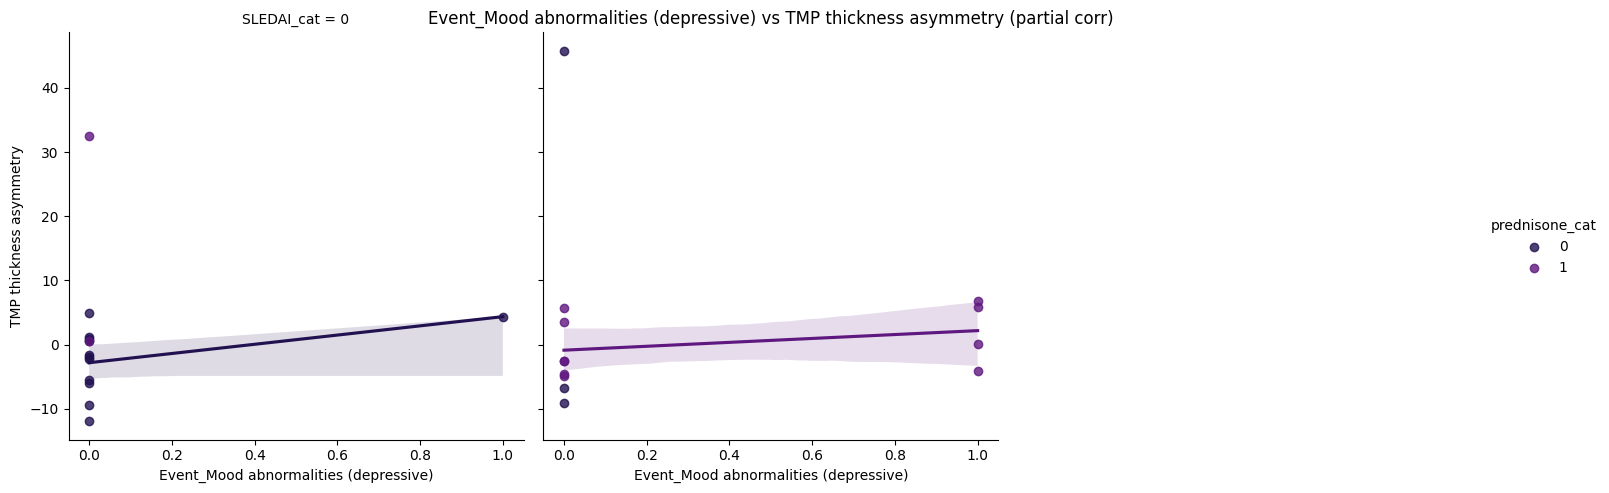

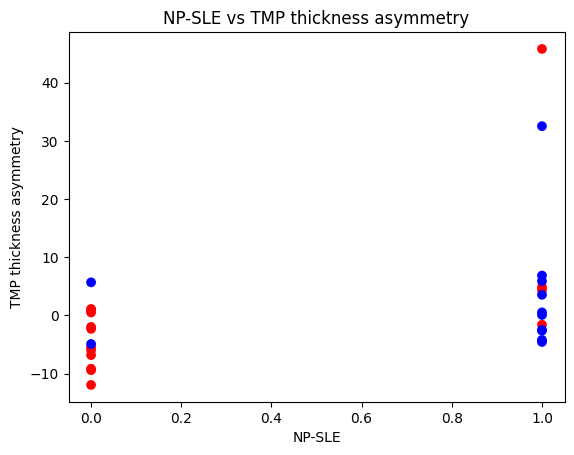

<Figure size 640x480 with 0 Axes>

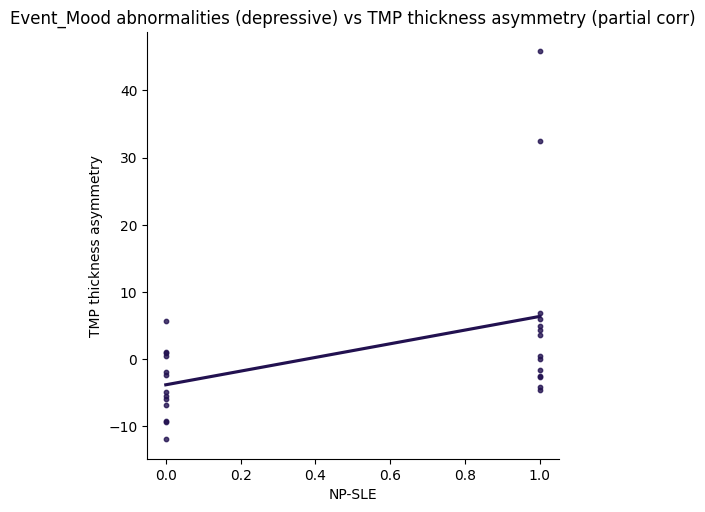

Event_Mood abnormalities (mixed) vs TMP thickness asymmetry: r = -0.07, p = 0.75
Event_Mood abnormalities (mixed) vs TMP thickness asymmetry (partial corr): r = -0.10, p = 0.64
total_neurocog vs TMP thickness asymmetry: r = 0.43, p = 0.03
NP-SLE vs TMP thickness asymmetry (partial corr): r = 0.44, p = 0.03


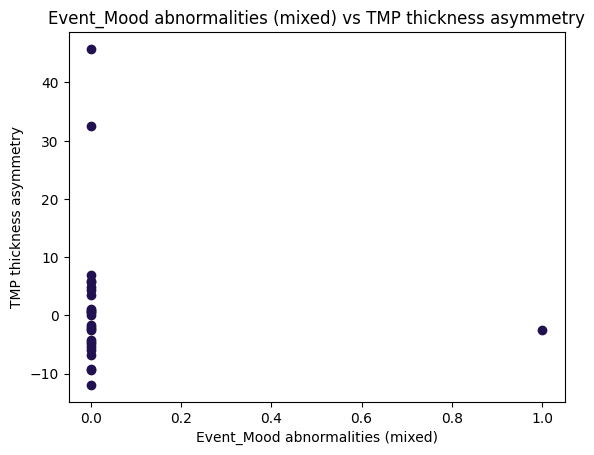

<Figure size 640x480 with 0 Axes>

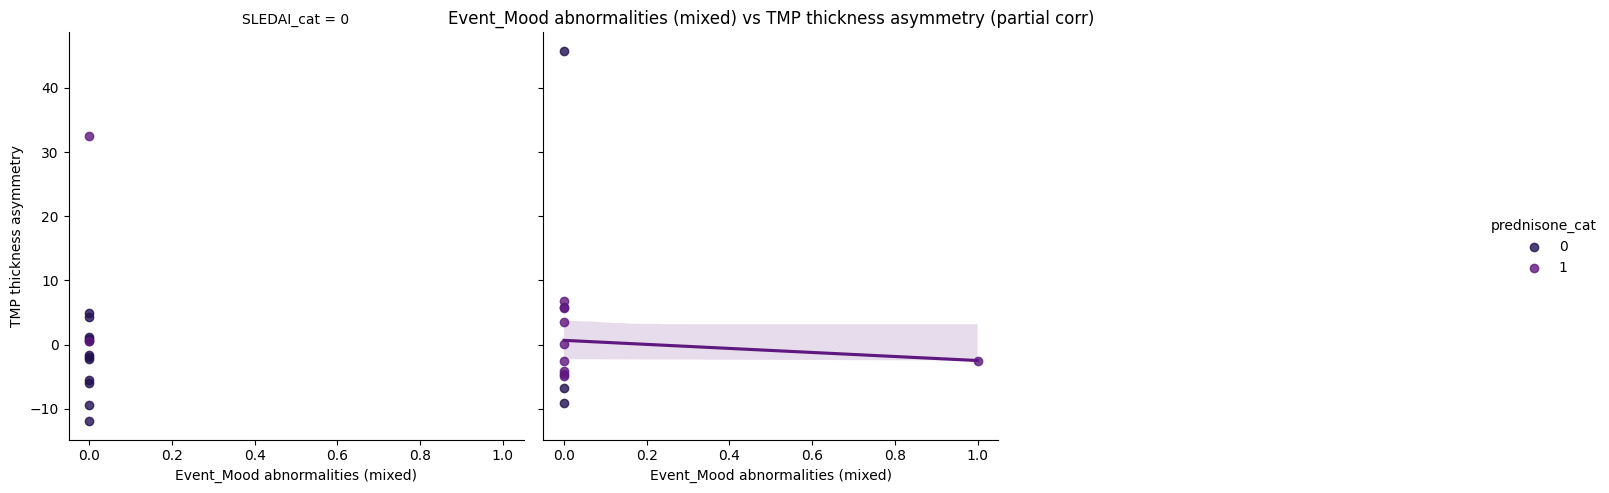

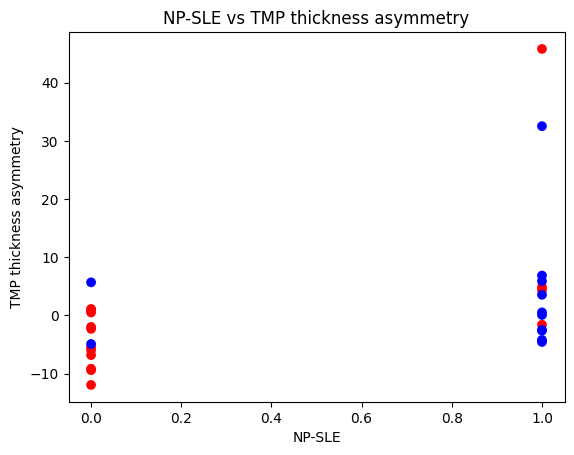

<Figure size 640x480 with 0 Axes>

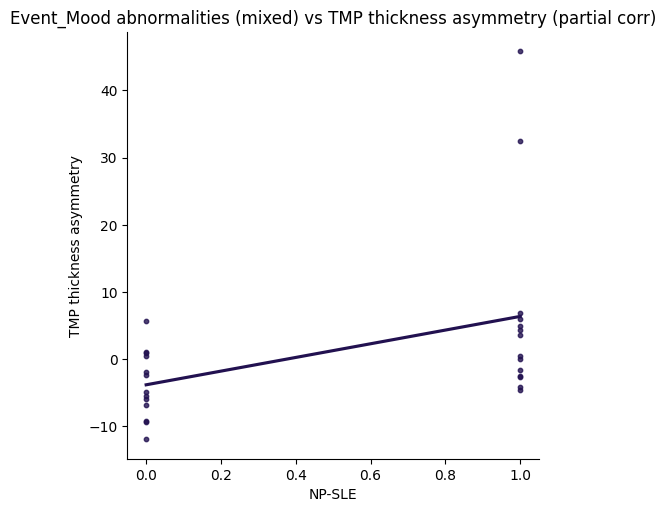

Event_Movement Disorder vs TMP thickness asymmetry: r = -0.10, p = 0.62
Event_Movement Disorder vs TMP thickness asymmetry (partial corr): r = -0.14, p = 0.52
total_neurocog vs TMP thickness asymmetry: r = 0.43, p = 0.03
NP-SLE vs TMP thickness asymmetry (partial corr): r = 0.44, p = 0.03


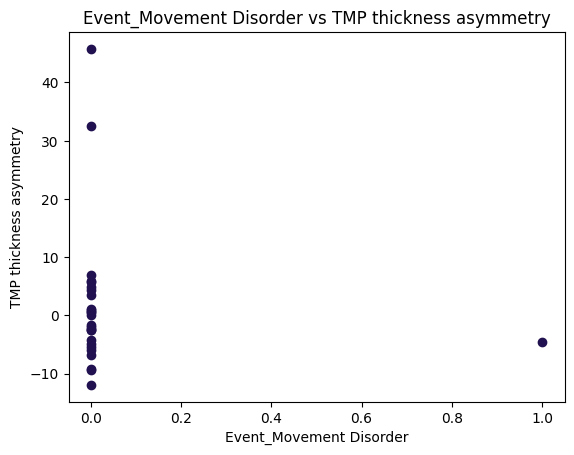

<Figure size 640x480 with 0 Axes>

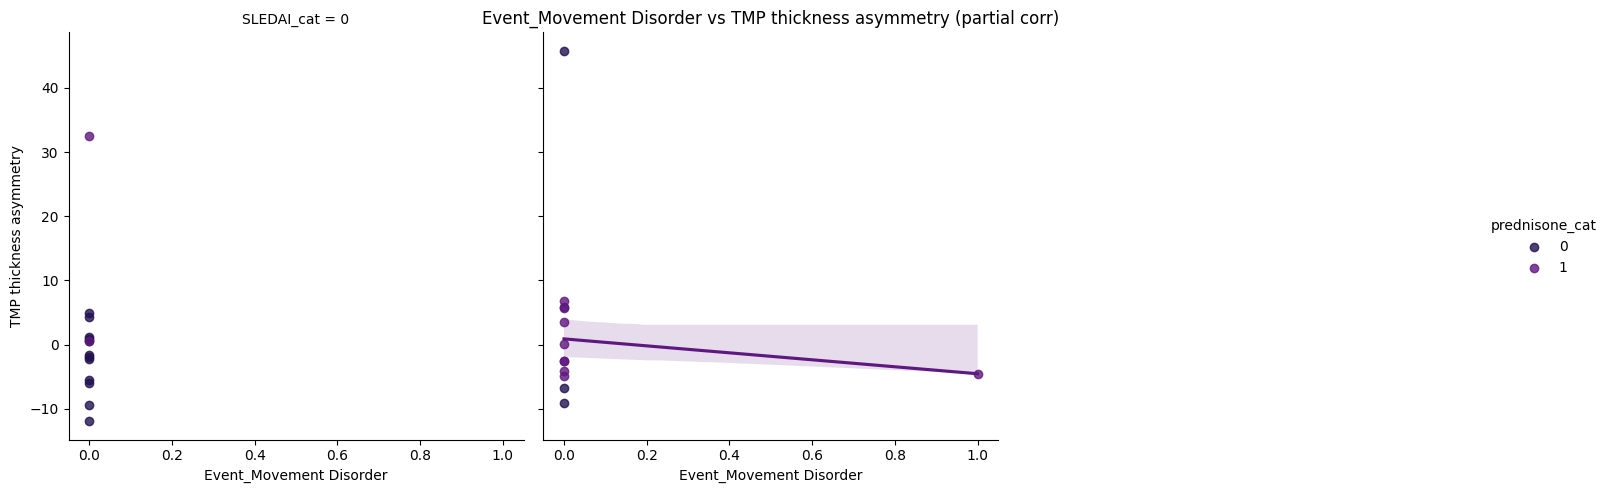

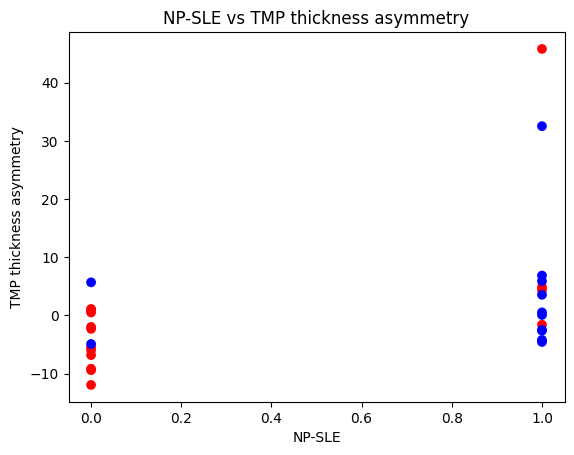

<Figure size 640x480 with 0 Axes>

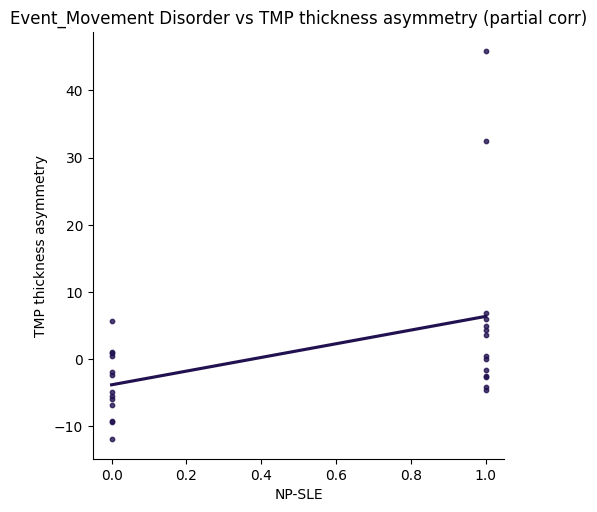

Event_Psychosis vs TMP thickness asymmetry: r = -0.06, p = 0.77
Event_Psychosis vs TMP thickness asymmetry (partial corr): r = -0.11, p = 0.61
total_neurocog vs TMP thickness asymmetry: r = 0.43, p = 0.03
NP-SLE vs TMP thickness asymmetry (partial corr): r = 0.44, p = 0.03


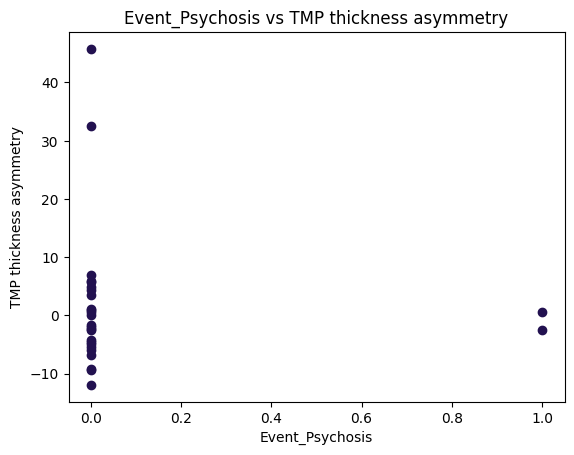

<Figure size 640x480 with 0 Axes>

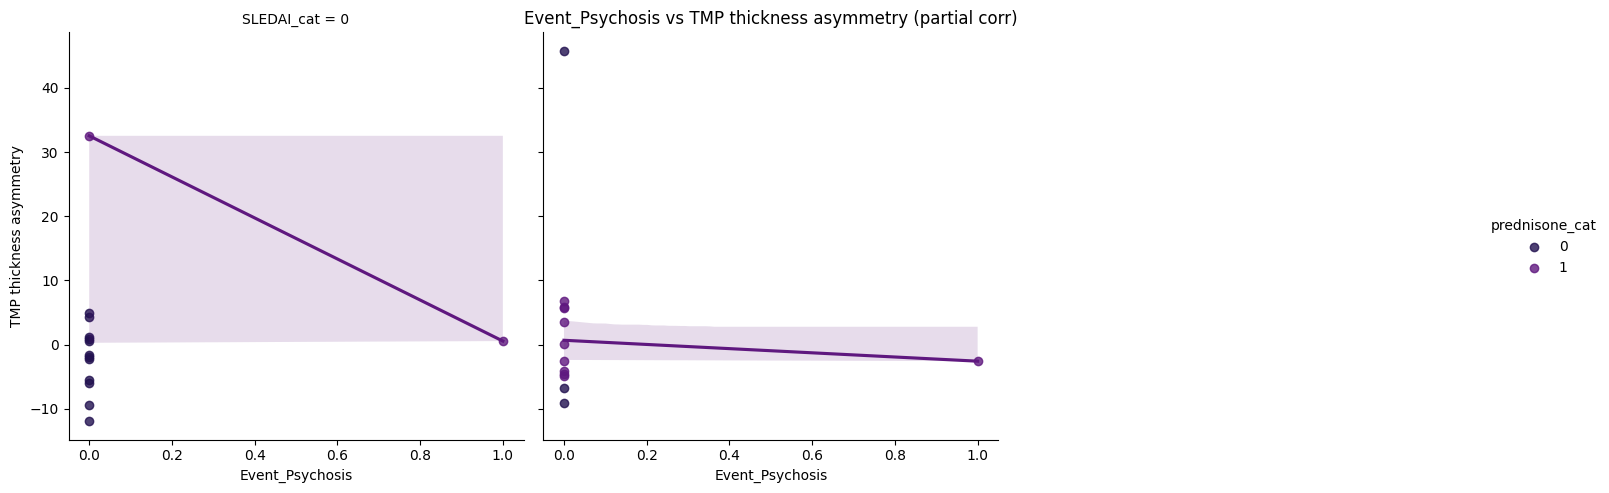

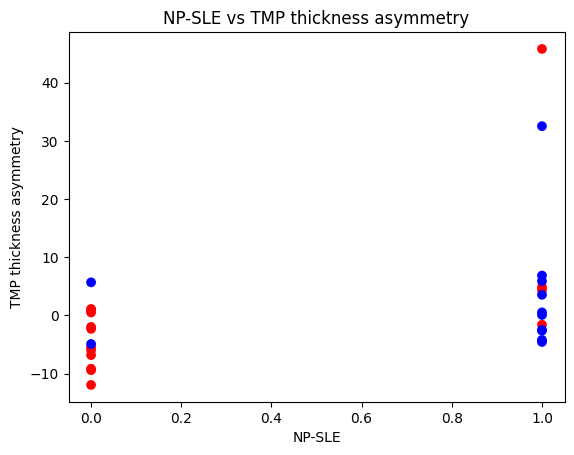

<Figure size 640x480 with 0 Axes>

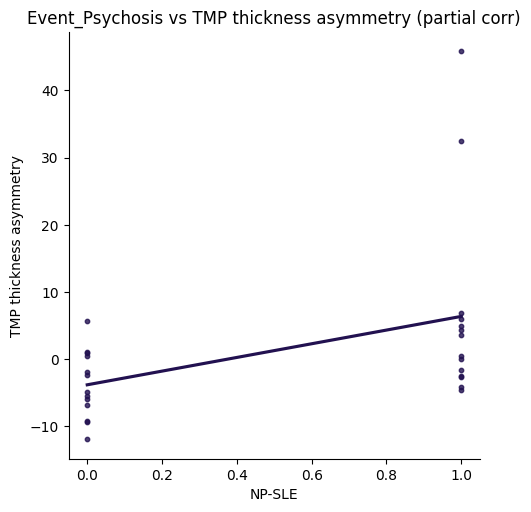

Event_Seizure vs TMP thickness asymmetry: r = 0.02, p = 0.90
Event_Seizure vs TMP thickness asymmetry (partial corr): r = 0.07, p = 0.75
total_neurocog vs TMP thickness asymmetry: r = 0.43, p = 0.03
NP-SLE vs TMP thickness asymmetry (partial corr): r = 0.44, p = 0.03


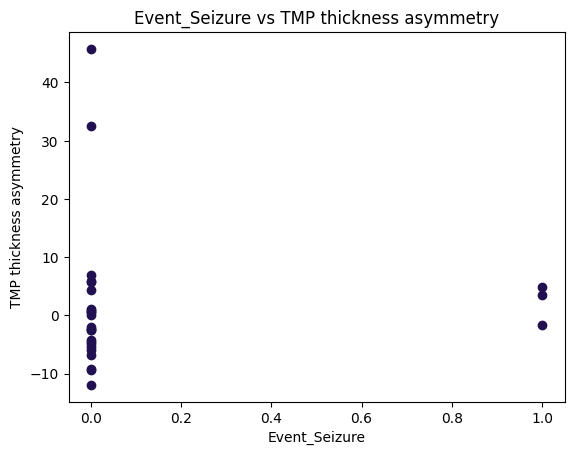

<Figure size 640x480 with 0 Axes>

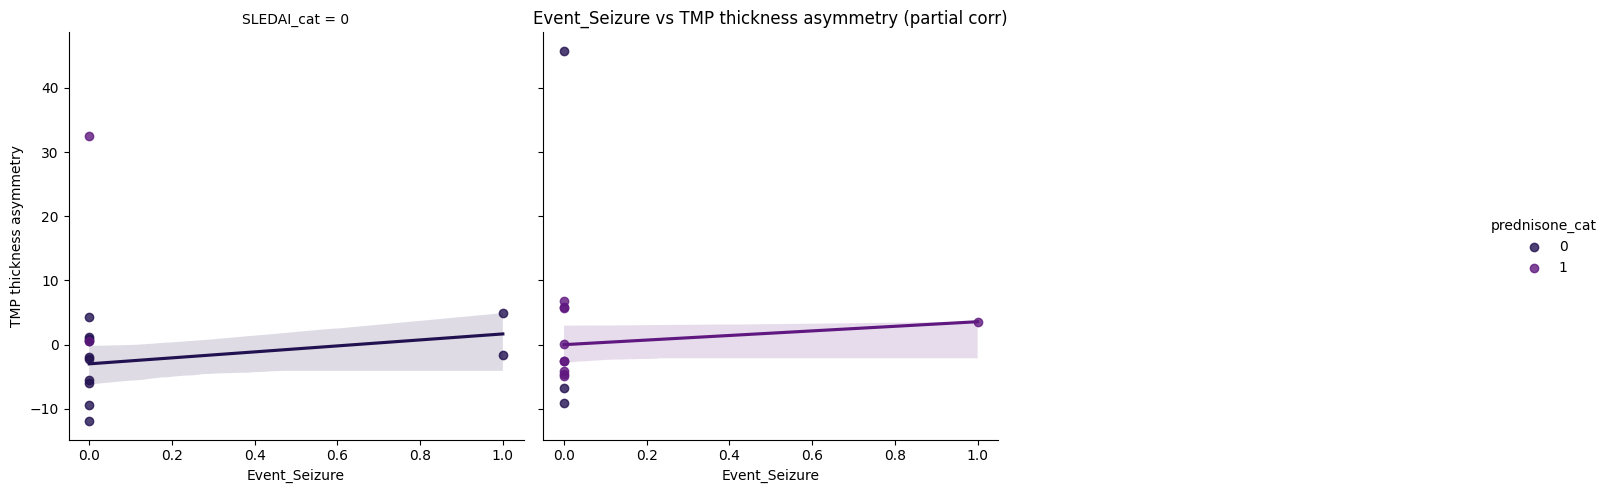

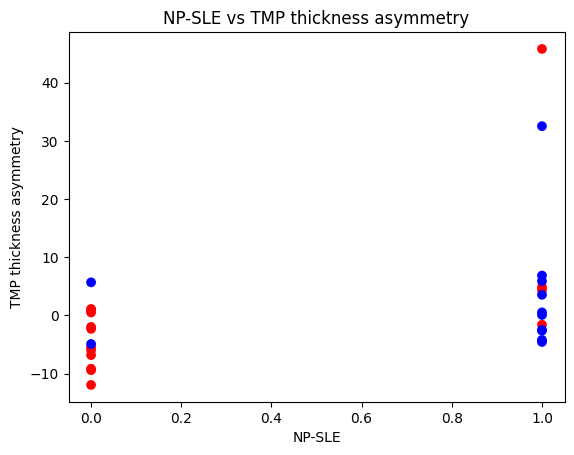

<Figure size 640x480 with 0 Axes>

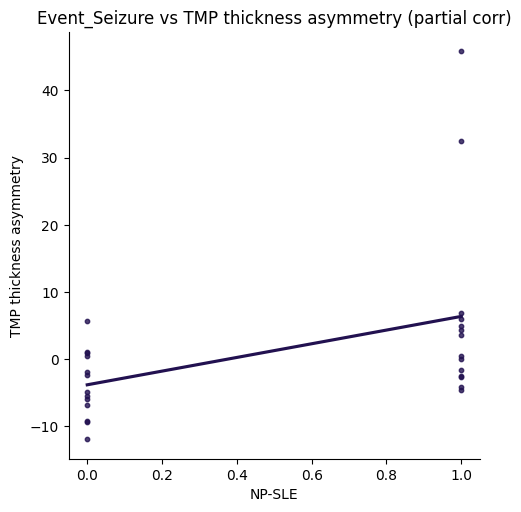

Event_Seizure, ACS, myelitis, CVA vs TMP thickness asymmetry: r = 0.73, p = 0.00
Event_Seizure, ACS, myelitis, CVA vs TMP thickness asymmetry (partial corr): r = 0.84, p = 0.00
total_neurocog vs TMP thickness asymmetry: r = 0.43, p = 0.03
NP-SLE vs TMP thickness asymmetry (partial corr): r = 0.44, p = 0.03


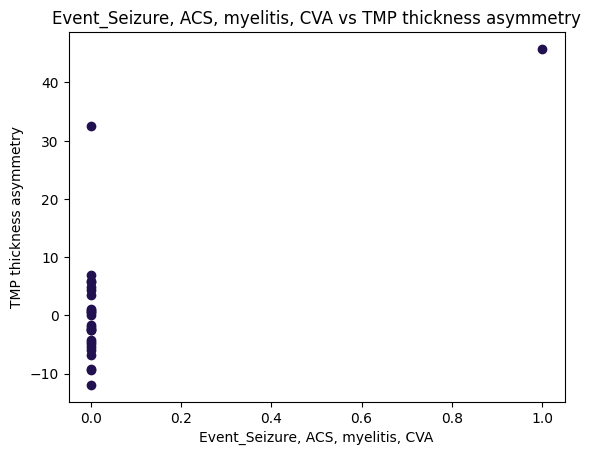

<Figure size 640x480 with 0 Axes>

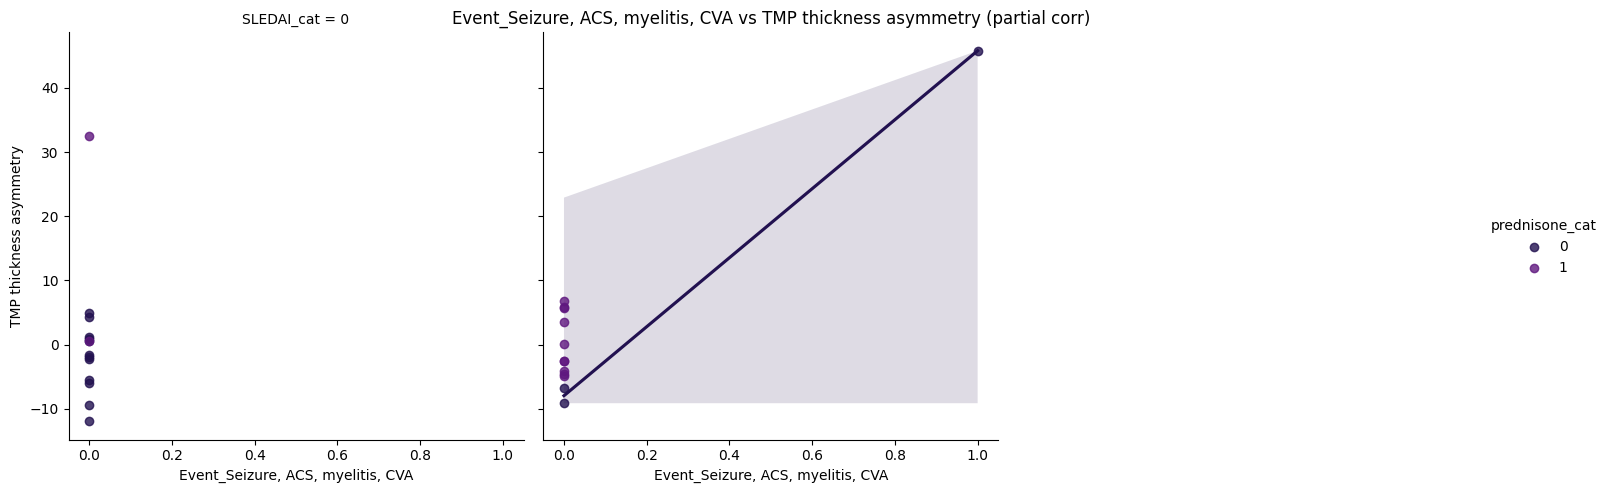

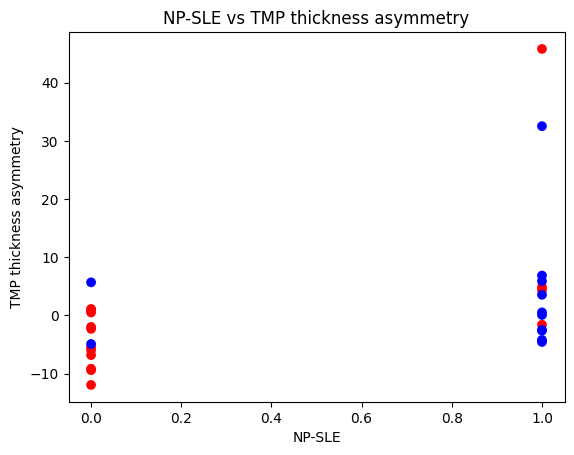

<Figure size 640x480 with 0 Axes>

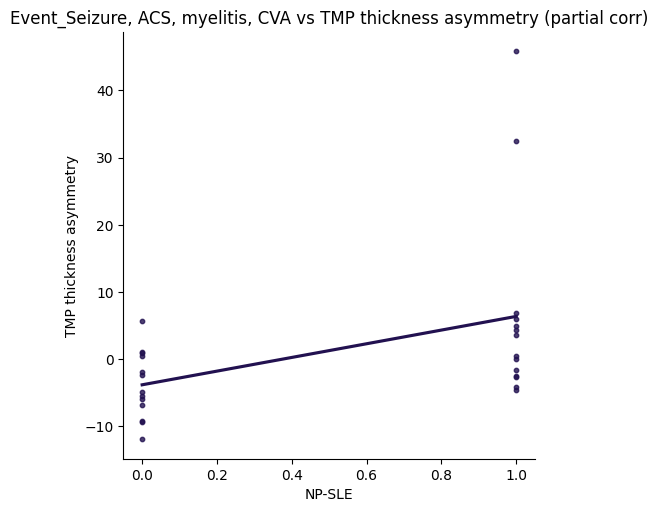

TMP thickness asymmetry vs TMP thickness asymmetry: r = 1.00, p = 0.00
total_neurocog vs TMP thickness asymmetry: r = 0.43, p = 0.03
NP-SLE vs TMP thickness asymmetry (partial corr): r = 0.44, p = 0.03


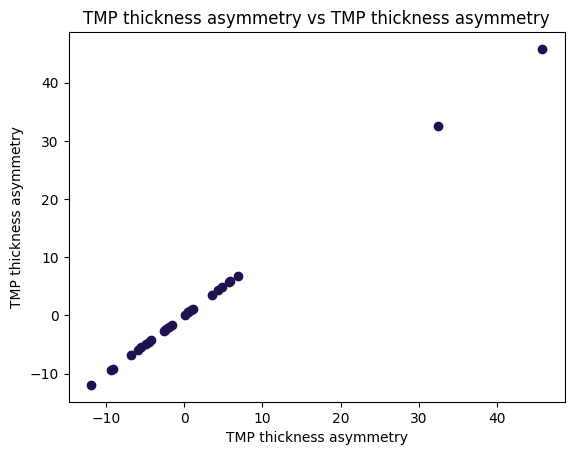

<Figure size 640x480 with 0 Axes>

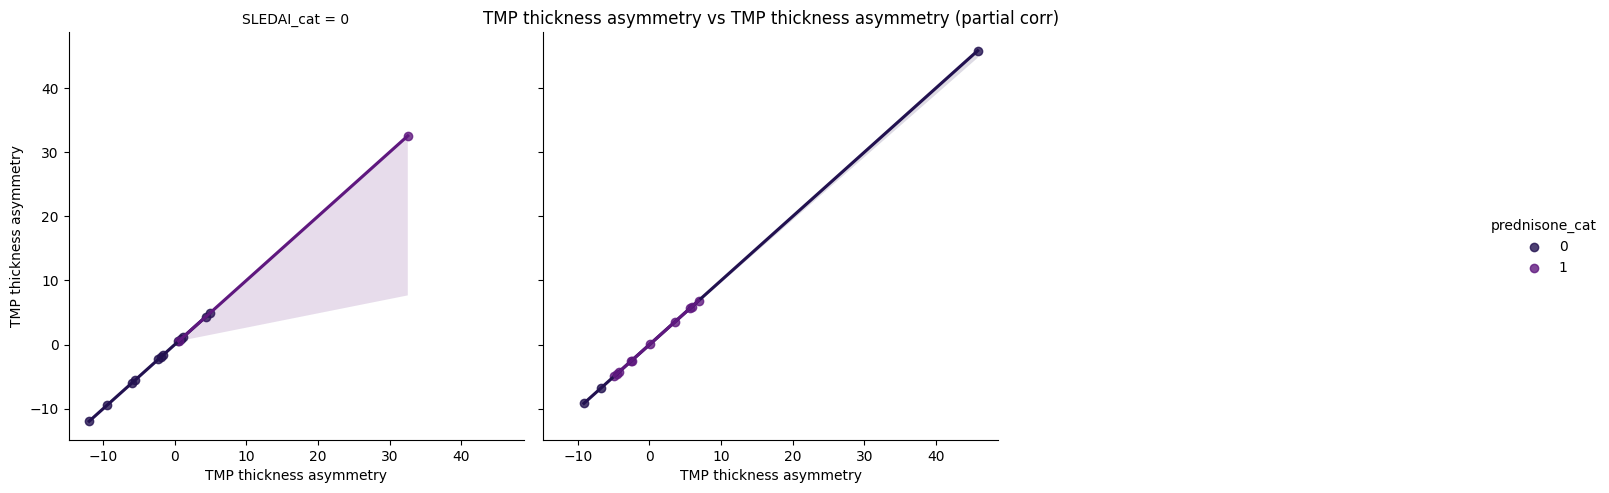

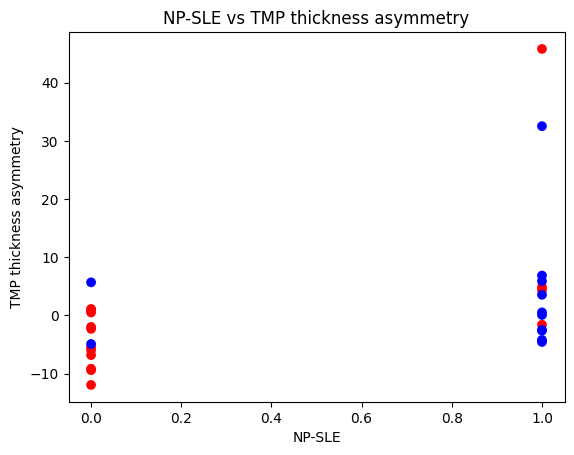

<Figure size 640x480 with 0 Axes>

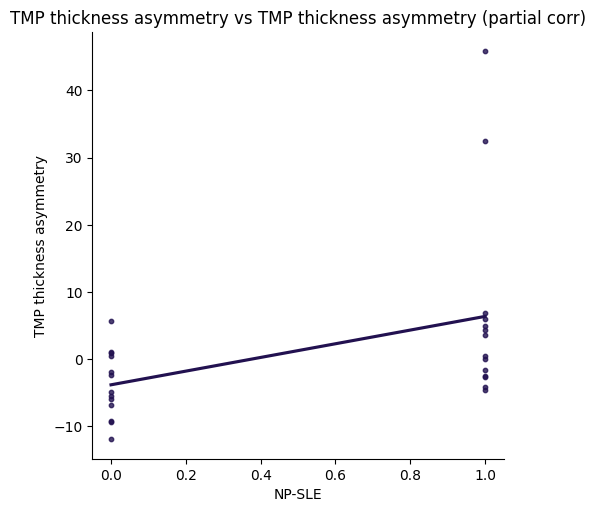

In [34]:
from scipy.stats import pearsonr
import pingouin as pg

df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)
# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'TMP thickness asymmetry'
prednisone = 'prednisone_cat'
sledai = 'SLEDAI_cat'

# Compute the correlations
for col in neurocog_cols + [lesion_load]:
    # Compute the Pearson correlation between each neurocognitive domain and lesion load
    r, p = pearsonr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and SLEDAI
    if col != lesion_load:
        partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, sledai, age, sex])
        r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
        print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
        assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

    # Compute the Pearson correlation between total neurocognitive score and lesion load
    r_total, p_total = pearsonr(df['NP-SLE'], df[lesion_load])
    print(f'total_neurocog vs {lesion_load}: r = {r_total:.2f}, p = {p_total:.2f}')

    # Compute the partial correlation adjusting for prednisone and SLEDAI
    total_partial_results = pg.partial_corr(data=df, x='NP-SLE', y=lesion_load, covar=[prednisone, sledai, age, sex])
    r_total_partial, p_total_partial = total_partial_results['r'][0], total_partial_results['p-val'][0]
    print(f'NP-SLE vs {lesion_load} (partial corr): r = {r_total_partial:.2f}, p = {p_total_partial:.2f}')


    # Plot the scatter plot
    plt.figure()
    plt.scatter(df[col], df[lesion_load])
    plt.xlabel(col)
    plt.ylabel(lesion_load)
    plt.title(f'{col} vs {lesion_load}')
    plt.show()

    # Plot the partial scatter plot
    plt.figure()
    sns.lmplot(data=df, x=col, y=lesion_load, hue=prednisone, col=sledai, col_wrap=3)
    plt.title(f'{col} vs {lesion_load} (partial corr)')
    plt.show()
    
    colors = ['red' if p == 0 else 'blue' for p in df[prednisone]]
    # Plot the scatter plot of total neurocognitive score vs lesion load
    plt.figure()
    plt.scatter(df['NP-SLE'], df[lesion_load], c=colors)
    plt.xlabel('NP-SLE')
    plt.ylabel(lesion_load)
    plt.title(f'NP-SLE vs {lesion_load}')
    plt.show()

    # Plot the partial scatter plot of total neurocognitive score vs lesion load
    plt.figure()
    sns.lmplot(data=df, x='NP-SLE', y=lesion_load, ci=None, scatter_kws={"s": 10})
    plt.title(f'{col} vs {lesion_load} (partial corr)')
    plt.show()

Event_CVA vs MTG thickness asymmetry: r = 0.13, p = 0.53
Event_CVA vs MTG thickness asymmetry (partial corr): r = 0.13, p = 0.55
total_neurocog vs MTG thickness asymmetry: r = 0.43, p = 0.03
NP-SLE vs MTG thickness asymmetry (partial corr): r = 0.52, p = 0.01


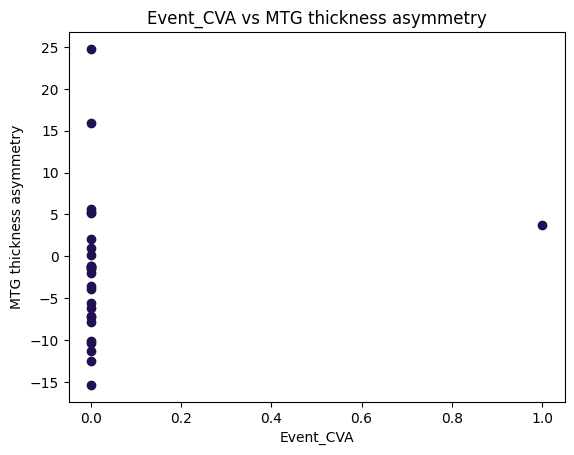

<Figure size 640x480 with 0 Axes>

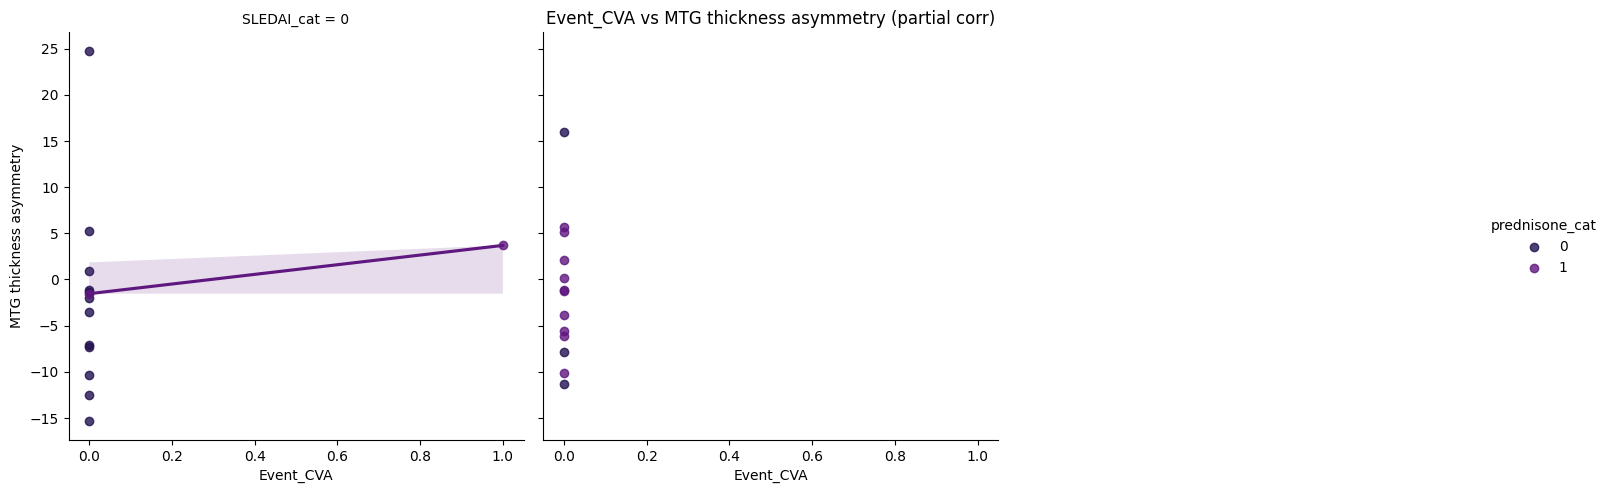

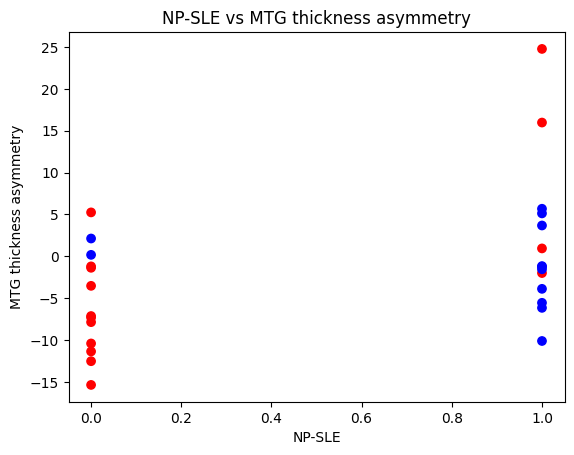

<Figure size 640x480 with 0 Axes>

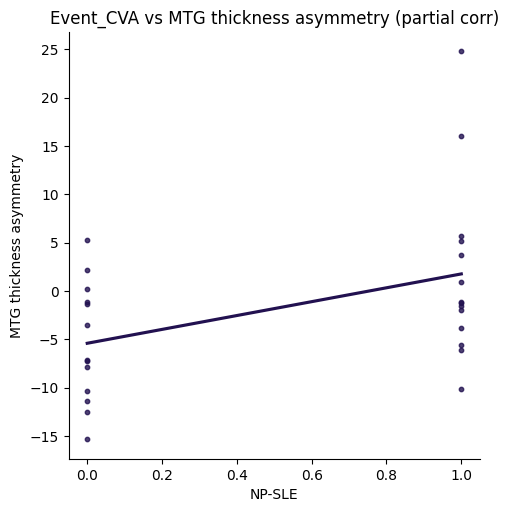

Event_Mood abnormalities (depressive) vs MTG thickness asymmetry: r = 0.05, p = 0.81
Event_Mood abnormalities (depressive) vs MTG thickness asymmetry (partial corr): r = -0.01, p = 0.97
total_neurocog vs MTG thickness asymmetry: r = 0.43, p = 0.03
NP-SLE vs MTG thickness asymmetry (partial corr): r = 0.52, p = 0.01


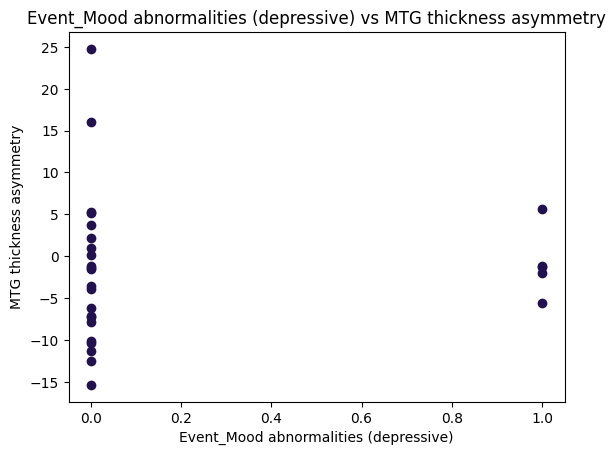

<Figure size 640x480 with 0 Axes>

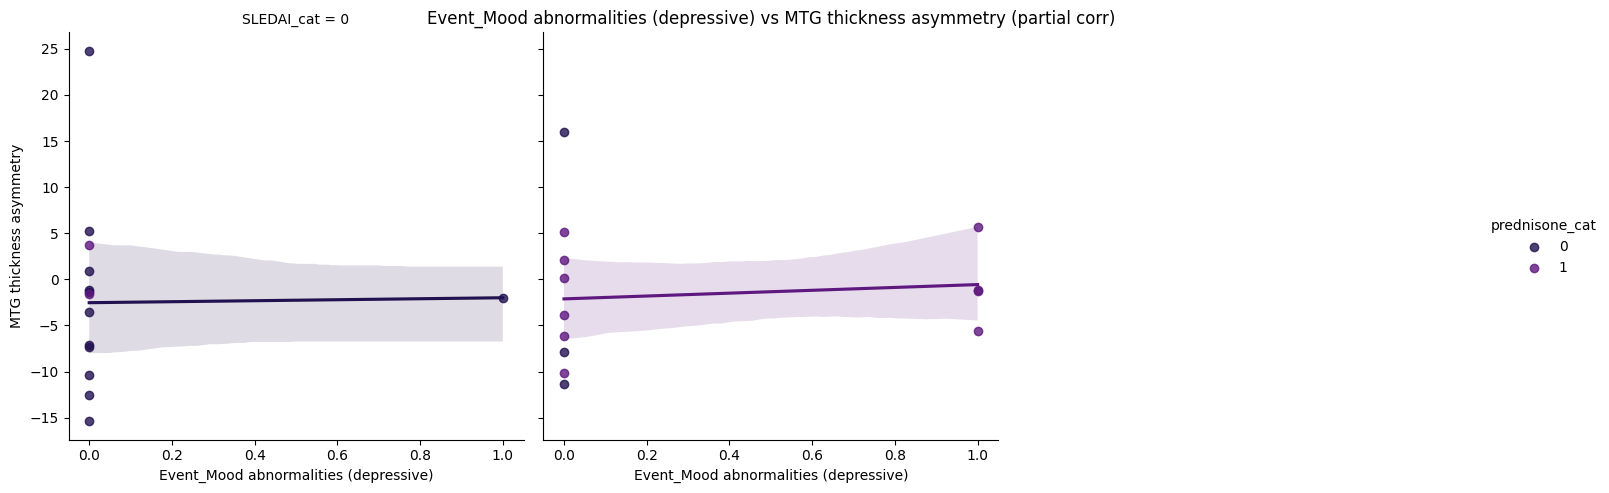

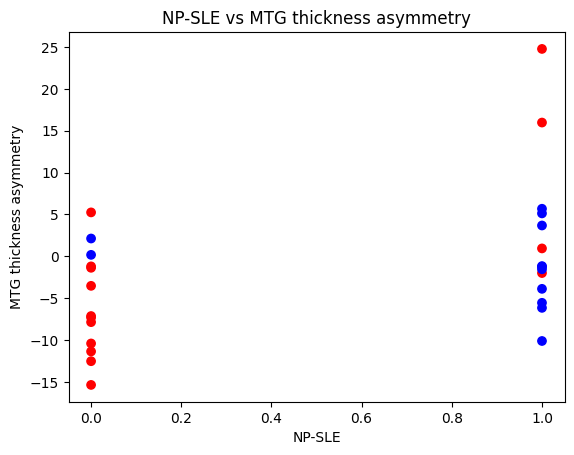

<Figure size 640x480 with 0 Axes>

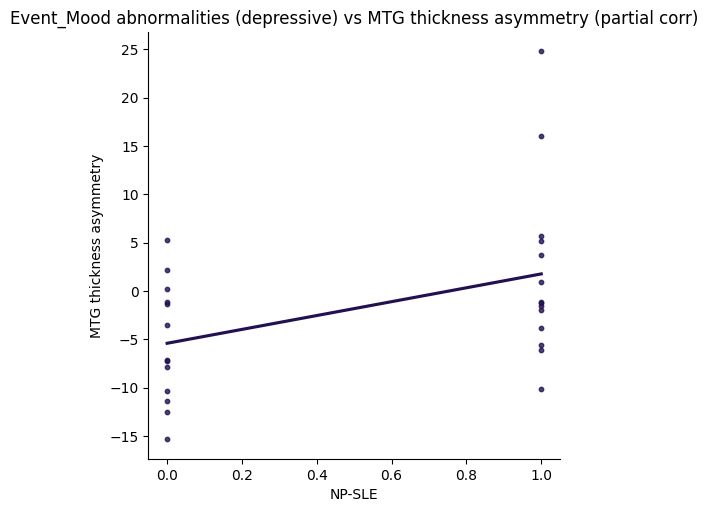

Event_Mood abnormalities (mixed) vs MTG thickness asymmetry: r = -0.10, p = 0.61
Event_Mood abnormalities (mixed) vs MTG thickness asymmetry (partial corr): r = -0.05, p = 0.81
total_neurocog vs MTG thickness asymmetry: r = 0.43, p = 0.03
NP-SLE vs MTG thickness asymmetry (partial corr): r = 0.52, p = 0.01


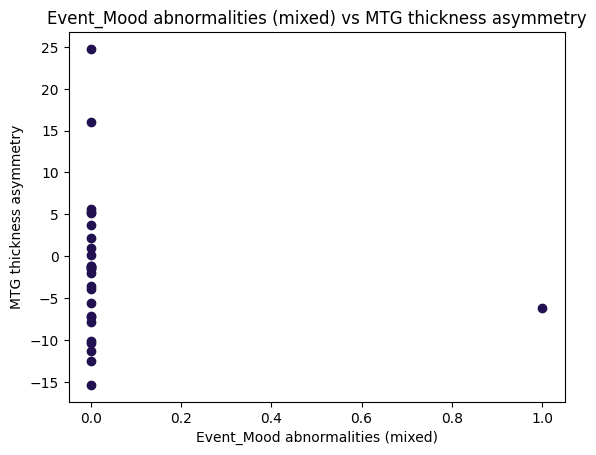

<Figure size 640x480 with 0 Axes>

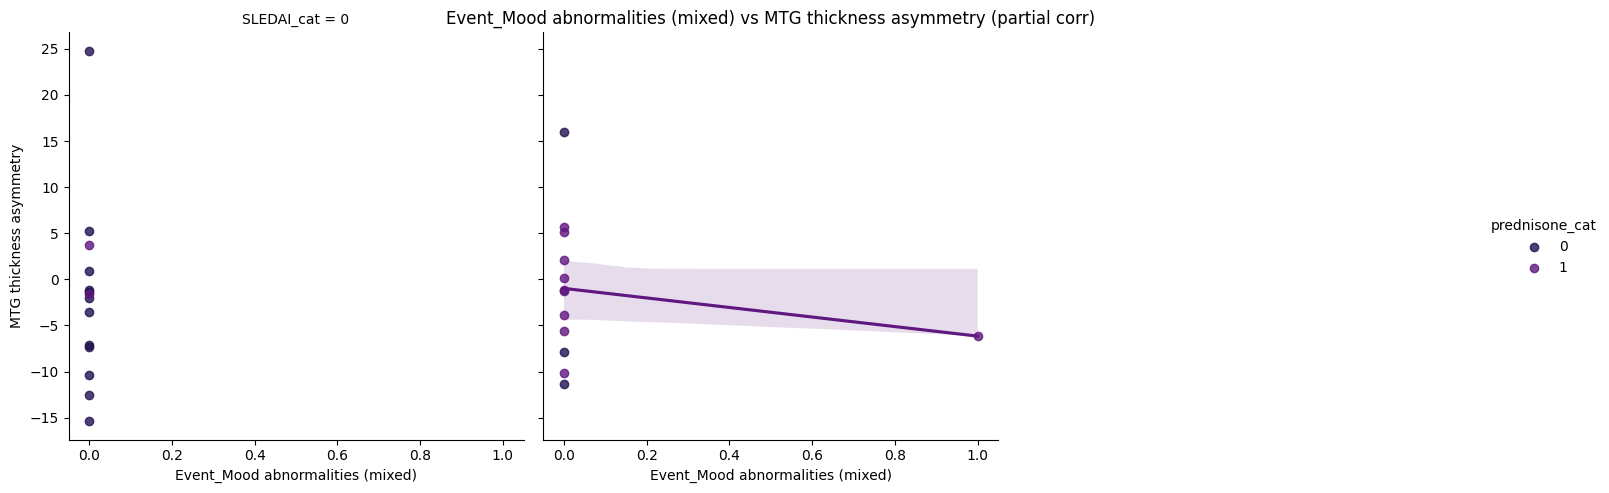

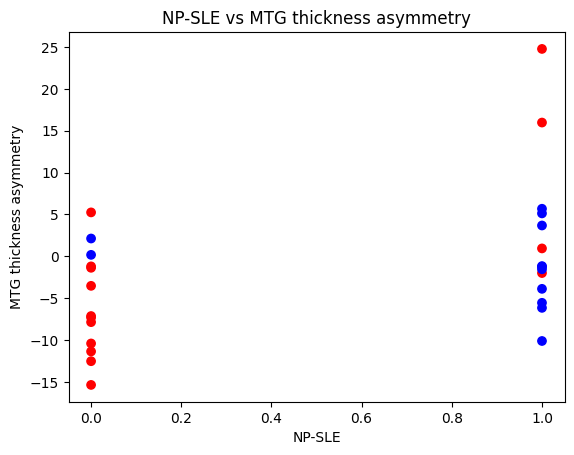

<Figure size 640x480 with 0 Axes>

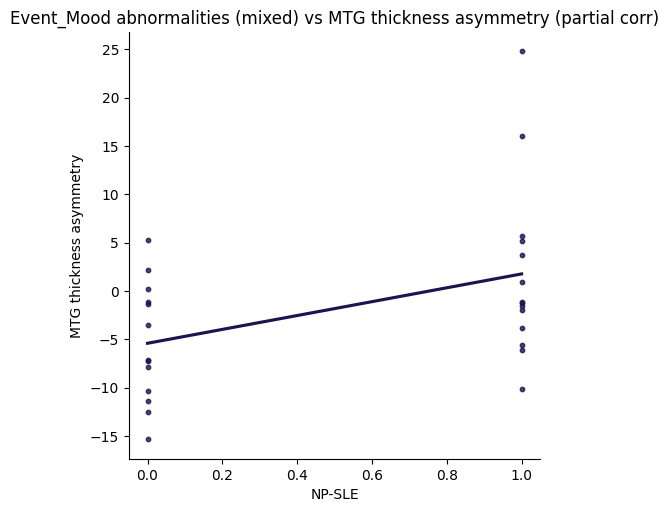

Event_Movement Disorder vs MTG thickness asymmetry: r = 0.16, p = 0.43
Event_Movement Disorder vs MTG thickness asymmetry (partial corr): r = 0.28, p = 0.20
total_neurocog vs MTG thickness asymmetry: r = 0.43, p = 0.03
NP-SLE vs MTG thickness asymmetry (partial corr): r = 0.52, p = 0.01


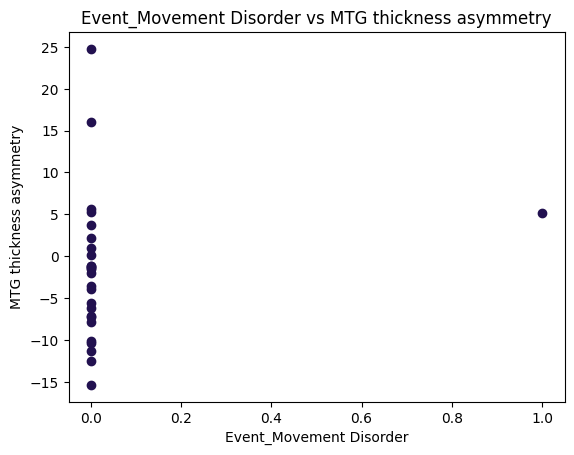

<Figure size 640x480 with 0 Axes>

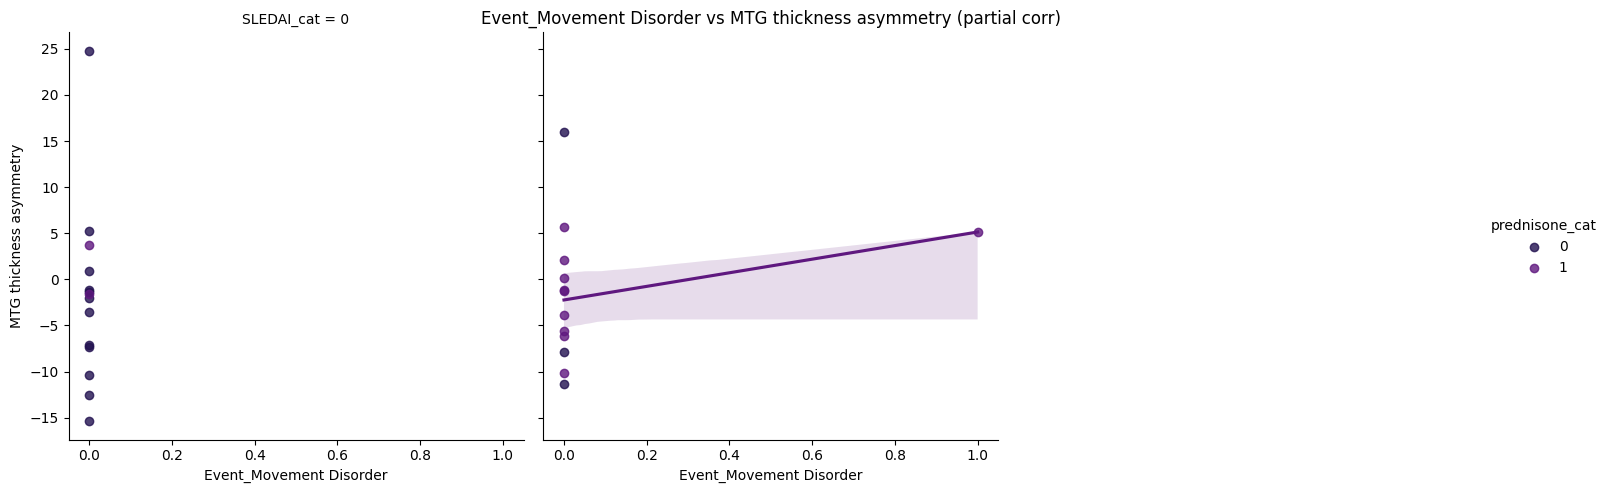

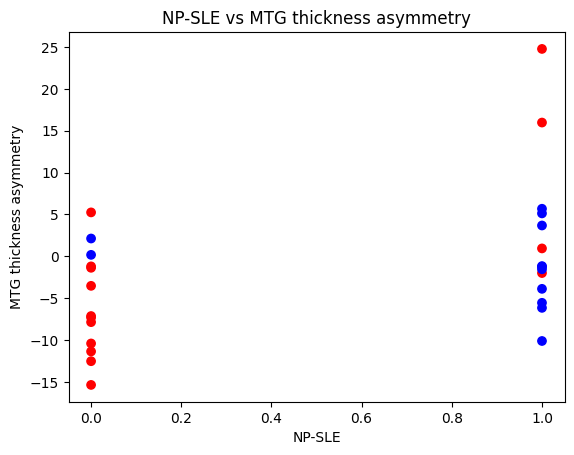

<Figure size 640x480 with 0 Axes>

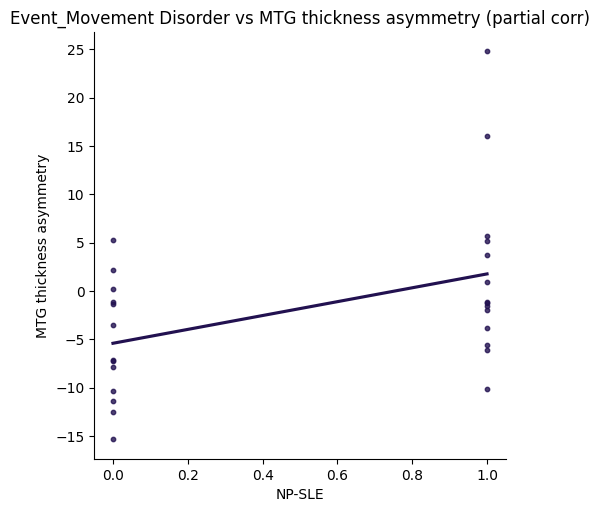

Event_Psychosis vs MTG thickness asymmetry: r = -0.14, p = 0.49
Event_Psychosis vs MTG thickness asymmetry (partial corr): r = -0.24, p = 0.27
total_neurocog vs MTG thickness asymmetry: r = 0.43, p = 0.03
NP-SLE vs MTG thickness asymmetry (partial corr): r = 0.52, p = 0.01


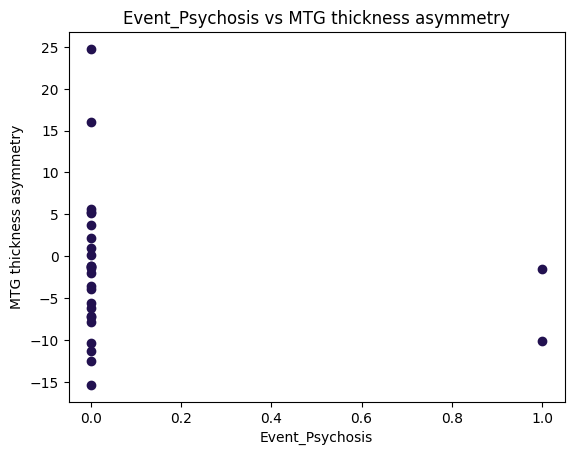

<Figure size 640x480 with 0 Axes>

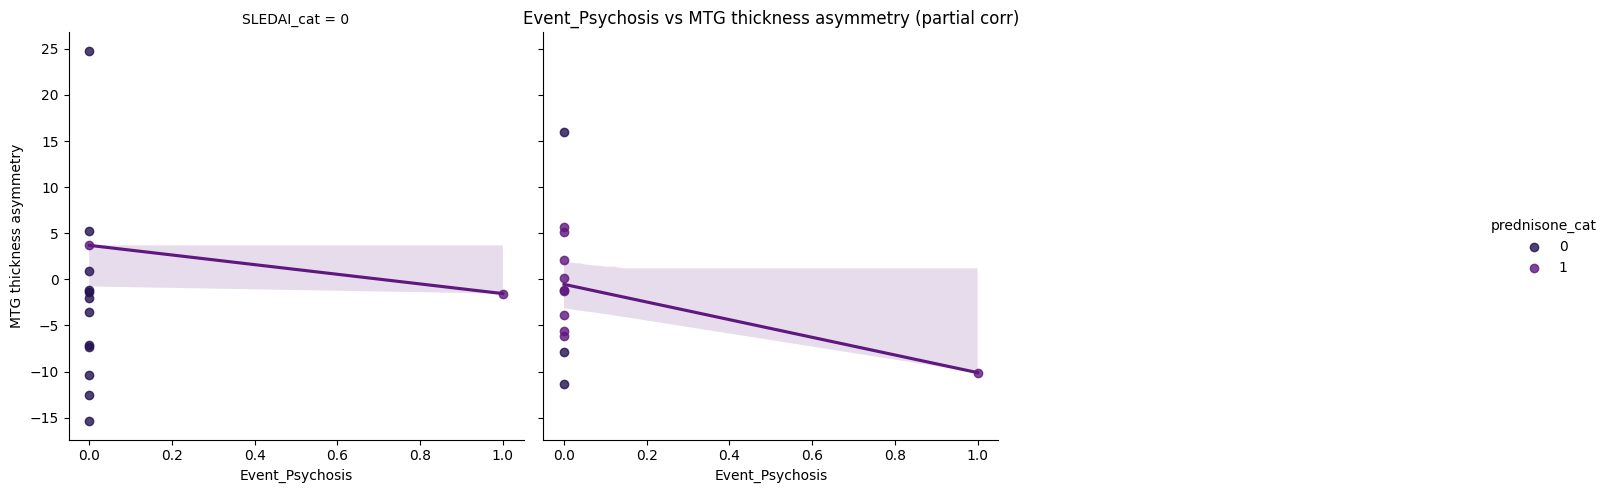

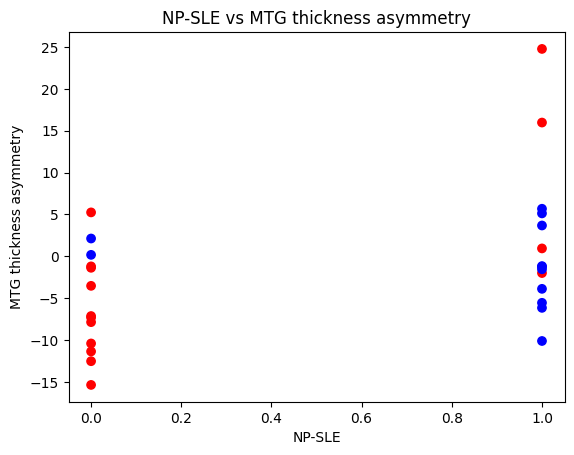

<Figure size 640x480 with 0 Axes>

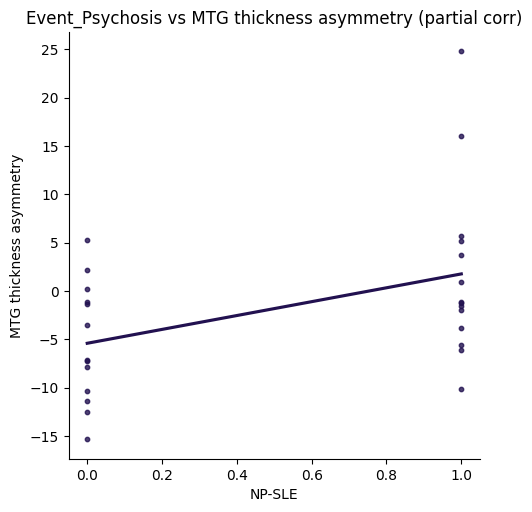

Event_Seizure vs MTG thickness asymmetry: r = 0.38, p = 0.05
Event_Seizure vs MTG thickness asymmetry (partial corr): r = 0.43, p = 0.04
total_neurocog vs MTG thickness asymmetry: r = 0.43, p = 0.03
NP-SLE vs MTG thickness asymmetry (partial corr): r = 0.52, p = 0.01


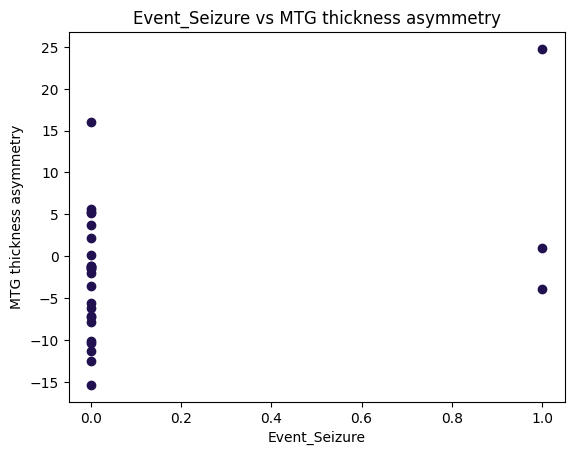

<Figure size 640x480 with 0 Axes>

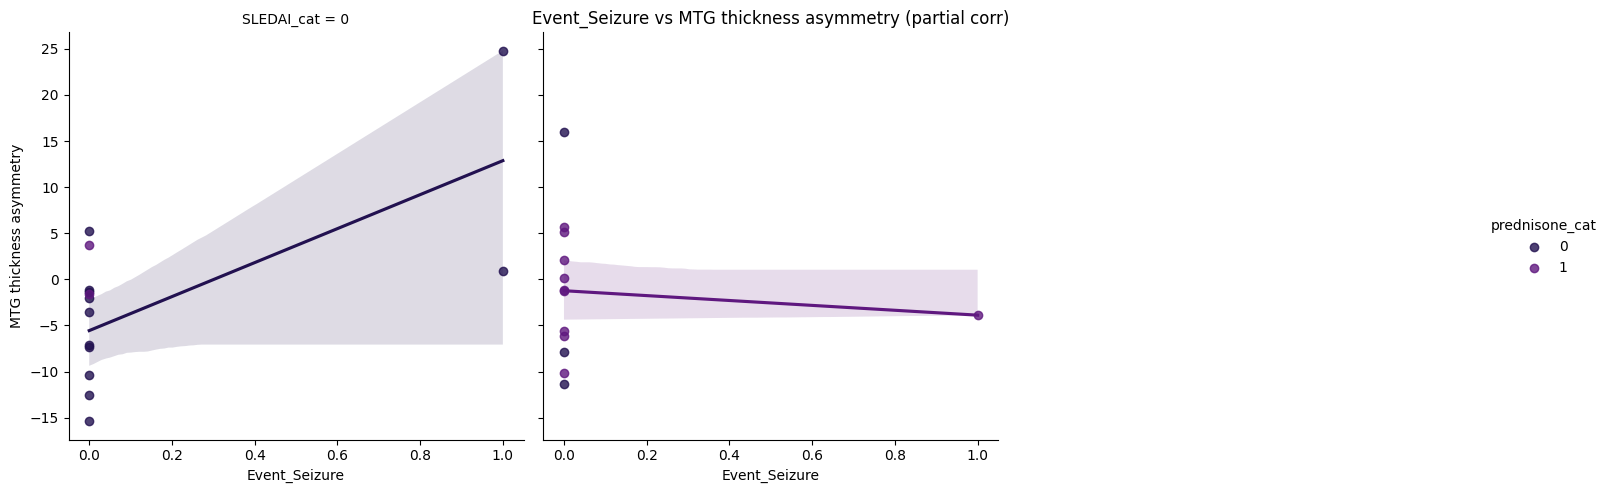

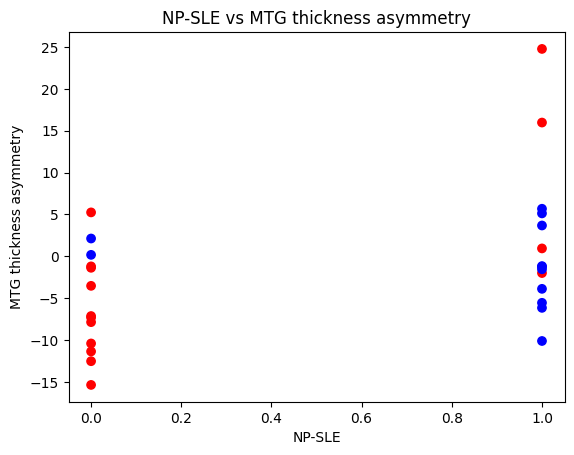

<Figure size 640x480 with 0 Axes>

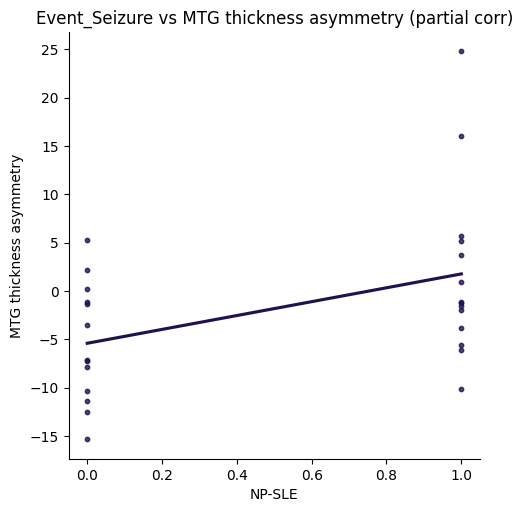

Event_Seizure, ACS, myelitis, CVA vs MTG thickness asymmetry: r = 0.41, p = 0.03
Event_Seizure, ACS, myelitis, CVA vs MTG thickness asymmetry (partial corr): r = 0.50, p = 0.02
total_neurocog vs MTG thickness asymmetry: r = 0.43, p = 0.03
NP-SLE vs MTG thickness asymmetry (partial corr): r = 0.52, p = 0.01


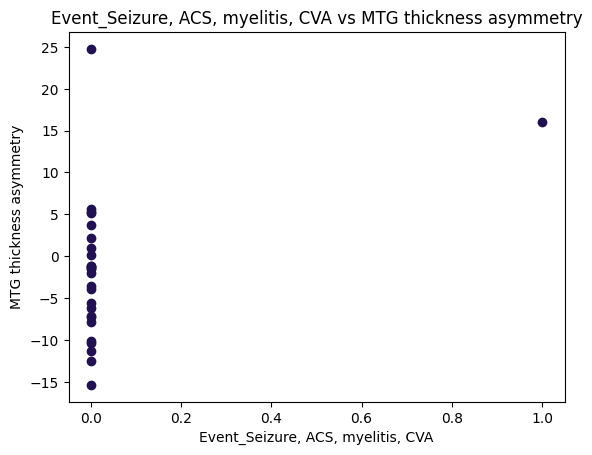

<Figure size 640x480 with 0 Axes>

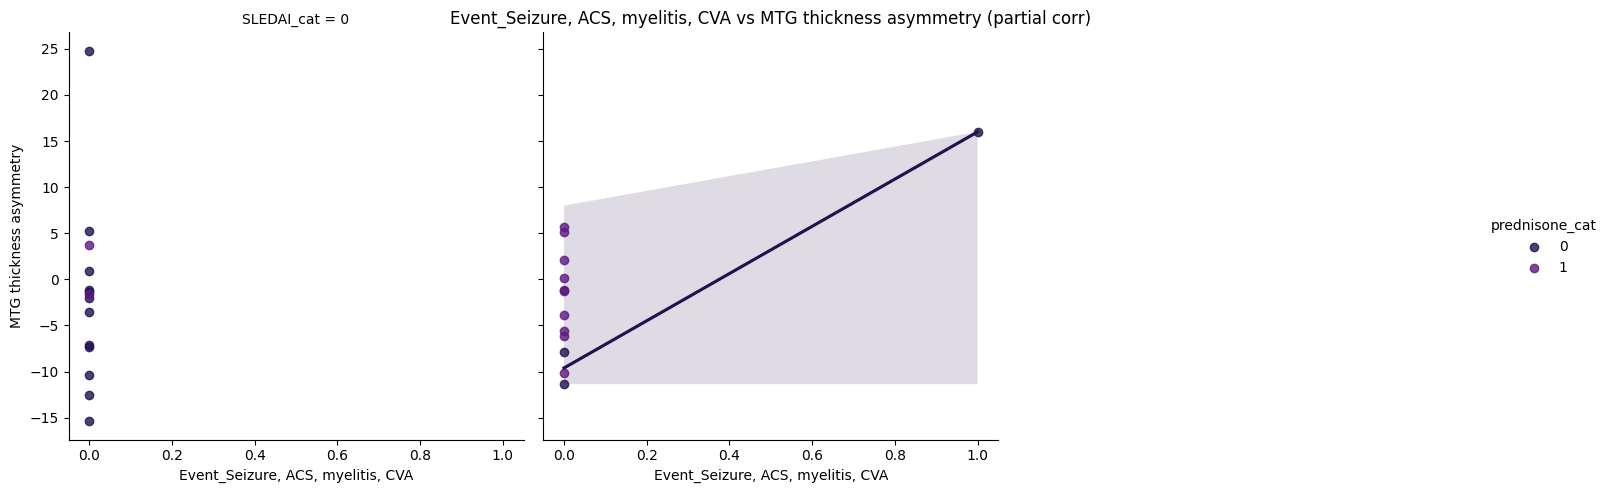

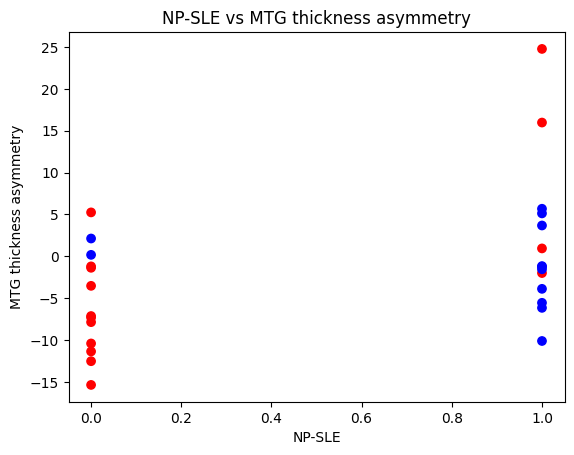

<Figure size 640x480 with 0 Axes>

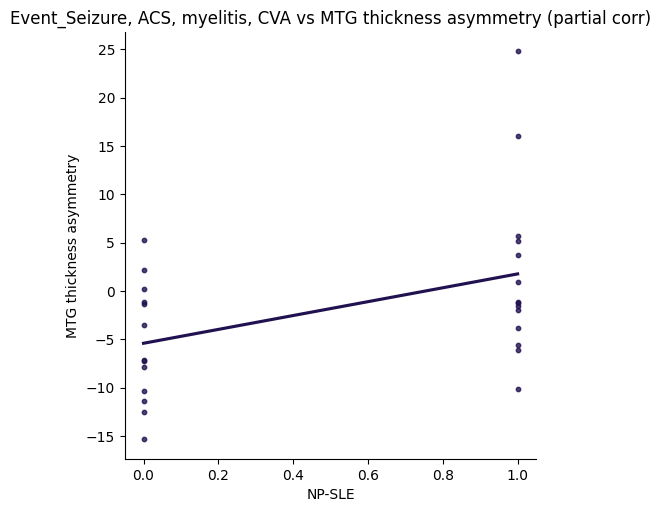

MTG thickness asymmetry vs MTG thickness asymmetry: r = 1.00, p = 0.00
total_neurocog vs MTG thickness asymmetry: r = 0.43, p = 0.03
NP-SLE vs MTG thickness asymmetry (partial corr): r = 0.52, p = 0.01


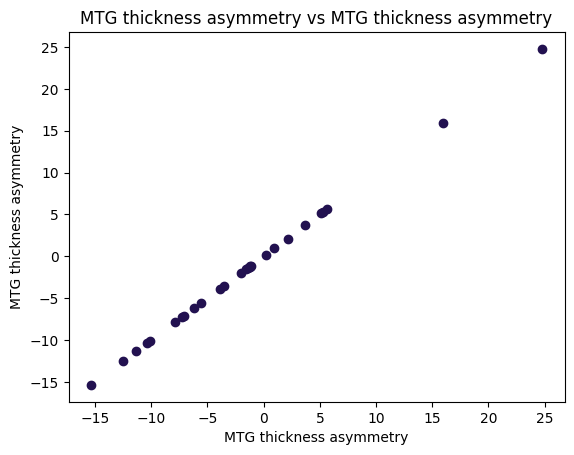

<Figure size 640x480 with 0 Axes>

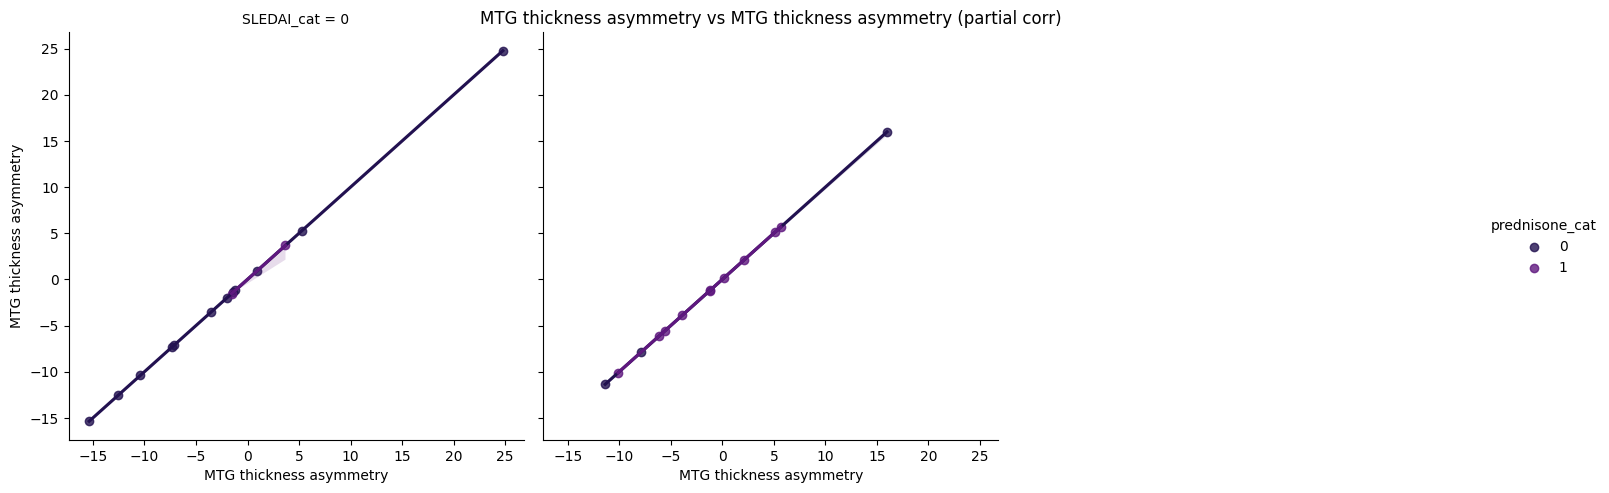

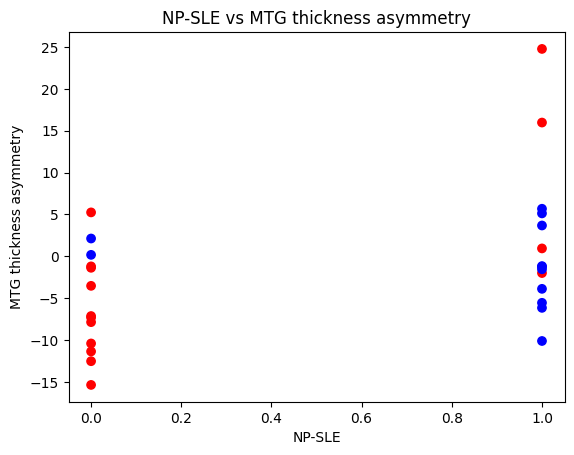

<Figure size 640x480 with 0 Axes>

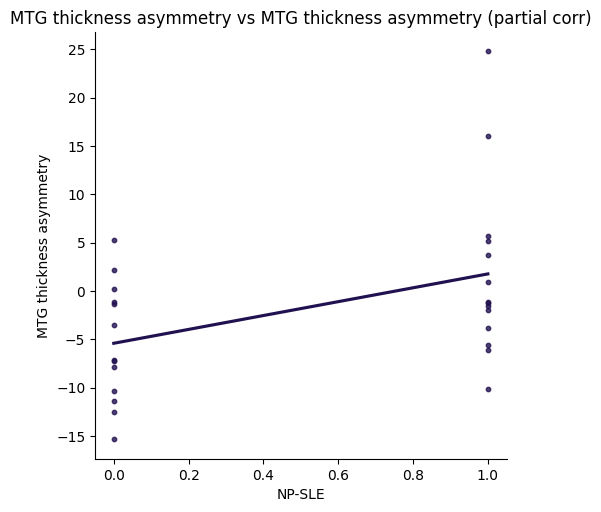

In [35]:
from scipy.stats import pearsonr
import pingouin as pg

df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)
# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'MTG thickness asymmetry'
prednisone = 'prednisone_cat'
sledai = 'SLEDAI_cat'

# Compute the correlations
for col in neurocog_cols + [lesion_load]:
    # Compute the Pearson correlation between each neurocognitive domain and lesion load
    r, p = pearsonr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and SLEDAI
    if col != lesion_load:
        partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, sledai, age, sex])
        r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
        print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
        assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

    # Compute the Pearson correlation between total neurocognitive score and lesion load
    r_total, p_total = pearsonr(df['NP-SLE'], df[lesion_load])
    print(f'total_neurocog vs {lesion_load}: r = {r_total:.2f}, p = {p_total:.2f}')

    # Compute the partial correlation adjusting for prednisone and SLEDAI
    total_partial_results = pg.partial_corr(data=df, x='NP-SLE', y=lesion_load, covar=[prednisone, sledai, age, sex])
    r_total_partial, p_total_partial = total_partial_results['r'][0], total_partial_results['p-val'][0]
    print(f'NP-SLE vs {lesion_load} (partial corr): r = {r_total_partial:.2f}, p = {p_total_partial:.2f}')


    # Plot the scatter plot
    plt.figure()
    plt.scatter(df[col], df[lesion_load])
    plt.xlabel(col)
    plt.ylabel(lesion_load)
    plt.title(f'{col} vs {lesion_load}')
    plt.show()

    # Plot the partial scatter plot
    plt.figure()
    sns.lmplot(data=df, x=col, y=lesion_load, hue=prednisone, col=sledai, col_wrap=3)
    plt.title(f'{col} vs {lesion_load} (partial corr)')
    plt.show()
    
    colors = ['red' if p == 0 else 'blue' for p in df[prednisone]]
    # Plot the scatter plot of total neurocognitive score vs lesion load
    plt.figure()
    plt.scatter(df['NP-SLE'], df[lesion_load], c=colors)
    plt.xlabel('NP-SLE')
    plt.ylabel(lesion_load)
    plt.title(f'NP-SLE vs {lesion_load}')
    plt.show()

    # Plot the partial scatter plot of total neurocognitive score vs lesion load
    plt.figure()
    sns.lmplot(data=df, x='NP-SLE', y=lesion_load, ci=None, scatter_kws={"s": 10})
    plt.title(f'{col} vs {lesion_load} (partial corr)')
    plt.show()

## SLEDAI

Event_CVA vs SLEDAI-2k (at the time of NP event): r = -0.16, p = 0.41
Event_CVA vs SLEDAI-2k (at the time of NP event) (partial corr): r = -0.23, p = 0.29
Event_Mood abnormalities (depressive) vs SLEDAI-2k (at the time of NP event): r = 0.16, p = 0.42
Event_Mood abnormalities (depressive) vs SLEDAI-2k (at the time of NP event) (partial corr): r = -0.08, p = 0.71
Event_Mood abnormalities (mixed) vs SLEDAI-2k (at the time of NP event): r = 0.22, p = 0.28
Event_Mood abnormalities (mixed) vs SLEDAI-2k (at the time of NP event) (partial corr): r = -0.11, p = 0.62
Event_Movement Disorder vs SLEDAI-2k (at the time of NP event): r = 0.13, p = 0.53
Event_Movement Disorder vs SLEDAI-2k (at the time of NP event) (partial corr): r = -0.26, p = 0.23
Event_Psychosis vs SLEDAI-2k (at the time of NP event): r = 0.17, p = 0.39
Event_Psychosis vs SLEDAI-2k (at the time of NP event) (partial corr): r = 0.10, p = 0.66
Event_Seizure vs SLEDAI-2k (at the time of NP event): r = -0.04, p = 0.85
Event_Seizure 

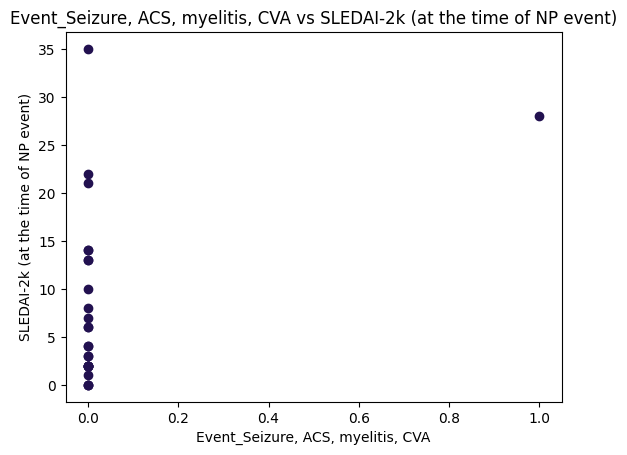

<Figure size 640x480 with 0 Axes>

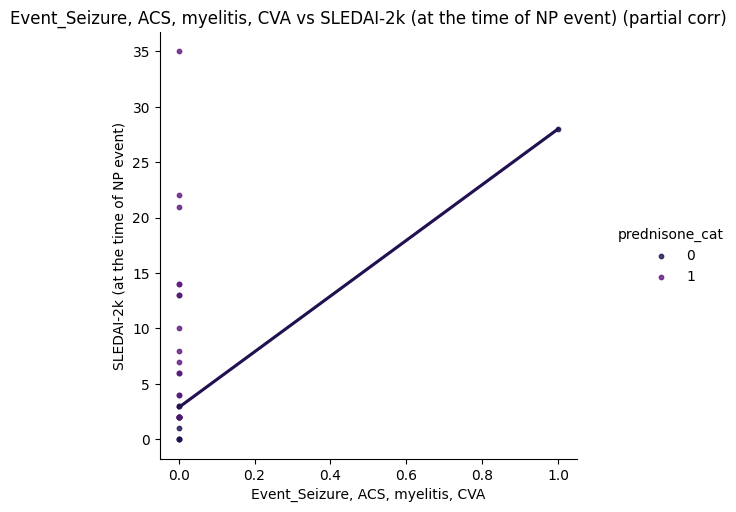

In [36]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'IOG volume asymmetry'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
sledai = 'SLEDAI-2k (at the time of NP event)'

## Compute the correlations
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and SLEDAI
    r, p = spearmanr(df[col], df[sledai])
    print(f'{col} vs {sledai}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=sledai, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {sledai} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {sledai} are perfectly correlated'
    
# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df[sledai])
print(f'{lesion_load} vs {sledai}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=sledai, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {sledai} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')


# Plot the scatter plot
plt.figure()
plt.scatter(df[col], df[sledai])
plt.xlabel(col)
plt.ylabel(sledai)
plt.title(f'{col} vs {sledai}')
plt.show()

# Plot the partial scatter plot
plt.figure()
sns.lmplot(data=df, x=col, y=sledai, hue=prednisone, ci=None, scatter_kws={"s": 10})
plt.title(f'{col} vs {sledai} (partial corr)')
plt.show()


In [37]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'IOG volume asymmetry'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
sledai = 'SLEDAI-2k (at the time of NP event)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs IOG volume asymmetry: r = -0.28, p = 0.16
Event_CVA vs IOG volume asymmetry (partial corr): r = -0.33, p = 0.13
Event_Mood abnormalities (depressive) vs IOG volume asymmetry: r = 0.23, p = 0.24
Event_Mood abnormalities (depressive) vs IOG volume asymmetry (partial corr): r = 0.06, p = 0.77
Event_Mood abnormalities (mixed) vs IOG volume asymmetry: r = 0.30, p = 0.13
Event_Mood abnormalities (mixed) vs IOG volume asymmetry (partial corr): r = 0.31, p = 0.16
Event_Movement Disorder vs IOG volume asymmetry: r = -0.13, p = 0.53
Event_Movement Disorder vs IOG volume asymmetry (partial corr): r = -0.27, p = 0.21
Event_Psychosis vs IOG volume asymmetry: r = -0.02, p = 0.93
Event_Psychosis vs IOG volume asymmetry (partial corr): r = -0.07, p = 0.74
Event_Seizure vs IOG volume asymmetry: r = 0.12, p = 0.55
Event_Seizure vs IOG volume asymmetry (partial corr): r = 0.04, p = 0.87
Event_Seizure, ACS, myelitis, CVA vs IOG volume asymmetry: r = 0.25, p = 0.21
Event_Seizure, ACS, myelitis

In [38]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Calc total volume %'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
sledai = 'SLEDAI-2k (at the time of NP event)'
   
# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df[sledai])
print(f'{lesion_load} vs {sledai}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=sledai, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {sledai} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')

Calc total volume % vs SLEDAI-2k (at the time of NP event): r = 0.39, p = 0.04
Calc total volume % vs SLEDAI-2k (at the time of NP event) (partial corr): r = 0.39, p = 0.07


In [39]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Calc total volume %'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
sledai = 'SLEDAI-2k (at the time of NP event)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs Calc total volume %: r = -0.20, p = 0.31
Event_CVA vs Calc total volume % (partial corr): r = -0.10, p = 0.63
Event_Mood abnormalities (depressive) vs Calc total volume %: r = -0.05, p = 0.81
Event_Mood abnormalities (depressive) vs Calc total volume % (partial corr): r = 0.04, p = 0.87
Event_Mood abnormalities (mixed) vs Calc total volume %: r = 0.08, p = 0.71
Event_Mood abnormalities (mixed) vs Calc total volume % (partial corr): r = -0.10, p = 0.64
Event_Movement Disorder vs Calc total volume %: r = 0.03, p = 0.90
Event_Movement Disorder vs Calc total volume % (partial corr): r = -0.18, p = 0.41
Event_Psychosis vs Calc total volume %: r = 0.27, p = 0.17
Event_Psychosis vs Calc total volume % (partial corr): r = 0.43, p = 0.04
Event_Seizure vs Calc total volume %: r = -0.47, p = 0.01
Event_Seizure vs Calc total volume % (partial corr): r = -0.22, p = 0.31
Event_Seizure, ACS, myelitis, CVA vs Calc total volume %: r = -0.15, p = 0.45
Event_Seizure, ACS, myelitis, CVA vs Ca

In [40]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Amygdala total volume %'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
sledai = 'SLEDAI-2k (at the time of NP event)'
 
# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df[sledai])
print(f'{lesion_load} vs {sledai}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=sledai, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {sledai} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')

Amygdala total volume % vs SLEDAI-2k (at the time of NP event): r = 0.38, p = 0.05
Amygdala total volume % vs SLEDAI-2k (at the time of NP event) (partial corr): r = 0.13, p = 0.55


In [41]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Amygdala total volume %'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
sledai = 'SLEDAI-2k (at the time of NP event)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs Amygdala total volume %: r = -0.05, p = 0.80
Event_CVA vs Amygdala total volume % (partial corr): r = -0.13, p = 0.55
Event_Mood abnormalities (depressive) vs Amygdala total volume %: r = 0.18, p = 0.36
Event_Mood abnormalities (depressive) vs Amygdala total volume % (partial corr): r = -0.05, p = 0.83
Event_Mood abnormalities (mixed) vs Amygdala total volume %: r = 0.23, p = 0.26
Event_Mood abnormalities (mixed) vs Amygdala total volume % (partial corr): r = 0.09, p = 0.67
Event_Movement Disorder vs Amygdala total volume %: r = 0.30, p = 0.13
Event_Movement Disorder vs Amygdala total volume % (partial corr): r = 0.19, p = 0.39
Event_Psychosis vs Amygdala total volume %: r = 0.02, p = 0.93
Event_Psychosis vs Amygdala total volume % (partial corr): r = -0.02, p = 0.93
Event_Seizure vs Amygdala total volume %: r = -0.12, p = 0.55
Event_Seizure vs Amygdala total volume % (partial corr): r = -0.08, p = 0.72
Event_Seizure, ACS, myelitis, CVA vs Amygdala total volume %: r = 0.20

In [42]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Amygdala left volume %'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
sledai = 'SLEDAI-2k (at the time of NP event)'

# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df[sledai])
print(f'{lesion_load} vs {sledai}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=sledai, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {sledai} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')


Amygdala left volume % vs SLEDAI-2k (at the time of NP event): r = 0.35, p = 0.07
Amygdala left volume % vs SLEDAI-2k (at the time of NP event) (partial corr): r = 0.25, p = 0.26


In [43]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Amygdala left volume %'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
sledai = 'SLEDAI-2k (at the time of NP event)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs Amygdala left volume %: r = -0.10, p = 0.62
Event_CVA vs Amygdala left volume % (partial corr): r = -0.18, p = 0.40
Event_Mood abnormalities (depressive) vs Amygdala left volume %: r = 0.12, p = 0.54
Event_Mood abnormalities (depressive) vs Amygdala left volume % (partial corr): r = -0.13, p = 0.56
Event_Mood abnormalities (mixed) vs Amygdala left volume %: r = 0.18, p = 0.38
Event_Mood abnormalities (mixed) vs Amygdala left volume % (partial corr): r = 0.03, p = 0.88
Event_Movement Disorder vs Amygdala left volume %: r = 0.25, p = 0.21
Event_Movement Disorder vs Amygdala left volume % (partial corr): r = 0.19, p = 0.38
Event_Psychosis vs Amygdala left volume %: r = 0.07, p = 0.72
Event_Psychosis vs Amygdala left volume % (partial corr): r = 0.16, p = 0.48
Event_Seizure vs Amygdala left volume %: r = -0.20, p = 0.33
Event_Seizure vs Amygdala left volume % (partial corr): r = -0.10, p = 0.66
Event_Seizure, ACS, myelitis, CVA vs Amygdala left volume %: r = 0.23, p = 0.26
Eve

In [44]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'IOG right volume %'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
sledai = 'SLEDAI-2k (at the time of NP event)'

# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df[sledai])
print(f'{lesion_load} vs {sledai}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=sledai, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {sledai} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')

IOG right volume % vs SLEDAI-2k (at the time of NP event): r = 0.37, p = 0.06
IOG right volume % vs SLEDAI-2k (at the time of NP event) (partial corr): r = 0.39, p = 0.07


In [45]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'IOG right volume %'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
sledai = 'SLEDAI-2k (at the time of NP event)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs IOG right volume %: r = -0.33, p = 0.10
Event_CVA vs IOG right volume % (partial corr): r = -0.50, p = 0.02
Event_Mood abnormalities (depressive) vs IOG right volume %: r = 0.27, p = 0.17
Event_Mood abnormalities (depressive) vs IOG right volume % (partial corr): r = 0.29, p = 0.18
Event_Mood abnormalities (mixed) vs IOG right volume %: r = 0.28, p = 0.16
Event_Mood abnormalities (mixed) vs IOG right volume % (partial corr): r = 0.15, p = 0.48
Event_Movement Disorder vs IOG right volume %: r = -0.13, p = 0.53
Event_Movement Disorder vs IOG right volume % (partial corr): r = -0.33, p = 0.13
Event_Psychosis vs IOG right volume %: r = 0.05, p = 0.79
Event_Psychosis vs IOG right volume % (partial corr): r = 0.08, p = 0.71
Event_Seizure vs IOG right volume %: r = -0.11, p = 0.60
Event_Seizure vs IOG right volume % (partial corr): r = 0.07, p = 0.75
Event_Seizure, ACS, myelitis, CVA vs IOG right volume %: r = -0.10, p = 0.62
Event_Seizure, ACS, myelitis, CVA vs IOG right volume 

In [46]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'PHG total thickness norm.'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
sledai = 'SLEDAI-2k (at the time of NP event)'

# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df[sledai])
print(f'{lesion_load} vs {sledai}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=sledai, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {sledai} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')


PHG total thickness norm. vs SLEDAI-2k (at the time of NP event): r = 0.38, p = 0.05
PHG total thickness norm. vs SLEDAI-2k (at the time of NP event) (partial corr): r = -0.21, p = 0.33


In [47]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'PHG total thickness norm.'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
sledai = 'SLEDAI-2k (at the time of NP event)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs PHG total thickness norm.: r = -0.30, p = 0.13
Event_CVA vs PHG total thickness norm. (partial corr): r = -0.51, p = 0.01
Event_Mood abnormalities (depressive) vs PHG total thickness norm.: r = 0.24, p = 0.22
Event_Mood abnormalities (depressive) vs PHG total thickness norm. (partial corr): r = 0.33, p = 0.13
Event_Mood abnormalities (mixed) vs PHG total thickness norm.: r = 0.10, p = 0.62
Event_Mood abnormalities (mixed) vs PHG total thickness norm. (partial corr): r = 0.04, p = 0.87
Event_Movement Disorder vs PHG total thickness norm.: r = 0.30, p = 0.13
Event_Movement Disorder vs PHG total thickness norm. (partial corr): r = 0.09, p = 0.69
Event_Psychosis vs PHG total thickness norm.: r = 0.34, p = 0.08
Event_Psychosis vs PHG total thickness norm. (partial corr): r = 0.17, p = 0.43
Event_Seizure vs PHG total thickness norm.: r = -0.30, p = 0.12
Event_Seizure vs PHG total thickness norm. (partial corr): r = -0.10, p = 0.65
Event_Seizure, ACS, myelitis, CVA vs PHG total t

In [48]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = '4th Ventricle volume %'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
sledai = 'SLEDAI-2k (at the time of NP event)'

# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df[sledai])
print(f'{lesion_load} vs {sledai}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=sledai, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {sledai} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')

4th Ventricle volume % vs SLEDAI-2k (at the time of NP event): r = 0.32, p = 0.10
4th Ventricle volume % vs SLEDAI-2k (at the time of NP event) (partial corr): r = 0.41, p = 0.05


In [49]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = '4th Ventricle volume %'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
sledai = 'SLEDAI-2k (at the time of NP event)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs 4th Ventricle volume %: r = 0.08, p = 0.71
Event_CVA vs 4th Ventricle volume % (partial corr): r = 0.05, p = 0.82
Event_Mood abnormalities (depressive) vs 4th Ventricle volume %: r = 0.06, p = 0.76
Event_Mood abnormalities (depressive) vs 4th Ventricle volume % (partial corr): r = -0.23, p = 0.28
Event_Mood abnormalities (mixed) vs 4th Ventricle volume %: r = 0.13, p = 0.53
Event_Mood abnormalities (mixed) vs 4th Ventricle volume % (partial corr): r = -0.04, p = 0.87
Event_Movement Disorder vs 4th Ventricle volume %: r = -0.18, p = 0.38
Event_Movement Disorder vs 4th Ventricle volume % (partial corr): r = -0.31, p = 0.15
Event_Psychosis vs 4th Ventricle volume %: r = 0.04, p = 0.86
Event_Psychosis vs 4th Ventricle volume % (partial corr): r = 0.29, p = 0.18
Event_Seizure vs 4th Ventricle volume %: r = 0.21, p = 0.29
Event_Seizure vs 4th Ventricle volume % (partial corr): r = -0.10, p = 0.65
Event_Seizure, ACS, myelitis, CVA vs 4th Ventricle volume %: r = 0.33, p = 0.10
Eve

## SLICCDI

Event_CVA vs SLICC-DI (at the time of NP event): r = 0.11, p = 0.59
Event_CVA vs SLICC-DI (at the time of NP event) (partial corr): r = -0.12, p = 0.58
Event_Mood abnormalities (depressive) vs SLICC-DI (at the time of NP event): r = -0.15, p = 0.45
Event_Mood abnormalities (depressive) vs SLICC-DI (at the time of NP event) (partial corr): r = -0.47, p = 0.02
Event_Mood abnormalities (mixed) vs SLICC-DI (at the time of NP event): r = -0.18, p = 0.37
Event_Mood abnormalities (mixed) vs SLICC-DI (at the time of NP event) (partial corr): r = -0.11, p = 0.63
Event_Movement Disorder vs SLICC-DI (at the time of NP event): r = 0.25, p = 0.21
Event_Movement Disorder vs SLICC-DI (at the time of NP event) (partial corr): r = 0.29, p = 0.18
Event_Psychosis vs SLICC-DI (at the time of NP event): r = 0.45, p = 0.02
Event_Psychosis vs SLICC-DI (at the time of NP event) (partial corr): r = 0.60, p = 0.00
Event_Seizure vs SLICC-DI (at the time of NP event): r = 0.17, p = 0.39
Event_Seizure vs SLICC-DI 

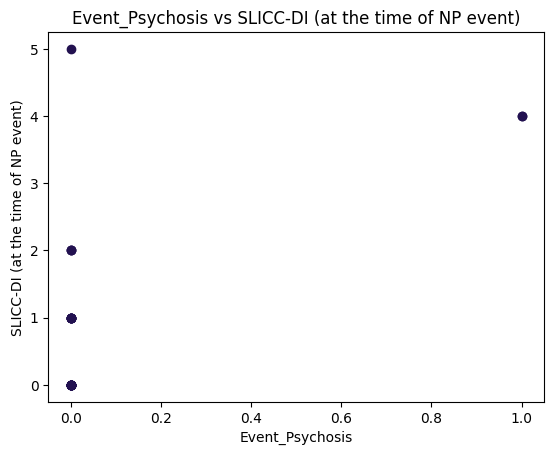

<Figure size 640x480 with 0 Axes>

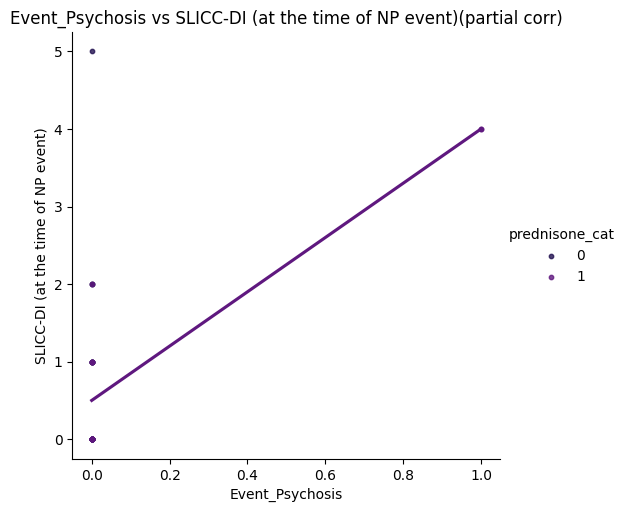

In [50]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'OpIFG total volume %'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
slicc = 'SLICC-DI (at the time of NP event)'

## Compute the correlations
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and SLEDAI
    r, p = spearmanr(df[col], df[slicc])
    print(f'{col} vs {slicc}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=slicc, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {slicc} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {slicc} are perfectly correlated'
    
# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df[slicc])
print(f'{lesion_load} vs {slicc}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=slicc, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {slicc} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')


# Plot the scatter plot
plt.figure()
plt.scatter(df['Event_Psychosis'], df[slicc])
plt.xlabel('Event_Psychosis')
plt.ylabel(slicc)
plt.title('Event_Psychosis vs ' + slicc)
plt.show()

# Plot the partial scatter plot
plt.figure()
sns.lmplot(data=df, x='Event_Psychosis', y=slicc, hue=prednisone, ci=None, scatter_kws={"s": 10})
plt.title('Event_Psychosis vs ' + slicc + '(partial corr)')
plt.show()


In [51]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'OpIFG total volume %'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
slicc = 'SLICC-DI (at the time of NP event)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs OpIFG total volume %: r = -0.33, p = 0.10
Event_CVA vs OpIFG total volume % (partial corr): r = -0.43, p = 0.04
Event_Mood abnormalities (depressive) vs OpIFG total volume %: r = 0.07, p = 0.72
Event_Mood abnormalities (depressive) vs OpIFG total volume % (partial corr): r = 0.41, p = 0.05
Event_Mood abnormalities (mixed) vs OpIFG total volume %: r = 0.25, p = 0.21
Event_Mood abnormalities (mixed) vs OpIFG total volume % (partial corr): r = 0.25, p = 0.25
Event_Movement Disorder vs OpIFG total volume %: r = 0.03, p = 0.90
Event_Movement Disorder vs OpIFG total volume % (partial corr): r = -0.10, p = 0.64
Event_Psychosis vs OpIFG total volume %: r = -0.36, p = 0.06
Event_Psychosis vs OpIFG total volume % (partial corr): r = -0.29, p = 0.17
Event_Seizure vs OpIFG total volume %: r = -0.29, p = 0.15
Event_Seizure vs OpIFG total volume % (partial corr): r = 0.12, p = 0.59
Event_Seizure, ACS, myelitis, CVA vs OpIFG total volume %: r = -0.25, p = 0.21
Event_Seizure, ACS, myeliti

In [52]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'MPoG right volume %'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
slicc = 'SLICC-DI (at the time of NP event)'

# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df[slicc])
print(f'{lesion_load} vs {slicc}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=slicc, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {slicc} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')

MPoG right volume % vs SLICC-DI (at the time of NP event): r = -0.54, p = 0.00
MPoG right volume % vs SLICC-DI (at the time of NP event) (partial corr): r = -0.48, p = 0.02


In [53]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'MPoG right volume %'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
slicc = 'SLICC-DI (at the time of NP event)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs MPoG right volume %: r = 0.10, p = 0.62
Event_CVA vs MPoG right volume % (partial corr): r = 0.05, p = 0.84
Event_Mood abnormalities (depressive) vs MPoG right volume %: r = 0.11, p = 0.58
Event_Mood abnormalities (depressive) vs MPoG right volume % (partial corr): r = 0.20, p = 0.36
Event_Mood abnormalities (mixed) vs MPoG right volume %: r = 0.23, p = 0.26
Event_Mood abnormalities (mixed) vs MPoG right volume % (partial corr): r = 0.25, p = 0.24
Event_Movement Disorder vs MPoG right volume %: r = -0.33, p = 0.10
Event_Movement Disorder vs MPoG right volume % (partial corr): r = -0.23, p = 0.30
Event_Psychosis vs MPoG right volume %: r = -0.34, p = 0.08
Event_Psychosis vs MPoG right volume % (partial corr): r = -0.33, p = 0.13
Event_Seizure vs MPoG right volume %: r = 0.03, p = 0.88
Event_Seizure vs MPoG right volume % (partial corr): r = 0.11, p = 0.60
Event_Seizure, ACS, myelitis, CVA vs MPoG right volume %: r = -0.28, p = 0.16
Event_Seizure, ACS, myelitis, CVA vs MPoG 

In [54]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Ventral DC left volume %'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
slicc = 'SLICC-DI (at the time of NP event)'

# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df[slicc])
print(f'{lesion_load} vs {slicc}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=slicc, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {slicc} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')


Ventral DC left volume % vs SLICC-DI (at the time of NP event): r = -0.49, p = 0.01
Ventral DC left volume % vs SLICC-DI (at the time of NP event) (partial corr): r = -0.48, p = 0.02


In [55]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Ventral DC left volume %'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
slicc = 'SLICC-DI (at the time of NP event)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs Ventral DC left volume %: r = 0.10, p = 0.62
Event_CVA vs Ventral DC left volume % (partial corr): r = 0.20, p = 0.35
Event_Mood abnormalities (depressive) vs Ventral DC left volume %: r = 0.04, p = 0.86
Event_Mood abnormalities (depressive) vs Ventral DC left volume % (partial corr): r = 0.20, p = 0.35
Event_Mood abnormalities (mixed) vs Ventral DC left volume %: r = 0.33, p = 0.10
Event_Mood abnormalities (mixed) vs Ventral DC left volume % (partial corr): r = 0.29, p = 0.18
Event_Movement Disorder vs Ventral DC left volume %: r = 0.15, p = 0.45
Event_Movement Disorder vs Ventral DC left volume % (partial corr): r = -0.12, p = 0.58
Event_Psychosis vs Ventral DC left volume %: r = -0.31, p = 0.12
Event_Psychosis vs Ventral DC left volume % (partial corr): r = -0.24, p = 0.27
Event_Seizure vs Ventral DC left volume %: r = -0.26, p = 0.20
Event_Seizure vs Ventral DC left volume % (partial corr): r = -0.21, p = 0.34
Event_Seizure, ACS, myelitis, CVA vs Ventral DC left volume

In [56]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Insular right thickness mm'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
slicc = 'SLICC-DI (at the time of NP event)'

# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df[slicc])
print(f'{lesion_load} vs {slicc}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=slicc, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {slicc} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')

Insular right thickness mm vs SLICC-DI (at the time of NP event): r = -0.49, p = 0.01
Insular right thickness mm vs SLICC-DI (at the time of NP event) (partial corr): r = -0.38, p = 0.07


In [57]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Insular right thickness mm'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
slicc = 'SLICC-DI (at the time of NP event)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs Insular right thickness mm: r = -0.23, p = 0.26
Event_CVA vs Insular right thickness mm (partial corr): r = -0.29, p = 0.18
Event_Mood abnormalities (depressive) vs Insular right thickness mm: r = 0.29, p = 0.14
Event_Mood abnormalities (depressive) vs Insular right thickness mm (partial corr): r = 0.45, p = 0.03
Event_Mood abnormalities (mixed) vs Insular right thickness mm: r = 0.13, p = 0.53
Event_Mood abnormalities (mixed) vs Insular right thickness mm (partial corr): r = 0.07, p = 0.76
Event_Movement Disorder vs Insular right thickness mm: r = 0.30, p = 0.13
Event_Movement Disorder vs Insular right thickness mm (partial corr): r = 0.13, p = 0.55
Event_Psychosis vs Insular right thickness mm: r = -0.27, p = 0.17
Event_Psychosis vs Insular right thickness mm (partial corr): r = -0.30, p = 0.16
Event_Seizure vs Insular right thickness mm: r = -0.18, p = 0.36
Event_Seizure vs Insular right thickness mm (partial corr): r = 0.00, p = 1.00
Event_Seizure, ACS, myelitis, CVA v

In [58]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'SMG total volume %'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
slicc = 'SLICC-DI (at the time of NP event)'
    
# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df[slicc])
print(f'{lesion_load} vs {slicc}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=slicc, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {slicc} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')

SMG total volume % vs SLICC-DI (at the time of NP event): r = -0.51, p = 0.01
SMG total volume % vs SLICC-DI (at the time of NP event) (partial corr): r = -0.37, p = 0.08


In [59]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'SMG total volume %'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
slicc = 'SLICC-DI (at the time of NP event)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs SMG total volume %: r = -0.33, p = 0.10
Event_CVA vs SMG total volume % (partial corr): r = -0.40, p = 0.06
Event_Mood abnormalities (depressive) vs SMG total volume %: r = 0.18, p = 0.36
Event_Mood abnormalities (depressive) vs SMG total volume % (partial corr): r = 0.41, p = 0.05
Event_Mood abnormalities (mixed) vs SMG total volume %: r = 0.23, p = 0.26
Event_Mood abnormalities (mixed) vs SMG total volume % (partial corr): r = 0.21, p = 0.33
Event_Movement Disorder vs SMG total volume %: r = 0.13, p = 0.53
Event_Movement Disorder vs SMG total volume % (partial corr): r = 0.05, p = 0.81
Event_Psychosis vs SMG total volume %: r = -0.29, p = 0.14
Event_Psychosis vs SMG total volume % (partial corr): r = -0.23, p = 0.29
Event_Seizure vs SMG total volume %: r = -0.35, p = 0.08
Event_Seizure vs SMG total volume % (partial corr): r = -0.06, p = 0.78
Event_Seizure, ACS, myelitis, CVA vs SMG total volume %: r = -0.28, p = 0.16
Event_Seizure, ACS, myelitis, CVA vs SMG total volume

## dsDNA

Event_CVA vs anti-dsDNA Titre  (insert NV here <7 ): r = 0.00, p = 1.00
Event_CVA vs anti-dsDNA Titre  (insert NV here <7 ) (partial corr): r = -0.13, p = 0.56
Event_Mood abnormalities (depressive) vs anti-dsDNA Titre  (insert NV here <7 ): r = 0.07, p = 0.74
Event_Mood abnormalities (depressive) vs anti-dsDNA Titre  (insert NV here <7 ) (partial corr): r = -0.21, p = 0.35
Event_Mood abnormalities (mixed) vs anti-dsDNA Titre  (insert NV here <7 ): r = 0.10, p = 0.62
Event_Mood abnormalities (mixed) vs anti-dsDNA Titre  (insert NV here <7 ) (partial corr): r = -0.11, p = 0.61
Event_Movement Disorder vs anti-dsDNA Titre  (insert NV here <7 ): r = 0.05, p = 0.80
Event_Movement Disorder vs anti-dsDNA Titre  (insert NV here <7 ) (partial corr): r = -0.13, p = 0.54
Event_Psychosis vs anti-dsDNA Titre  (insert NV here <7 ): r = 0.00, p = 1.00
Event_Psychosis vs anti-dsDNA Titre  (insert NV here <7 ) (partial corr): r = -0.13, p = 0.57
Event_Seizure vs anti-dsDNA Titre  (insert NV here <7 ): r

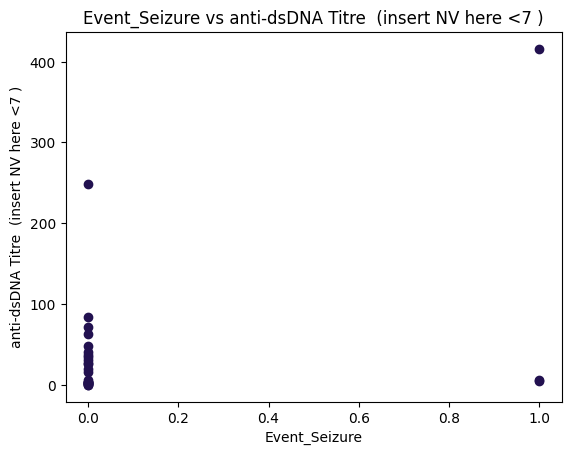

<Figure size 640x480 with 0 Axes>

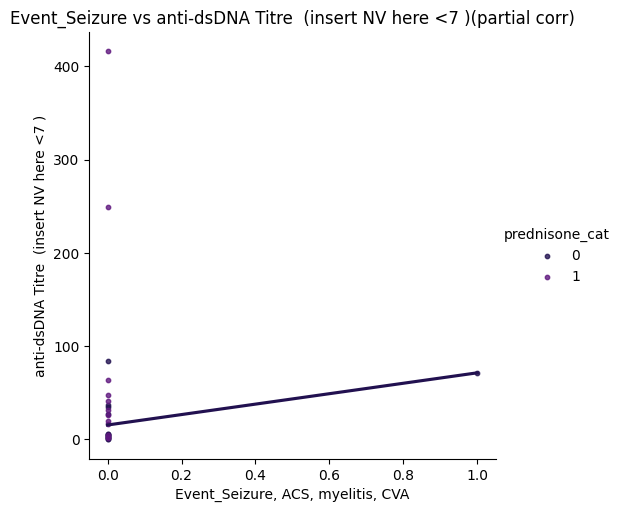

In [61]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'AOrG thickness asymmetry'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
dsDNA = 'anti-dsDNA Titre  (insert NV here <7 )'

## Compute the correlations
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and SLEDAI
    r, p = spearmanr(df[col], df[dsDNA])
    print(f'{col} vs {dsDNA}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=dsDNA, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {dsDNA} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {dsDNA} are perfectly correlated'
    
# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df[dsDNA])
print(f'{lesion_load} vs {dsDNA}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=dsDNA, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {dsDNA} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')


# Plot the scatter plot
plt.figure()
plt.scatter(df['Event_Seizure'], df[dsDNA])
plt.xlabel('Event_Seizure')
plt.ylabel(dsDNA)
plt.title('Event_Seizure vs ' + dsDNA)
plt.show()

# Plot the partial scatter plot
plt.figure()
sns.lmplot(data=df, x=col, y=dsDNA, hue=prednisone, ci=None, scatter_kws={"s": 10})
plt.title('Event_Seizure vs ' + dsDNA + '(partial corr)')
plt.show()


In [62]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'AOrG thickness asymmetry'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
dsDNA = 'anti-dsDNA Titre  (insert NV here <7 )'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs AOrG thickness asymmetry: r = 0.33, p = 0.10
Event_CVA vs AOrG thickness asymmetry (partial corr): r = 0.36, p = 0.09
Event_Mood abnormalities (depressive) vs AOrG thickness asymmetry: r = 0.28, p = 0.15
Event_Mood abnormalities (depressive) vs AOrG thickness asymmetry (partial corr): r = 0.35, p = 0.10
Event_Mood abnormalities (mixed) vs AOrG thickness asymmetry: r = -0.10, p = 0.62
Event_Mood abnormalities (mixed) vs AOrG thickness asymmetry (partial corr): r = -0.13, p = 0.56
Event_Movement Disorder vs AOrG thickness asymmetry: r = 0.00, p = 1.00
Event_Movement Disorder vs AOrG thickness asymmetry (partial corr): r = 0.01, p = 0.97
Event_Psychosis vs AOrG thickness asymmetry: r = -0.09, p = 0.65
Event_Psychosis vs AOrG thickness asymmetry (partial corr): r = -0.21, p = 0.34
Event_Seizure vs AOrG thickness asymmetry: r = -0.09, p = 0.65
Event_Seizure vs AOrG thickness asymmetry (partial corr): r = -0.18, p = 0.40
Event_Seizure, ACS, myelitis, CVA vs AOrG thickness asymme

In [63]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'SPL volume asymmetry'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
dsDNA = 'anti-dsDNA Titre  (insert NV here <7 )'
    
# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df[dsDNA])
print(f'{lesion_load} vs {dsDNA}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=dsDNA, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {dsDNA} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')


SPL volume asymmetry vs anti-dsDNA Titre  (insert NV here <7 ): r = -0.43, p = 0.03
SPL volume asymmetry vs anti-dsDNA Titre  (insert NV here <7 ) (partial corr): r = -0.12, p = 0.60


In [64]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'SPL volume asymmetry'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
dsDNA = 'anti-dsDNA Titre  (insert NV here <7 )'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs SPL volume asymmetry: r = 0.05, p = 0.80
Event_CVA vs SPL volume asymmetry (partial corr): r = 0.06, p = 0.78
Event_Mood abnormalities (depressive) vs SPL volume asymmetry: r = 0.23, p = 0.24
Event_Mood abnormalities (depressive) vs SPL volume asymmetry (partial corr): r = 0.34, p = 0.12
Event_Mood abnormalities (mixed) vs SPL volume asymmetry: r = -0.18, p = 0.38
Event_Mood abnormalities (mixed) vs SPL volume asymmetry (partial corr): r = -0.24, p = 0.27
Event_Movement Disorder vs SPL volume asymmetry: r = 0.10, p = 0.62
Event_Movement Disorder vs SPL volume asymmetry (partial corr): r = 0.12, p = 0.58
Event_Psychosis vs SPL volume asymmetry: r = -0.27, p = 0.17
Event_Psychosis vs SPL volume asymmetry (partial corr): r = -0.26, p = 0.23
Event_Seizure vs SPL volume asymmetry: r = 0.11, p = 0.60
Event_Seizure vs SPL volume asymmetry (partial corr): r = 0.05, p = 0.82
Event_Seizure, ACS, myelitis, CVA vs SPL volume asymmetry: r = -0.30, p = 0.13
Event_Seizure, ACS, myelitis,

In [65]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'AnG total thickness mm'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
dsDNA = 'anti-dsDNA Titre  (insert NV here <7 )'
    
# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df[dsDNA])
print(f'{lesion_load} vs {dsDNA}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=dsDNA, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {dsDNA} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')

AnG total thickness mm vs anti-dsDNA Titre  (insert NV here <7 ): r = -0.43, p = 0.03
AnG total thickness mm vs anti-dsDNA Titre  (insert NV here <7 ) (partial corr): r = -0.25, p = 0.26


In [66]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'AnG total thickness mm'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
dsDNA = 'anti-dsDNA Titre  (insert NV here <7 )'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs AnG total thickness mm: r = -0.25, p = 0.21
Event_CVA vs AnG total thickness mm (partial corr): r = -0.14, p = 0.51
Event_Mood abnormalities (depressive) vs AnG total thickness mm: r = -0.17, p = 0.39
Event_Mood abnormalities (depressive) vs AnG total thickness mm (partial corr): r = 0.12, p = 0.57
Event_Mood abnormalities (mixed) vs AnG total thickness mm: r = 0.05, p = 0.80
Event_Mood abnormalities (mixed) vs AnG total thickness mm (partial corr): r = 0.10, p = 0.66
Event_Movement Disorder vs AnG total thickness mm: r = 0.25, p = 0.21
Event_Movement Disorder vs AnG total thickness mm (partial corr): r = 0.28, p = 0.20
Event_Psychosis vs AnG total thickness mm: r = -0.09, p = 0.65
Event_Psychosis vs AnG total thickness mm (partial corr): r = 0.07, p = 0.75
Event_Seizure vs AnG total thickness mm: r = -0.35, p = 0.08
Event_Seizure vs AnG total thickness mm (partial corr): r = -0.05, p = 0.81
Event_Seizure, ACS, myelitis, CVA vs AnG total thickness mm: r = -0.33, p = 0.10
E

In [67]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'OpIFG volume asymmetry'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
dsDNA = 'anti-dsDNA Titre  (insert NV here <7 )'
    
# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df[dsDNA])
print(f'{lesion_load} vs {dsDNA}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=dsDNA, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {dsDNA} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')

OpIFG volume asymmetry vs anti-dsDNA Titre  (insert NV here <7 ): r = 0.42, p = 0.03
OpIFG volume asymmetry vs anti-dsDNA Titre  (insert NV here <7 ) (partial corr): r = 0.15, p = 0.51


In [68]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'OpIFG volume asymmetry'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
dsDNA = 'anti-dsDNA Titre  (insert NV here <7 )'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs OpIFG volume asymmetry: r = 0.28, p = 0.16
Event_CVA vs OpIFG volume asymmetry (partial corr): r = 0.32, p = 0.13
Event_Mood abnormalities (depressive) vs OpIFG volume asymmetry: r = 0.16, p = 0.43
Event_Mood abnormalities (depressive) vs OpIFG volume asymmetry (partial corr): r = 0.18, p = 0.40
Event_Mood abnormalities (mixed) vs OpIFG volume asymmetry: r = 0.10, p = 0.62
Event_Mood abnormalities (mixed) vs OpIFG volume asymmetry (partial corr): r = 0.00, p = 0.99
Event_Movement Disorder vs OpIFG volume asymmetry: r = 0.08, p = 0.71
Event_Movement Disorder vs OpIFG volume asymmetry (partial corr): r = -0.02, p = 0.92
Event_Psychosis vs OpIFG volume asymmetry: r = -0.04, p = 0.86
Event_Psychosis vs OpIFG volume asymmetry (partial corr): r = -0.03, p = 0.88
Event_Seizure vs OpIFG volume asymmetry: r = -0.24, p = 0.22
Event_Seizure vs OpIFG volume asymmetry (partial corr): r = -0.28, p = 0.20
Event_Seizure, ACS, myelitis, CVA vs OpIFG volume asymmetry: r = -0.10, p = 0.62
Ev

In [69]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'AnG left thickness mm'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
dsDNA = 'anti-dsDNA Titre  (insert NV here <7 )'

# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df[dsDNA])
print(f'{lesion_load} vs {dsDNA}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=dsDNA, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {dsDNA} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')


AnG left thickness mm vs anti-dsDNA Titre  (insert NV here <7 ): r = -0.41, p = 0.04
AnG left thickness mm vs anti-dsDNA Titre  (insert NV here <7 ) (partial corr): r = -0.37, p = 0.08


In [70]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'AnG left thickness mm'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
dsDNA = 'anti-dsDNA Titre  (insert NV here <7 )'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs AnG left thickness mm: r = -0.20, p = 0.31
Event_CVA vs AnG left thickness mm (partial corr): r = -0.10, p = 0.64
Event_Mood abnormalities (depressive) vs AnG left thickness mm: r = -0.02, p = 0.90
Event_Mood abnormalities (depressive) vs AnG left thickness mm (partial corr): r = 0.18, p = 0.41
Event_Mood abnormalities (mixed) vs AnG left thickness mm: r = 0.03, p = 0.90
Event_Mood abnormalities (mixed) vs AnG left thickness mm (partial corr): r = 0.05, p = 0.81
Event_Movement Disorder vs AnG left thickness mm: r = 0.30, p = 0.13
Event_Movement Disorder vs AnG left thickness mm (partial corr): r = 0.34, p = 0.12
Event_Psychosis vs AnG left thickness mm: r = -0.05, p = 0.79
Event_Psychosis vs AnG left thickness mm (partial corr): r = 0.07, p = 0.76
Event_Seizure vs AnG left thickness mm: r = -0.48, p = 0.01
Event_Seizure vs AnG left thickness mm (partial corr): r = -0.21, p = 0.33
Event_Seizure, ACS, myelitis, CVA vs AnG left thickness mm: r = -0.33, p = 0.10
Event_Seizure,

## C3 mg/dL

Event_CVA vs C3 (mgdl): r = 0.05, p = 0.80
Event_CVA vs C3 (mgdl) (partial corr): r = 0.11, p = 0.61
Event_Mood abnormalities (depressive) vs C3 (mgdl): r = -0.22, p = 0.27
Event_Mood abnormalities (depressive) vs C3 (mgdl) (partial corr): r = -0.21, p = 0.34
Event_Mood abnormalities (mixed) vs C3 (mgdl): r = 0.28, p = 0.16
Event_Mood abnormalities (mixed) vs C3 (mgdl) (partial corr): r = 0.51, p = 0.01
Event_Movement Disorder vs C3 (mgdl): r = 0.23, p = 0.26
Event_Movement Disorder vs C3 (mgdl) (partial corr): r = 0.31, p = 0.15
Event_Psychosis vs C3 (mgdl): r = -0.23, p = 0.25
Event_Psychosis vs C3 (mgdl) (partial corr): r = -0.15, p = 0.49
Event_Seizure vs C3 (mgdl): r = -0.09, p = 0.65
Event_Seizure vs C3 (mgdl) (partial corr): r = -0.22, p = 0.32
Event_Seizure, ACS, myelitis, CVA vs C3 (mgdl): r = 0.14, p = 0.49
Event_Seizure, ACS, myelitis, CVA vs C3 (mgdl) (partial corr): r = 0.01, p = 0.97
AnG left thickness mm vs C3 (mgdl): r = 0.19, p = 0.34
AnG left thickness mm vs C3 (mgdl)

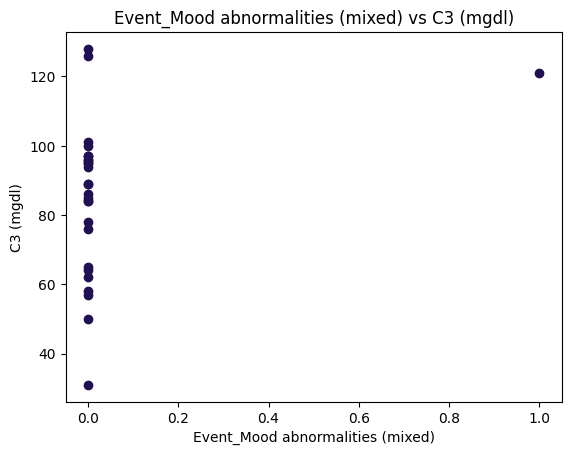

<Figure size 640x480 with 0 Axes>

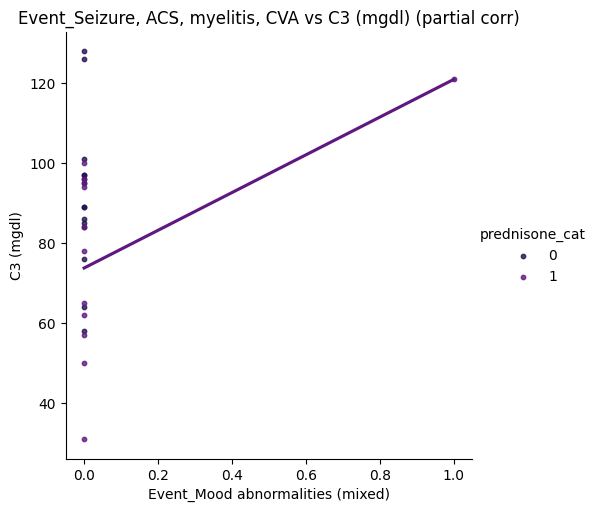

In [71]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'AnG left thickness mm'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
C3 = 'C3 (mgdl)'

## Compute the correlations
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and SLEDAI
    r, p = spearmanr(df[col], df[C3])
    print(f'{col} vs {C3}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=C3, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {C3} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {C3} are perfectly correlated'
    
# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df[C3])
print(f'{lesion_load} vs {C3}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=C3, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {C3} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')


# Plot the scatter plot
plt.figure()
plt.scatter(df['Event_Mood abnormalities (mixed)'], df[C3])
plt.xlabel('Event_Mood abnormalities (mixed)')
plt.ylabel(C3)
plt.title('Event_Mood abnormalities (mixed) vs ' + C3)
plt.show()

# Plot the partial scatter plot
plt.figure()
sns.lmplot(data=df, x='Event_Mood abnormalities (mixed)', y=C3, hue=prednisone, ci=None, scatter_kws={"s": 10})
plt.title(f'{col} vs {C3} (partial corr)')
plt.show()


In [72]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'AnG left thickness mm'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
C3 = 'C3 (mgdl)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs AnG left thickness mm: r = -0.20, p = 0.31
Event_CVA vs AnG left thickness mm (partial corr): r = -0.10, p = 0.64
Event_Mood abnormalities (depressive) vs AnG left thickness mm: r = -0.02, p = 0.90
Event_Mood abnormalities (depressive) vs AnG left thickness mm (partial corr): r = 0.18, p = 0.41
Event_Mood abnormalities (mixed) vs AnG left thickness mm: r = 0.03, p = 0.90
Event_Mood abnormalities (mixed) vs AnG left thickness mm (partial corr): r = 0.05, p = 0.81
Event_Movement Disorder vs AnG left thickness mm: r = 0.30, p = 0.13
Event_Movement Disorder vs AnG left thickness mm (partial corr): r = 0.34, p = 0.12
Event_Psychosis vs AnG left thickness mm: r = -0.05, p = 0.79
Event_Psychosis vs AnG left thickness mm (partial corr): r = 0.07, p = 0.76
Event_Seizure vs AnG left thickness mm: r = -0.48, p = 0.01
Event_Seizure vs AnG left thickness mm (partial corr): r = -0.21, p = 0.33
Event_Seizure, ACS, myelitis, CVA vs AnG left thickness mm: r = -0.33, p = 0.10
Event_Seizure,

In [73]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Calc right volume cm3'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
C3 = 'C3 (mgdl)'
    
# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df[C3])
print(f'{lesion_load} vs {C3}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=C3, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {C3} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')


Calc right volume cm3 vs C3 (mgdl): r = -0.56, p = 0.00
Calc right volume cm3 vs C3 (mgdl) (partial corr): r = -0.55, p = 0.01


In [74]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Calc right volume cm3'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
C3 = 'C3 (mgdl)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs Calc right volume cm3: r = -0.33, p = 0.10
Event_CVA vs Calc right volume cm3 (partial corr): r = -0.31, p = 0.15
Event_Mood abnormalities (depressive) vs Calc right volume cm3: r = -0.04, p = 0.86
Event_Mood abnormalities (depressive) vs Calc right volume cm3 (partial corr): r = 0.16, p = 0.47
Event_Mood abnormalities (mixed) vs Calc right volume cm3: r = -0.18, p = 0.38
Event_Mood abnormalities (mixed) vs Calc right volume cm3 (partial corr): r = -0.25, p = 0.26
Event_Movement Disorder vs Calc right volume cm3: r = -0.13, p = 0.53
Event_Movement Disorder vs Calc right volume cm3 (partial corr): r = -0.20, p = 0.36
Event_Psychosis vs Calc right volume cm3: r = 0.27, p = 0.17
Event_Psychosis vs Calc right volume cm3 (partial corr): r = 0.42, p = 0.05
Event_Seizure vs Calc right volume cm3: r = -0.41, p = 0.03
Event_Seizure vs Calc right volume cm3 (partial corr): r = -0.18, p = 0.42
Event_Seizure, ACS, myelitis, CVA vs Calc right volume cm3: r = 0.08, p = 0.71
Event_Seizur

In [75]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Calc right volume %'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
C3 = 'C3 (mgdl)'

# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df[C3])
print(f'{lesion_load} vs {C3}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=C3, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {C3} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')


Calc right volume % vs C3 (mgdl): r = -0.53, p = 0.00
Calc right volume % vs C3 (mgdl) (partial corr): r = -0.51, p = 0.01


In [76]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Calc right volume %'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
C3 = 'C3 (mgdl)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs Calc right volume %: r = -0.30, p = 0.13
Event_CVA vs Calc right volume % (partial corr): r = -0.35, p = 0.10
Event_Mood abnormalities (depressive) vs Calc right volume %: r = 0.12, p = 0.54
Event_Mood abnormalities (depressive) vs Calc right volume % (partial corr): r = 0.17, p = 0.44
Event_Mood abnormalities (mixed) vs Calc right volume %: r = 0.08, p = 0.71
Event_Mood abnormalities (mixed) vs Calc right volume % (partial corr): r = -0.14, p = 0.52
Event_Movement Disorder vs Calc right volume %: r = -0.03, p = 0.90
Event_Movement Disorder vs Calc right volume % (partial corr): r = -0.22, p = 0.31
Event_Psychosis vs Calc right volume %: r = 0.20, p = 0.32
Event_Psychosis vs Calc right volume % (partial corr): r = 0.36, p = 0.09
Event_Seizure vs Calc right volume %: r = -0.41, p = 0.03
Event_Seizure vs Calc right volume % (partial corr): r = -0.13, p = 0.54
Event_Seizure, ACS, myelitis, CVA vs Calc right volume %: r = -0.08, p = 0.71
Event_Seizure, ACS, myelitis, CVA vs Ca

In [77]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'PCu right thickness mm'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
C3 = 'C3 (mgdl)'
    
# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df[C3])
print(f'{lesion_load} vs {C3}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=C3, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {C3} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')


PCu right thickness mm vs C3 (mgdl): r = 0.52, p = 0.01
PCu right thickness mm vs C3 (mgdl) (partial corr): r = 0.45, p = 0.03


In [78]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'PCu right thickness mm'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
C3 = 'C3 (mgdl)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs PCu right thickness mm: r = 0.18, p = 0.38
Event_CVA vs PCu right thickness mm (partial corr): r = 0.07, p = 0.75
Event_Mood abnormalities (depressive) vs PCu right thickness mm: r = -0.11, p = 0.58
Event_Mood abnormalities (depressive) vs PCu right thickness mm (partial corr): r = -0.14, p = 0.53
Event_Mood abnormalities (mixed) vs PCu right thickness mm: r = 0.23, p = 0.26
Event_Mood abnormalities (mixed) vs PCu right thickness mm (partial corr): r = 0.20, p = 0.37
Event_Movement Disorder vs PCu right thickness mm: r = 0.30, p = 0.13
Event_Movement Disorder vs PCu right thickness mm (partial corr): r = 0.46, p = 0.03
Event_Psychosis vs PCu right thickness mm: r = 0.04, p = 0.86
Event_Psychosis vs PCu right thickness mm (partial corr): r = -0.06, p = 0.80
Event_Seizure vs PCu right thickness mm: r = 0.00, p = 1.00
Event_Seizure vs PCu right thickness mm (partial corr): r = 0.04, p = 0.84
Event_Seizure, ACS, myelitis, CVA vs PCu right thickness mm: r = -0.33, p = 0.10
Even

In [79]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'PHG right volume %'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
C3 = 'C3 (mgdl)'
    
# Compute the Pearson correlation between MTG thickness and C3
r_mtg, p_mtg = spearmanr(df[lesion_load], df[C3])
print(f'{lesion_load} vs {C3}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=C3, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {C3} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')


PHG right volume % vs C3 (mgdl): r = -0.49, p = 0.01
PHG right volume % vs C3 (mgdl) (partial corr): r = -0.28, p = 0.20


In [80]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'PHG right volume %'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
C3 = 'C3 (mgdl)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs PHG right volume %: r = 0.03, p = 0.90
Event_CVA vs PHG right volume % (partial corr): r = -0.03, p = 0.91
Event_Mood abnormalities (depressive) vs PHG right volume %: r = 0.04, p = 0.86
Event_Mood abnormalities (depressive) vs PHG right volume % (partial corr): r = -0.04, p = 0.87
Event_Mood abnormalities (mixed) vs PHG right volume %: r = -0.05, p = 0.80
Event_Mood abnormalities (mixed) vs PHG right volume % (partial corr): r = -0.08, p = 0.71
Event_Movement Disorder vs PHG right volume %: r = 0.30, p = 0.13
Event_Movement Disorder vs PHG right volume % (partial corr): r = 0.43, p = 0.04
Event_Psychosis vs PHG right volume %: r = -0.05, p = 0.79
Event_Psychosis vs PHG right volume % (partial corr): r = -0.09, p = 0.70
Event_Seizure vs PHG right volume %: r = 0.17, p = 0.41
Event_Seizure vs PHG right volume % (partial corr): r = 0.07, p = 0.77
Event_Seizure, ACS, myelitis, CVA vs PHG right volume %: r = -0.28, p = 0.16
Event_Seizure, ACS, myelitis, CVA vs PHG right volume

In [81]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'MOG volume asymmetry'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
C3 = 'C3 (mgdl)'

    
# Compute the Pearson correlation between MTG thickness and C3
r_mtg, p_mtg = spearmanr(df[lesion_load], df[C3])
print(f'{lesion_load} vs {C3}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=C3, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {C3} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')


MOG volume asymmetry vs C3 (mgdl): r = 0.48, p = 0.01
MOG volume asymmetry vs C3 (mgdl) (partial corr): r = 0.41, p = 0.05


In [83]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'MOG volume asymmetry'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
C3 = 'C3 (mgdl)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs MOG volume asymmetry: r = 0.13, p = 0.53
Event_CVA vs MOG volume asymmetry (partial corr): r = 0.18, p = 0.41
Event_Mood abnormalities (depressive) vs MOG volume asymmetry: r = -0.23, p = 0.24
Event_Mood abnormalities (depressive) vs MOG volume asymmetry (partial corr): r = -0.23, p = 0.29
Event_Mood abnormalities (mixed) vs MOG volume asymmetry: r = 0.20, p = 0.31
Event_Mood abnormalities (mixed) vs MOG volume asymmetry (partial corr): r = 0.21, p = 0.34
Event_Movement Disorder vs MOG volume asymmetry: r = 0.28, p = 0.16
Event_Movement Disorder vs MOG volume asymmetry (partial corr): r = 0.28, p = 0.19
Event_Psychosis vs MOG volume asymmetry: r = -0.31, p = 0.12
Event_Psychosis vs MOG volume asymmetry (partial corr): r = -0.30, p = 0.17
Event_Seizure vs MOG volume asymmetry: r = 0.32, p = 0.11
Event_Seizure vs MOG volume asymmetry (partial corr): r = 0.09, p = 0.70
Event_Seizure, ACS, myelitis, CVA vs MOG volume asymmetry: r = 0.15, p = 0.45
Event_Seizure, ACS, myelitis, 

## C4 mg/dL

Event_CVA vs C4 (mgdl): r = -0.01, p = 0.95
Event_CVA vs C4 (mgdl) (partial corr): r = -0.02, p = 0.93
Event_Mood abnormalities (depressive) vs C4 (mgdl): r = -0.03, p = 0.88
Event_Mood abnormalities (depressive) vs C4 (mgdl) (partial corr): r = -0.05, p = 0.84
Event_Mood abnormalities (mixed) vs C4 (mgdl): r = -0.18, p = 0.38
Event_Mood abnormalities (mixed) vs C4 (mgdl) (partial corr): r = 0.06, p = 0.80
Event_Movement Disorder vs C4 (mgdl): r = 0.11, p = 0.57
Event_Movement Disorder vs C4 (mgdl) (partial corr): r = 0.41, p = 0.05
Event_Psychosis vs C4 (mgdl): r = -0.07, p = 0.72
Event_Psychosis vs C4 (mgdl) (partial corr): r = -0.07, p = 0.76
Event_Seizure vs C4 (mgdl): r = 0.29, p = 0.14
Event_Seizure vs C4 (mgdl) (partial corr): r = 0.02, p = 0.92
Event_Seizure, ACS, myelitis, CVA vs C4 (mgdl): r = -0.09, p = 0.66
Event_Seizure, ACS, myelitis, CVA vs C4 (mgdl) (partial corr): r = -0.30, p = 0.17
MTG volume asymmetry vs C4 (mgdl): r = 0.54, p = 0.00
MTG volume asymmetry vs C4 (mgdl

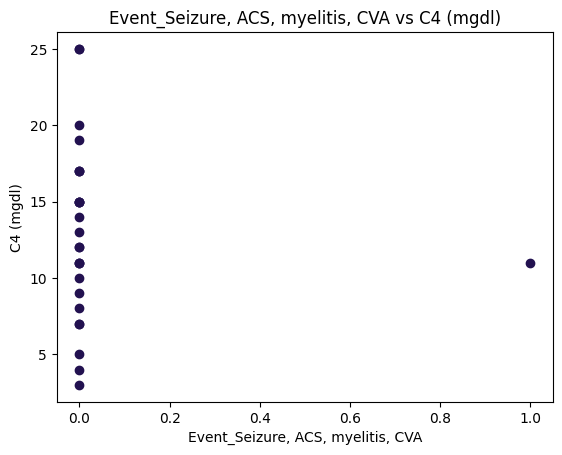

<Figure size 640x480 with 0 Axes>

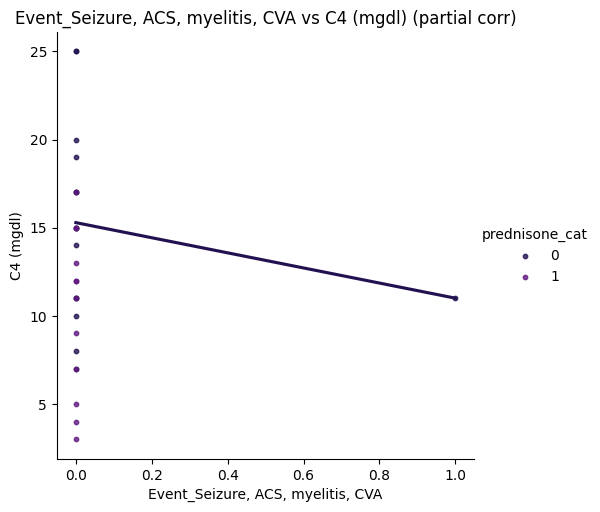

In [84]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'MTG volume asymmetry'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
C4 = 'C4 (mgdl)'

## Compute the correlations
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and C4
    r, p = spearmanr(df[col], df[C4])
    print(f'{col} vs {C4}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=C4, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {C4} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {C4} are perfectly correlated'
    
# Compute the Pearson correlation between MTG thickness and C4
r_mtg, p_mtg = spearmanr(df[lesion_load], df[C4])
print(f'{lesion_load} vs {C4}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=C4, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {C4} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')


# Plot the scatter plot
plt.figure()
plt.scatter(df[col], df[C4])
plt.xlabel(col)
plt.ylabel(C4)
plt.title(f'{col} vs {C4}')
plt.show()

# Plot the partial scatter plot
plt.figure()
sns.lmplot(data=df, x=col, y=C4, hue=prednisone, ci=None, scatter_kws={"s": 10})
plt.title(f'{col} vs {C4} (partial corr)')
plt.show()


In [85]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'MTG volume asymmetry'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
C4 = 'C4 (mgdl)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs MTG volume asymmetry: r = -0.05, p = 0.80
Event_CVA vs MTG volume asymmetry (partial corr): r = -0.08, p = 0.73
Event_Mood abnormalities (depressive) vs MTG volume asymmetry: r = 0.13, p = 0.50
Event_Mood abnormalities (depressive) vs MTG volume asymmetry (partial corr): r = 0.08, p = 0.73
Event_Mood abnormalities (mixed) vs MTG volume asymmetry: r = -0.25, p = 0.21
Event_Mood abnormalities (mixed) vs MTG volume asymmetry (partial corr): r = -0.08, p = 0.71
Event_Movement Disorder vs MTG volume asymmetry: r = 0.23, p = 0.26
Event_Movement Disorder vs MTG volume asymmetry (partial corr): r = 0.38, p = 0.07
Event_Psychosis vs MTG volume asymmetry: r = 0.02, p = 0.93
Event_Psychosis vs MTG volume asymmetry (partial corr): r = -0.05, p = 0.83
Event_Seizure vs MTG volume asymmetry: r = -0.02, p = 0.94
Event_Seizure vs MTG volume asymmetry (partial corr): r = -0.23, p = 0.28
Event_Seizure, ACS, myelitis, CVA vs MTG volume asymmetry: r = 0.15, p = 0.45
Event_Seizure, ACS, myeliti

In [86]:
#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'PIns total volume cm3'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
C4 = 'C4 (mgdl)'

    
# Compute the Pearson correlation between MTG thickness and C4
r_mtg, p_mtg = spearmanr(df[lesion_load], df[C4])
print(f'{lesion_load} vs {C4}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=C4, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {C4} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')

PIns total volume cm3 vs C4 (mgdl): r = 0.54, p = 0.00
PIns total volume cm3 vs C4 (mgdl) (partial corr): r = 0.29, p = 0.18


In [87]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'PIns total volume cm3'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
C4 = 'C4 (mgdl)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs PIns total volume cm3: r = 0.10, p = 0.62
Event_CVA vs PIns total volume cm3 (partial corr): r = -0.02, p = 0.94
Event_Mood abnormalities (depressive) vs PIns total volume cm3: r = 0.20, p = 0.33
Event_Mood abnormalities (depressive) vs PIns total volume cm3 (partial corr): r = 0.27, p = 0.22
Event_Mood abnormalities (mixed) vs PIns total volume cm3: r = -0.20, p = 0.31
Event_Mood abnormalities (mixed) vs PIns total volume cm3 (partial corr): r = -0.04, p = 0.87
Event_Movement Disorder vs PIns total volume cm3: r = -0.10, p = 0.62
Event_Movement Disorder vs PIns total volume cm3 (partial corr): r = 0.11, p = 0.62
Event_Psychosis vs PIns total volume cm3: r = -0.25, p = 0.20
Event_Psychosis vs PIns total volume cm3 (partial corr): r = -0.39, p = 0.07
Event_Seizure vs PIns total volume cm3: r = 0.15, p = 0.45
Event_Seizure vs PIns total volume cm3 (partial corr): r = 0.03, p = 0.88
Event_Seizure, ACS, myelitis, CVA vs PIns total volume cm3: r = -0.15, p = 0.45
Event_Seizure,

In [88]:
#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'FRP right volume cm3'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
C4 = 'C4 (mgdl)'

# Compute the Pearson correlation between MTG thickness and C4
r_mtg, p_mtg = spearmanr(df[lesion_load], df[C4])
print(f'{lesion_load} vs {C4}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=C4, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {C4} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')

FRP right volume cm3 vs C4 (mgdl): r = 0.55, p = 0.00
FRP right volume cm3 vs C4 (mgdl) (partial corr): r = 0.22, p = 0.32


In [89]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'FRP right volume cm3'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
C4 = 'C4 (mgdl)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs FRP right volume cm3: r = 0.15, p = 0.45
Event_CVA vs FRP right volume cm3 (partial corr): r = 0.10, p = 0.64
Event_Mood abnormalities (depressive) vs FRP right volume cm3: r = -0.18, p = 0.36
Event_Mood abnormalities (depressive) vs FRP right volume cm3 (partial corr): r = -0.22, p = 0.32
Event_Mood abnormalities (mixed) vs FRP right volume cm3: r = -0.25, p = 0.21
Event_Mood abnormalities (mixed) vs FRP right volume cm3 (partial corr): r = -0.17, p = 0.44
Event_Movement Disorder vs FRP right volume cm3: r = 0.00, p = 1.00
Event_Movement Disorder vs FRP right volume cm3 (partial corr): r = 0.10, p = 0.63
Event_Psychosis vs FRP right volume cm3: r = 0.00, p = 1.00
Event_Psychosis vs FRP right volume cm3 (partial corr): r = -0.01, p = 0.97
Event_Seizure vs FRP right volume cm3: r = 0.42, p = 0.03
Event_Seizure vs FRP right volume cm3 (partial corr): r = 0.35, p = 0.10
Event_Seizure, ACS, myelitis, CVA vs FRP right volume cm3: r = -0.03, p = 0.90
Event_Seizure, ACS, myelitis

In [90]:
#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'PIns left volume cm3'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
C4 = 'C4 (mgdl)'
    
# Compute the Pearson correlation between MTG thickness and C4
r_mtg, p_mtg = spearmanr(df[lesion_load], df[C4])
print(f'{lesion_load} vs {C4}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=C4, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {C4} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')

PIns left volume cm3 vs C4 (mgdl): r = 0.60, p = 0.00
PIns left volume cm3 vs C4 (mgdl) (partial corr): r = 0.42, p = 0.05


In [91]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'PIns left volume cm3'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
C4 = 'C4 (mgdl)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs PIns left volume cm3: r = -0.08, p = 0.71
Event_CVA vs PIns left volume cm3 (partial corr): r = -0.10, p = 0.66
Event_Mood abnormalities (depressive) vs PIns left volume cm3: r = 0.07, p = 0.72
Event_Mood abnormalities (depressive) vs PIns left volume cm3 (partial corr): r = 0.15, p = 0.50
Event_Mood abnormalities (mixed) vs PIns left volume cm3: r = -0.05, p = 0.80
Event_Mood abnormalities (mixed) vs PIns left volume cm3 (partial corr): r = 0.08, p = 0.72
Event_Movement Disorder vs PIns left volume cm3: r = 0.15, p = 0.45
Event_Movement Disorder vs PIns left volume cm3 (partial corr): r = 0.27, p = 0.21
Event_Psychosis vs PIns left volume cm3: r = -0.16, p = 0.42
Event_Psychosis vs PIns left volume cm3 (partial corr): r = -0.19, p = 0.37
Event_Seizure vs PIns left volume cm3: r = 0.21, p = 0.29
Event_Seizure vs PIns left volume cm3 (partial corr): r = -0.01, p = 0.98
Event_Seizure, ACS, myelitis, CVA vs PIns left volume cm3: r = -0.25, p = 0.21
Event_Seizure, ACS, myeliti

In [92]:
#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'ITG thickness asymmetry'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
C4 = 'C4 (mgdl)'
    
# Compute the Pearson correlation between MTG thickness and C4
r_mtg, p_mtg = spearmanr(df[lesion_load], df[C4])
print(f'{lesion_load} vs {C4}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=C4, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {C4} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')

ITG thickness asymmetry vs C4 (mgdl): r = 0.67, p = 0.00
ITG thickness asymmetry vs C4 (mgdl) (partial corr): r = 0.53, p = 0.01


In [93]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'ITG thickness asymmetry'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
C4 = 'C4 (mgdl)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs ITG thickness asymmetry: r = 0.30, p = 0.13
Event_CVA vs ITG thickness asymmetry (partial corr): r = 0.24, p = 0.27
Event_Mood abnormalities (depressive) vs ITG thickness asymmetry: r = 0.10, p = 0.63
Event_Mood abnormalities (depressive) vs ITG thickness asymmetry (partial corr): r = -0.03, p = 0.89
Event_Mood abnormalities (mixed) vs ITG thickness asymmetry: r = -0.18, p = 0.38
Event_Mood abnormalities (mixed) vs ITG thickness asymmetry (partial corr): r = -0.02, p = 0.94
Event_Movement Disorder vs ITG thickness asymmetry: r = 0.23, p = 0.26
Event_Movement Disorder vs ITG thickness asymmetry (partial corr): r = 0.27, p = 0.21
Event_Psychosis vs ITG thickness asymmetry: r = -0.34, p = 0.08
Event_Psychosis vs ITG thickness asymmetry (partial corr): r = -0.32, p = 0.14
Event_Seizure vs ITG thickness asymmetry: r = 0.09, p = 0.65
Event_Seizure vs ITG thickness asymmetry (partial corr): r = 0.03, p = 0.89
Event_Seizure, ACS, myelitis, CVA vs ITG thickness asymmetry: r = 0.03,

## AnAb

Event_CVA vs AnAb : r = 0.14, p = 0.49
Event_CVA vs AnAb  (partial corr): r = 0.13, p = 0.56
Event_Mood abnormalities (depressive) vs AnAb : r = 0.13, p = 0.50
Event_Mood abnormalities (depressive) vs AnAb  (partial corr): r = -0.11, p = 0.62
Event_Mood abnormalities (mixed) vs AnAb : r = 0.14, p = 0.49
Event_Mood abnormalities (mixed) vs AnAb  (partial corr): r = -0.09, p = 0.68
Event_Movement Disorder vs AnAb : r = 0.14, p = 0.49
Event_Movement Disorder vs AnAb  (partial corr): r = -0.13, p = 0.57
Event_Psychosis vs AnAb : r = 0.20, p = 0.32
Event_Psychosis vs AnAb  (partial corr): r = 0.19, p = 0.38
Event_Seizure vs AnAb : r = 0.00, p = 1.00
Event_Seizure vs AnAb  (partial corr): r = 0.00, p = 1.00
Event_Seizure, ACS, myelitis, CVA vs AnAb : r = 0.14, p = 0.49
Event_Seizure, ACS, myelitis, CVA vs AnAb  (partial corr): r = 0.04, p = 0.87
SCA left thickness mm vs AnAb : r = -0.55, p = 0.00
SCA left thickness mm vs AnAb  (partial corr): r = -0.49, p = 0.02


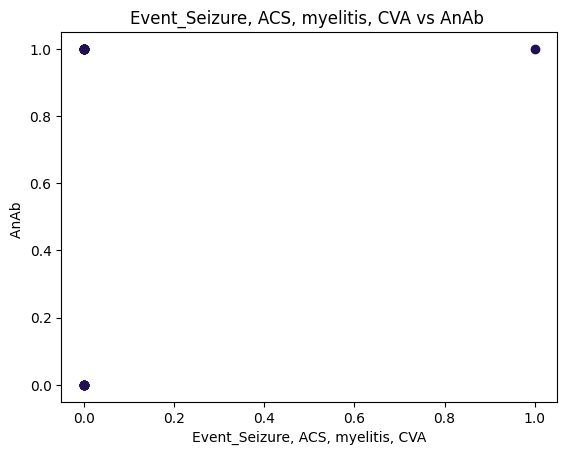

<Figure size 640x480 with 0 Axes>

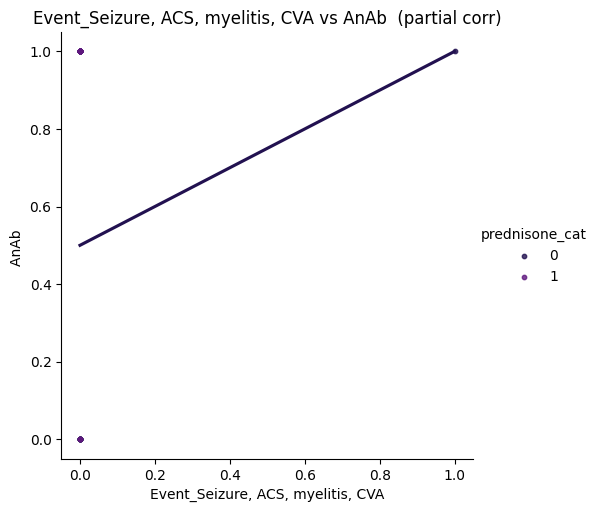

In [94]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'SCA left thickness mm'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
AnAb = 'AnAb '

## Compute the correlations
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and C4
    r, p = spearmanr(df[col], df[AnAb])
    print(f'{col} vs {AnAb}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=AnAb, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {AnAb} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {AnAb} are perfectly correlated'
    
# Compute the Pearson correlation between MTG thickness and C4
r_mtg, p_mtg = spearmanr(df[lesion_load], df[AnAb])
print(f'{lesion_load} vs {AnAb}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=AnAb, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {AnAb} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')


# Plot the scatter plot
plt.figure()
plt.scatter(df[col], df[AnAb])
plt.xlabel(col)
plt.ylabel(AnAb)
plt.title(f'{col} vs {AnAb}')
plt.show()

# Plot the partial scatter plot
plt.figure()
sns.lmplot(data=df, x=col, y=AnAb, hue=prednisone, ci=None, scatter_kws={"s": 10})
plt.title(f'{col} vs {AnAb} (partial corr)')
plt.show()


In [95]:
#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'AnG right thickness mm'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
AnAb = 'AnAb '
    
# Compute the Pearson correlation between MTG thickness and C4
r_mtg, p_mtg = spearmanr(df[lesion_load], df[AnAb])
print(f'{lesion_load} vs {AnAb}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=AnAb, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {AnAb} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')

AnG right thickness mm vs AnAb : r = -0.63, p = 0.00
AnG right thickness mm vs AnAb  (partial corr): r = -0.50, p = 0.02


In [96]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'AnG right thickness mm'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
AnAb = 'AnAb '

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs AnG right thickness mm: r = -0.28, p = 0.16
Event_CVA vs AnG right thickness mm (partial corr): r = -0.17, p = 0.45
Event_Mood abnormalities (depressive) vs AnG right thickness mm: r = -0.22, p = 0.27
Event_Mood abnormalities (depressive) vs AnG right thickness mm (partial corr): r = 0.06, p = 0.80
Event_Mood abnormalities (mixed) vs AnG right thickness mm: r = 0.00, p = 1.00
Event_Mood abnormalities (mixed) vs AnG right thickness mm (partial corr): r = 0.14, p = 0.53
Event_Movement Disorder vs AnG right thickness mm: r = 0.08, p = 0.71
Event_Movement Disorder vs AnG right thickness mm (partial corr): r = 0.20, p = 0.37
Event_Psychosis vs AnG right thickness mm: r = -0.13, p = 0.53
Event_Psychosis vs AnG right thickness mm (partial corr): r = 0.07, p = 0.76
Event_Seizure vs AnG right thickness mm: r = -0.18, p = 0.36
Event_Seizure vs AnG right thickness mm (partial corr): r = 0.10, p = 0.64
Event_Seizure, ACS, myelitis, CVA vs AnG right thickness mm: r = -0.33, p = 0.10
Ev

In [97]:
#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'MFG total thickness mm'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
AnAb = 'AnAb '
    
# Compute the Pearson correlation between MTG thickness and C4
r_mtg, p_mtg = spearmanr(df[lesion_load], df[AnAb])
print(f'{lesion_load} vs {AnAb}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=AnAb, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {AnAb} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')

MFG total thickness mm vs AnAb : r = -0.53, p = 0.00
MFG total thickness mm vs AnAb  (partial corr): r = -0.60, p = 0.00


In [98]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'MFG total thickness mm'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
AnAb = 'AnAb '

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs MFG total thickness mm: r = -0.23, p = 0.26
Event_CVA vs MFG total thickness mm (partial corr): r = -0.23, p = 0.30
Event_Mood abnormalities (depressive) vs MFG total thickness mm: r = -0.01, p = 0.95
Event_Mood abnormalities (depressive) vs MFG total thickness mm (partial corr): r = 0.11, p = 0.61
Event_Mood abnormalities (mixed) vs MFG total thickness mm: r = 0.28, p = 0.16
Event_Mood abnormalities (mixed) vs MFG total thickness mm (partial corr): r = 0.25, p = 0.24
Event_Movement Disorder vs MFG total thickness mm: r = 0.30, p = 0.13
Event_Movement Disorder vs MFG total thickness mm (partial corr): r = 0.29, p = 0.18
Event_Psychosis vs MFG total thickness mm: r = -0.27, p = 0.17
Event_Psychosis vs MFG total thickness mm (partial corr): r = -0.18, p = 0.41
Event_Seizure vs MFG total thickness mm: r = -0.17, p = 0.41
Event_Seizure vs MFG total thickness mm (partial corr): r = 0.04, p = 0.87
Event_Seizure, ACS, myelitis, CVA vs MFG total thickness mm: r = -0.33, p = 0.10
E

In [99]:
#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'SCA total thickness mm'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
AnAb = 'AnAb '
    
# Compute the Pearson correlation between MTG thickness and C4
r_mtg, p_mtg = spearmanr(df[lesion_load], df[AnAb])
print(f'{lesion_load} vs {AnAb}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=AnAb, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {AnAb} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')

SCA total thickness mm vs AnAb : r = -0.51, p = 0.01
SCA total thickness mm vs AnAb  (partial corr): r = -0.51, p = 0.01


In [100]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'SCA total thickness mm'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
AnAb = 'AnAb '

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs SCA total thickness mm: r = -0.28, p = 0.16
Event_CVA vs SCA total thickness mm (partial corr): r = -0.41, p = 0.05
Event_Mood abnormalities (depressive) vs SCA total thickness mm: r = -0.15, p = 0.46
Event_Mood abnormalities (depressive) vs SCA total thickness mm (partial corr): r = 0.27, p = 0.21
Event_Mood abnormalities (mixed) vs SCA total thickness mm: r = 0.13, p = 0.53
Event_Mood abnormalities (mixed) vs SCA total thickness mm (partial corr): r = 0.09, p = 0.69
Event_Movement Disorder vs SCA total thickness mm: r = 0.10, p = 0.62
Event_Movement Disorder vs SCA total thickness mm (partial corr): r = 0.08, p = 0.72
Event_Psychosis vs SCA total thickness mm: r = -0.27, p = 0.17
Event_Psychosis vs SCA total thickness mm (partial corr): r = 0.03, p = 0.91
Event_Seizure vs SCA total thickness mm: r = 0.05, p = 0.82
Event_Seizure vs SCA total thickness mm (partial corr): r = 0.05, p = 0.84
Event_Seizure, ACS, myelitis, CVA vs SCA total thickness mm: r = -0.30, p = 0.13
Eve

In [101]:
from scipy.stats import spearmanr
import pingouin as pg

df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Temporal total thickness mm'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
AnAb = 'AnAb '
    
# Compute the Pearson correlation between MTG thickness and C4
r_mtg, p_mtg = spearmanr(df[lesion_load], df[AnAb])
print(f'{lesion_load} vs {AnAb}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=AnAb, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {AnAb} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')

Temporal total thickness mm vs AnAb : r = -0.45, p = 0.02
Temporal total thickness mm vs AnAb  (partial corr): r = -0.49, p = 0.02


In [102]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Temporal total thickness mm'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
AnAb = 'AnAb '

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs Temporal total thickness mm: r = -0.25, p = 0.21
Event_CVA vs Temporal total thickness mm (partial corr): r = -0.40, p = 0.06
Event_Mood abnormalities (depressive) vs Temporal total thickness mm: r = 0.18, p = 0.36
Event_Mood abnormalities (depressive) vs Temporal total thickness mm (partial corr): r = 0.33, p = 0.12
Event_Mood abnormalities (mixed) vs Temporal total thickness mm: r = 0.25, p = 0.21
Event_Mood abnormalities (mixed) vs Temporal total thickness mm (partial corr): r = 0.11, p = 0.63
Event_Movement Disorder vs Temporal total thickness mm: r = 0.30, p = 0.13
Event_Movement Disorder vs Temporal total thickness mm (partial corr): r = 0.17, p = 0.45
Event_Psychosis vs Temporal total thickness mm: r = -0.22, p = 0.27
Event_Psychosis vs Temporal total thickness mm (partial corr): r = 0.04, p = 0.87
Event_Seizure vs Temporal total thickness mm: r = -0.09, p = 0.65
Event_Seizure vs Temporal total thickness mm (partial corr): r = -0.06, p = 0.77
Event_Seizure, ACS, mye

## Anti-Sm

Event_CVA vs anti-Sm: r = -0.13, p = 0.53
Event_CVA vs anti-Sm (partial corr): r = -0.16, p = 0.48
Event_Mood abnormalities (depressive) vs anti-Sm: r = -0.10, p = 0.62
Event_Mood abnormalities (depressive) vs anti-Sm (partial corr): r = -0.11, p = 0.60
Event_Mood abnormalities (mixed) vs anti-Sm: r = 0.30, p = 0.13
Event_Mood abnormalities (mixed) vs anti-Sm (partial corr): r = 0.34, p = 0.11
Event_Movement Disorder vs anti-Sm: r = -0.13, p = 0.53
Event_Movement Disorder vs anti-Sm (partial corr): r = -0.13, p = 0.57
Event_Psychosis vs anti-Sm: r = 0.13, p = 0.53
Event_Psychosis vs anti-Sm (partial corr): r = 0.11, p = 0.62
Event_Seizure vs anti-Sm: r = 0.03, p = 0.89
Event_Seizure vs anti-Sm (partial corr): r = 0.07, p = 0.77
Event_Seizure, ACS, myelitis, CVA vs anti-Sm: r = -0.13, p = 0.53
Event_Seizure, ACS, myelitis, CVA vs anti-Sm (partial corr): r = -0.08, p = 0.70
LiG volume asymmetry vs anti-Sm: r = -0.59, p = 0.00
LiG volume asymmetry vs anti-Sm (partial corr): r = -0.62, p =

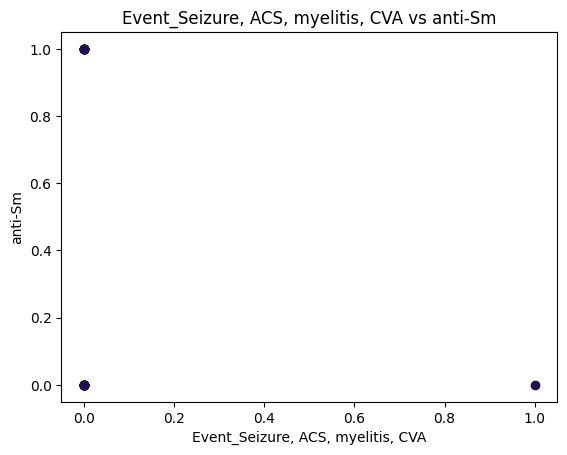

<Figure size 640x480 with 0 Axes>

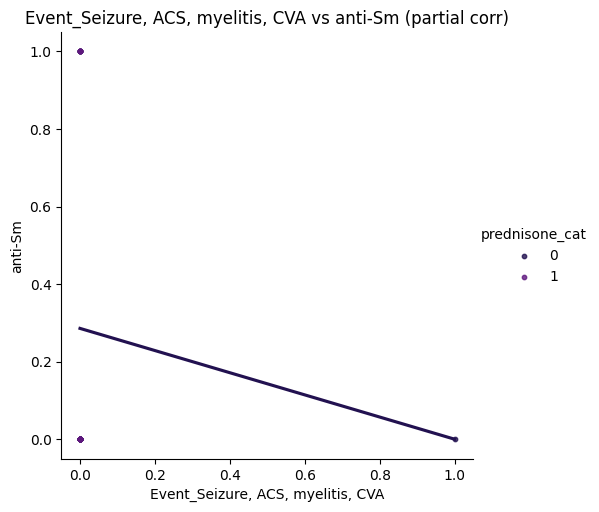

In [103]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'LiG volume asymmetry'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
sm = 'anti-Sm'

## Compute the correlations
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and C4
    r, p = spearmanr(df[col], df[sm])
    print(f'{col} vs {sm}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=sm, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {sm} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {AnAb} are perfectly correlated'
    
# Compute the Pearson correlation between MTG thickness and C4
r_mtg, p_mtg = spearmanr(df[lesion_load], df[sm])
print(f'{lesion_load} vs {sm}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=sm, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {sm} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')


# Plot the scatter plot
plt.figure()
plt.scatter(df[col], df[sm])
plt.xlabel(col)
plt.ylabel(sm)
plt.title(f'{col} vs {sm}')
plt.show()

# Plot the partial scatter plot
plt.figure()
sns.lmplot(data=df, x=col, y=sm, hue=prednisone, ci=None, scatter_kws={"s": 10})
plt.title(f'{col} vs {sm} (partial corr)')
plt.show()


In [107]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'LiG volume asymmetry'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
sm = 'anti-Sm'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs LiG volume asymmetry: r = 0.30, p = 0.13
Event_CVA vs LiG volume asymmetry (partial corr): r = 0.32, p = 0.14
Event_Mood abnormalities (depressive) vs LiG volume asymmetry: r = 0.15, p = 0.46
Event_Mood abnormalities (depressive) vs LiG volume asymmetry (partial corr): r = 0.18, p = 0.41
Event_Mood abnormalities (mixed) vs LiG volume asymmetry: r = -0.23, p = 0.26
Event_Mood abnormalities (mixed) vs LiG volume asymmetry (partial corr): r = -0.27, p = 0.21
Event_Movement Disorder vs LiG volume asymmetry: r = 0.15, p = 0.45
Event_Movement Disorder vs LiG volume asymmetry (partial corr): r = 0.13, p = 0.57
Event_Psychosis vs LiG volume asymmetry: r = -0.07, p = 0.72
Event_Psychosis vs LiG volume asymmetry (partial corr): r = -0.17, p = 0.44
Event_Seizure vs LiG volume asymmetry: r = -0.15, p = 0.45
Event_Seizure vs LiG volume asymmetry (partial corr): r = -0.20, p = 0.37
Event_Seizure, ACS, myelitis, CVA vs LiG volume asymmetry: r = -0.08, p = 0.71
Event_Seizure, ACS, myeliti

In [109]:
from scipy.stats import spearmanr
import pingouin as pg

df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'LiG left volume %'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
sm = 'anti-Sm'
    
# Compute the Pearson correlation between MTG thickness and C4
r_mtg, p_mtg = spearmanr(df[lesion_load], df[sm])
print(f'{lesion_load} vs {sm}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=sm, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {sm} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')

LiG left volume % vs anti-Sm: r = 0.53, p = 0.00
LiG left volume % vs anti-Sm (partial corr): r = 0.58, p = 0.00


In [110]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'LiG left volume %'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
sm = 'anti-Sm'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs LiG left volume %: r = -0.28, p = 0.16
Event_CVA vs LiG left volume % (partial corr): r = -0.25, p = 0.25
Event_Mood abnormalities (depressive) vs LiG left volume %: r = -0.11, p = 0.58
Event_Mood abnormalities (depressive) vs LiG left volume % (partial corr): r = -0.02, p = 0.92
Event_Mood abnormalities (mixed) vs LiG left volume %: r = 0.18, p = 0.38
Event_Mood abnormalities (mixed) vs LiG left volume % (partial corr): r = 0.16, p = 0.47
Event_Movement Disorder vs LiG left volume %: r = -0.25, p = 0.21
Event_Movement Disorder vs LiG left volume % (partial corr): r = -0.31, p = 0.15
Event_Psychosis vs LiG left volume %: r = 0.16, p = 0.42
Event_Psychosis vs LiG left volume % (partial corr): r = 0.29, p = 0.18
Event_Seizure vs LiG left volume %: r = -0.24, p = 0.22
Event_Seizure vs LiG left volume % (partial corr): r = 0.05, p = 0.82
Event_Seizure, ACS, myelitis, CVA vs LiG left volume %: r = -0.20, p = 0.31
Event_Seizure, ACS, myelitis, CVA vs LiG left volume % (partial c

In [7]:
from scipy.stats import spearmanr
import pingouin as pg

df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'PCgG right thickness norm.'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
sm = 'anti-Sm'
    
# Compute the Pearson correlation between MTG thickness and C4
r_mtg, p_mtg = spearmanr(df[lesion_load], df[sm])
print(f'{lesion_load} vs {sm}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=sm, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {sm} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')

PCgG right thickness norm. vs anti-Sm: r = 0.52, p = 0.01
PCgG right thickness norm. vs anti-Sm (partial corr): r = 0.47, p = 0.02


In [8]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'PCgG right thickness norm.'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
sm = 'anti-Sm'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs PCgG right thickness norm.: r = -0.25, p = 0.21
Event_CVA vs PCgG right thickness norm. (partial corr): r = -0.22, p = 0.32
Event_Mood abnormalities (depressive) vs PCgG right thickness norm.: r = 0.11, p = 0.58
Event_Mood abnormalities (depressive) vs PCgG right thickness norm. (partial corr): r = 0.18, p = 0.41
Event_Mood abnormalities (mixed) vs PCgG right thickness norm.: r = 0.33, p = 0.10
Event_Mood abnormalities (mixed) vs PCgG right thickness norm. (partial corr): r = 0.27, p = 0.21
Event_Movement Disorder vs PCgG right thickness norm.: r = 0.30, p = 0.13
Event_Movement Disorder vs PCgG right thickness norm. (partial corr): r = 0.19, p = 0.38
Event_Psychosis vs PCgG right thickness norm.: r = -0.09, p = 0.65
Event_Psychosis vs PCgG right thickness norm. (partial corr): r = -0.05, p = 0.80
Event_Seizure vs PCgG right thickness norm.: r = -0.21, p = 0.29
Event_Seizure vs PCgG right thickness norm. (partial corr): r = -0.02, p = 0.94
Event_Seizure, ACS, myelitis, CVA 

## Anti-Rib-P

Event_CVA vs Anti-Rib-P: r = -0.12, p = 0.56
Event_CVA vs Anti-Rib-P (partial corr): r = -0.17, p = 0.44
Event_Mood abnormalities (depressive) vs Anti-Rib-P: r = 0.37, p = 0.06
Event_Mood abnormalities (depressive) vs Anti-Rib-P (partial corr): r = 0.27, p = 0.21
Event_Mood abnormalities (mixed) vs Anti-Rib-P: r = 0.33, p = 0.09
Event_Mood abnormalities (mixed) vs Anti-Rib-P (partial corr): r = 0.32, p = 0.13
Event_Movement Disorder vs Anti-Rib-P: r = -0.12, p = 0.56
Event_Movement Disorder vs Anti-Rib-P (partial corr): r = -0.27, p = 0.21
Event_Psychosis vs Anti-Rib-P: r = -0.17, p = 0.40
Event_Psychosis vs Anti-Rib-P (partial corr): r = -0.26, p = 0.24
Event_Seizure vs Anti-Rib-P: r = 0.06, p = 0.77
Event_Seizure vs Anti-Rib-P (partial corr): r = -0.16, p = 0.48
Event_Seizure, ACS, myelitis, CVA vs Anti-Rib-P: r = 0.33, p = 0.09
Event_Seizure, ACS, myelitis, CVA vs Anti-Rib-P (partial corr): r = 0.17, p = 0.45
OpIFG left volume cm3 vs Anti-Rib-P: r = -0.53, p = 0.00
OpIFG left volume

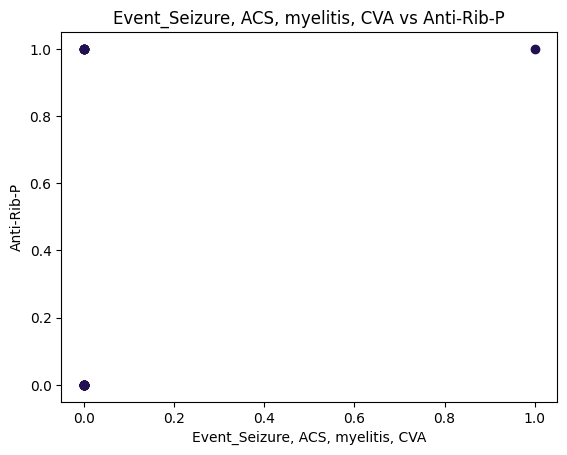

<Figure size 640x480 with 0 Axes>

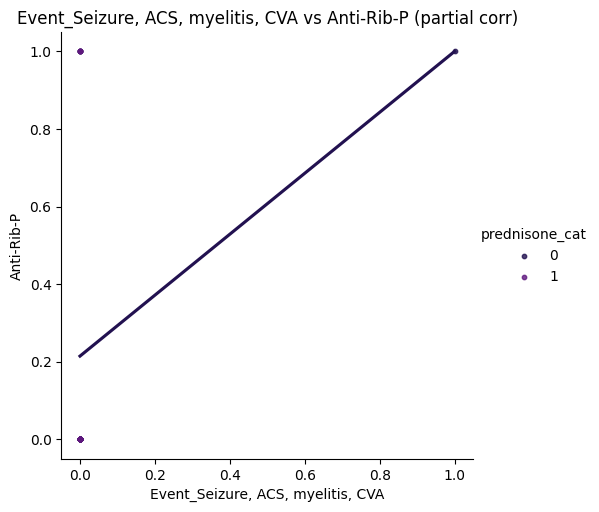

In [11]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'OpIFG left volume cm3'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
rib = 'Anti-Rib-P'

## Compute the correlations
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and C4
    r, p = spearmanr(df[col], df[rib])
    print(f'{col} vs {rib}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=rib, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {rib} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {AnAb} are perfectly correlated'
    
# Compute the Pearson correlation between MTG thickness and C4
r_mtg, p_mtg = spearmanr(df[lesion_load], df[rib])
print(f'{lesion_load} vs {rib}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=rib, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {rib} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')


# Plot the scatter plot
plt.figure()
plt.scatter(df[col], df[rib])
plt.xlabel(col)
plt.ylabel(rib)
plt.title(f'{col} vs {rib}')
plt.show()

# Plot the partial scatter plot
plt.figure()
sns.lmplot(data=df, x=col, y=rib, hue=prednisone, ci=None, scatter_kws={"s": 10})
plt.title(f'{col} vs {rib} (partial corr)')
plt.show()


In [12]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'OpIFG left volume cm3'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
rib = 'Anti-Rib-P'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs OpIFG left volume cm3: r = -0.33, p = 0.10
Event_CVA vs OpIFG left volume cm3 (partial corr): r = -0.48, p = 0.02
Event_Mood abnormalities (depressive) vs OpIFG left volume cm3: r = -0.18, p = 0.36
Event_Mood abnormalities (depressive) vs OpIFG left volume cm3 (partial corr): r = 0.15, p = 0.51
Event_Mood abnormalities (mixed) vs OpIFG left volume cm3: r = -0.18, p = 0.38
Event_Mood abnormalities (mixed) vs OpIFG left volume cm3 (partial corr): r = -0.07, p = 0.76
Event_Movement Disorder vs OpIFG left volume cm3: r = -0.15, p = 0.45
Event_Movement Disorder vs OpIFG left volume cm3 (partial corr): r = -0.07, p = 0.77
Event_Psychosis vs OpIFG left volume cm3: r = -0.22, p = 0.27
Event_Psychosis vs OpIFG left volume cm3 (partial corr): r = -0.11, p = 0.61
Event_Seizure vs OpIFG left volume cm3: r = 0.12, p = 0.55
Event_Seizure vs OpIFG left volume cm3 (partial corr): r = 0.28, p = 0.20
Event_Seizure, ACS, myelitis, CVA vs OpIFG left volume cm3: r = -0.10, p = 0.62
Event_Seizu

In [13]:
from scipy.stats import spearmanr
import pingouin as pg

df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'MPrG right volume %'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
rib = 'Anti-Rib-P'
    
# Compute the Pearson correlation between MTG thickness and C4
r_mtg, p_mtg = spearmanr(df[lesion_load], df[rib])
print(f'{lesion_load} vs {rib}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=rib, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {rib} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')

MPrG right volume % vs Anti-Rib-P: r = 0.51, p = 0.01
MPrG right volume % vs Anti-Rib-P (partial corr): r = 0.36, p = 0.09


In [14]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'MPrG right volume %'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
rib = 'Anti-Rib-P'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs MPrG right volume %: r = 0.13, p = 0.53
Event_CVA vs MPrG right volume % (partial corr): r = 0.10, p = 0.64
Event_Mood abnormalities (depressive) vs MPrG right volume %: r = 0.43, p = 0.03
Event_Mood abnormalities (depressive) vs MPrG right volume % (partial corr): r = 0.37, p = 0.08
Event_Mood abnormalities (mixed) vs MPrG right volume %: r = 0.03, p = 0.90
Event_Mood abnormalities (mixed) vs MPrG right volume % (partial corr): r = 0.04, p = 0.84
Event_Movement Disorder vs MPrG right volume %: r = -0.10, p = 0.62
Event_Movement Disorder vs MPrG right volume % (partial corr): r = -0.07, p = 0.76
Event_Psychosis vs MPrG right volume %: r = -0.42, p = 0.03
Event_Psychosis vs MPrG right volume % (partial corr): r = -0.63, p = 0.00
Event_Seizure vs MPrG right volume %: r = 0.11, p = 0.60
Event_Seizure vs MPrG right volume % (partial corr): r = -0.07, p = 0.74
Event_Seizure, ACS, myelitis, CVA vs MPrG right volume %: r = 0.30, p = 0.13
Event_Seizure, ACS, myelitis, CVA vs MPrG 

In [15]:
from scipy.stats import spearmanr
import pingouin as pg

df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'GRe thickness asymmetry'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
rib = 'Anti-Rib-P'
    
# Compute the Pearson correlation between MTG thickness and C4
r_mtg, p_mtg = spearmanr(df[lesion_load], df[rib])
print(f'{lesion_load} vs {rib}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=rib, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {rib} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')

GRe thickness asymmetry vs Anti-Rib-P: r = 0.52, p = 0.01
GRe thickness asymmetry vs Anti-Rib-P (partial corr): r = 0.31, p = 0.16


In [16]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'GRe thickness asymmetry'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
rib = 'Anti-Rib-P'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs GRe thickness asymmetry: r = -0.20, p = 0.31
Event_CVA vs GRe thickness asymmetry (partial corr): r = -0.13, p = 0.57
Event_Mood abnormalities (depressive) vs GRe thickness asymmetry: r = -0.01, p = 0.95
Event_Mood abnormalities (depressive) vs GRe thickness asymmetry (partial corr): r = -0.14, p = 0.53
Event_Mood abnormalities (mixed) vs GRe thickness asymmetry: r = 0.08, p = 0.71
Event_Mood abnormalities (mixed) vs GRe thickness asymmetry (partial corr): r = -0.02, p = 0.92
Event_Movement Disorder vs GRe thickness asymmetry: r = -0.05, p = 0.80
Event_Movement Disorder vs GRe thickness asymmetry (partial corr): r = -0.08, p = 0.72
Event_Psychosis vs GRe thickness asymmetry: r = -0.11, p = 0.59
Event_Psychosis vs GRe thickness asymmetry (partial corr): r = -0.01, p = 0.95
Event_Seizure vs GRe thickness asymmetry: r = 0.20, p = 0.33
Event_Seizure vs GRe thickness asymmetry (partial corr): r = 0.22, p = 0.31
Event_Seizure, ACS, myelitis, CVA vs GRe thickness asymmetry: r = 0

In [17]:
from scipy.stats import spearmanr
import pingouin as pg

df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'AnG right thickness mm'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
rib = 'Anti-Rib-P'
    
# Compute the Pearson correlation between MTG thickness and C4
r_mtg, p_mtg = spearmanr(df[lesion_load], df[rib])
print(f'{lesion_load} vs {rib}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=rib, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {rib} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')

AnG right thickness mm vs Anti-Rib-P: r = -0.53, p = 0.00
AnG right thickness mm vs Anti-Rib-P (partial corr): r = -0.39, p = 0.06


In [18]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'AnG right thickness mm'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
rib = 'Anti-Rib-P'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs AnG right thickness mm: r = -0.28, p = 0.16
Event_CVA vs AnG right thickness mm (partial corr): r = -0.17, p = 0.45
Event_Mood abnormalities (depressive) vs AnG right thickness mm: r = -0.22, p = 0.27
Event_Mood abnormalities (depressive) vs AnG right thickness mm (partial corr): r = 0.06, p = 0.80
Event_Mood abnormalities (mixed) vs AnG right thickness mm: r = 0.00, p = 1.00
Event_Mood abnormalities (mixed) vs AnG right thickness mm (partial corr): r = 0.14, p = 0.53
Event_Movement Disorder vs AnG right thickness mm: r = 0.08, p = 0.71
Event_Movement Disorder vs AnG right thickness mm (partial corr): r = 0.20, p = 0.37
Event_Psychosis vs AnG right thickness mm: r = -0.13, p = 0.53
Event_Psychosis vs AnG right thickness mm (partial corr): r = 0.07, p = 0.76
Event_Seizure vs AnG right thickness mm: r = -0.18, p = 0.36
Event_Seizure vs AnG right thickness mm (partial corr): r = 0.10, p = 0.64
Event_Seizure, ACS, myelitis, CVA vs AnG right thickness mm: r = -0.33, p = 0.10
Ev

In [19]:
from scipy.stats import spearmanr
import pingouin as pg

df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'OCP left thickness norm.'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
rib = 'Anti-Rib-P'
    
# Compute the Pearson correlation between MTG thickness and C4
r_mtg, p_mtg = spearmanr(df[lesion_load], df[rib])
print(f'{lesion_load} vs {rib}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=rib, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {rib} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')

OCP left thickness norm. vs Anti-Rib-P: r = -0.51, p = 0.01
OCP left thickness norm. vs Anti-Rib-P (partial corr): r = -0.21, p = 0.34


In [20]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'OCP left thickness norm.'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
rib = 'Anti-Rib-P'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs OCP left thickness norm.: r = 0.05, p = 0.80
Event_CVA vs OCP left thickness norm. (partial corr): r = 0.18, p = 0.41
Event_Mood abnormalities (depressive) vs OCP left thickness norm.: r = -0.45, p = 0.02
Event_Mood abnormalities (depressive) vs OCP left thickness norm. (partial corr): r = -0.36, p = 0.09
Event_Mood abnormalities (mixed) vs OCP left thickness norm.: r = -0.23, p = 0.26
Event_Mood abnormalities (mixed) vs OCP left thickness norm. (partial corr): r = -0.25, p = 0.25
Event_Movement Disorder vs OCP left thickness norm.: r = 0.20, p = 0.31
Event_Movement Disorder vs OCP left thickness norm. (partial corr): r = 0.43, p = 0.04
Event_Psychosis vs OCP left thickness norm.: r = 0.02, p = 0.93
Event_Psychosis vs OCP left thickness norm. (partial corr): r = 0.27, p = 0.21
Event_Seizure vs OCP left thickness norm.: r = -0.18, p = 0.36
Event_Seizure vs OCP left thickness norm. (partial corr): r = 0.09, p = 0.68
Event_Seizure, ACS, myelitis, CVA vs OCP left thickness nor